# Boulder Property Sale Price Prediction
The imported datasets contain house descriptions and sales data in Boulder, Colorado from 2016 to 2019.

In [1]:
# Import dependencies
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

pd.set_option('display.max_columns', None)

In [2]:
# Insert file path location into the quotes if needed.
#filepath = "C:\\Users\\joesh\\OneDrive\\Documents\\Holly\\FundamentalsOfAnalytics\\Final\\"
filepath = "/Users/zacksisco/Documents/"

In [281]:
# Load sales data from 2016-2019.
boulder16 = pd.read_csv(filepath + "Boulder2016Data.csv")
boulder17 = pd.read_csv(filepath + "Boulder2017Data.csv")
boulder18 = pd.read_csv(filepath + "Boulder2018Data.csv")
boulder19 = pd.read_csv(filepath + "Boulder2019Data.csv")

In [282]:
# Append dataframes together.
bld_df = boulder16.append(boulder17)
bld_df = bld_df.append(boulder18)
bld_df = bld_df.append(boulder19)
bld_df

Neighborhood Code Account #      PARCELNB            PROPERTY_ADDRESS  \
0                   135  M8724018  146321300001           5000 BUTTE ST 187   
1                   135  M9000082  146322300014         5505 VALMONT RD 276   
2                   203  M8724746  120534203001             729 17TH AVE 31   
3                   460  M9200147  157502400007  11990 SOUTH BOULDER RD 221   
4                   115  R0002870  146319327003               3025 17TH ST    
...                 ...       ...           ...                         ...   
6550                440  R0606485   1.46524E+11            503 BRENNAN CIR    
6551                450  R0511667   1.46534E+11        1426 HARVEST DR 1426   
6552                480  R0081366    1.5751E+11             1430 AGAPE WAY    
6553                820  R0089364   1.31519E+11               8020 81ST ST    
6554                820  R0089364   1.31519E+11               8020 81ST ST    

             LOCCITY                                        SUBNAME  \
0            BOULDER                        VISTA VILLAGE - MHP BOV   
1     UNINCORPORATED                           SAN LAZARO - MHP BOV   
2           LONGMONT                          WESTON MANOR - MHP LG   
3          LAFAYETTE  BOULDER RIDGE MHP FKA COTTONWOOD VILLAGE - LA   
4            BOULDER                    SILVER MAPLE VILLAGE 2 - BO   
...              ...                                            ...   
6550            ERIE               CANYON CREEK FLG 9 1ST AMENDMENT   
6551       LAFAYETTE         ANNAS FARM DUPLEX HOMES 13 SUPP CONDOS   
6552       LAFAYETTE                     CENTAUR SIX TOWNHOMES - LA   
6553  UNINCORPORATED                                 FOOTHILLS EAST   
6554  UNINCORPORATED                                 FOOTHILLS EAST   

     MULTIPLE_BLDGS       ACCOUNT_TYPE                    BLDG1_DESCRIPTION  \
0                NO  MANUFACTURED HOME    MANUFACTURED HOUSING IMPROVEMENTS   
1                NO  MANUFACTURED HOME    MANUFACTURED HOUSING IMPROVEMENTS   
2                NO  MANUFACTURED HOME    MANUFACTURED HOUSING IMPROVEMENTS   
3               YES  MANUFACTURED HOME    MANUFACTURED HOUSING IMPROVEMENTS   
4                NO        RESIDENTIAL          SINGLE FAM RES IMPROVEMENTS   
...             ...                ...                                  ...   
6550             NO        RESIDENTIAL          SINGLE FAM RES IMPROVEMENTS   
6551             NO  RESIDENTIAL CONDO                  CONDOS-IMPROVEMENTS   
6552             NO        RESIDENTIAL          SINGLE FAM RES IMPROVEMENTS   
6553             NO       AGRICULTURAL  FARM/RANCH RESIDENTIAL IMPROVEMENTS   
6554             NO       AGRICULTURAL  FARM/RANCH RESIDENTIAL IMPROVEMENTS   

                       BLDG1_DESIGN  BLDG1_YEAR_BUILT  BEDROOMS  FULL_BATHS  \
0                       SINGLE WIDE              1965         0           0   
1                       SINGLE WIDE              1969         0           0   
2                       SINGLE WIDE              1968         0           0   
3                       SINGLE WIDE              1980         0           0   
4                       2 - 3 STORY              2016         3           2   
...                             ...               ...       ...         ...   
6550         MULTI STORY- TOWNHOUSE              2017         3           1   
6551  Multi-story Twnhm Style Condo              2006         3           2   
6552         MULTI STORY- TOWNHOUSE              1979         4           1   
6553                1 Story - Ranch              1990         2           1   
6554                1 Story - Ranch              1990         2           1   

      THREE_QTR_BATHS  HALF_BATHS  ABOVE_GROUND_SQFT  FINISHED_BSMT_SQFT  \
0                   0           0                  0                   0   
1                   0           0                  0                   0   
2                   0           0                  0                   0   
3 

In [283]:
# Quick overview of the dataset.
bld_df.shape

(25716, 37)

In [284]:
bld_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 25716 entries, 0 to 6554
Data columns (total 37 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   Neighborhood Code     25716 non-null  int64 
 1   Account #             25716 non-null  object
 2   PARCELNB              25716 non-null  object
 3   PROPERTY_ADDRESS      25716 non-null  object
 4   LOCCITY               25715 non-null  object
 5   SUBNAME               25716 non-null  object
 6   MULTIPLE_BLDGS        25716 non-null  object
 7   ACCOUNT_TYPE          25716 non-null  object
 8   BLDG1_DESCRIPTION     25716 non-null  object
 9   BLDG1_DESIGN          25716 non-null  object
 10  BLDG1_YEAR_BUILT      25716 non-null  int64 
 11  BEDROOMS              25716 non-null  int64 
 12  FULL_BATHS            25716 non-null  int64 
 13  THREE_QTR_BATHS       25716 non-null  int64 
 14  HALF_BATHS            25716 non-null  int64 
 15  ABOVE_GROUND_SQFT     25716 non-null 

There are some noticable columns that we can eliminate as well as some columns with NULL values.

In [285]:
# Dropping unncessary columns.
bld_df.drop(['Account #', 'PARCELNB','PROPERTY_ADDRESS',
             'MULTIPLE_BLDGS','ACCOUNT_TYPE', 'BLDG1_DESCRIPTION',
             'OWNER_NAME', 'CARE_OF', 'MAILING_ADDR1',
             'MAILING_ADDR2', 'Grantor 1', 'Grantee 1',
             'RECEPTION_NO', 'SUBNAME', 'EXTRA_FEATURE_VALUE'],
            axis=1, inplace=True)

Focus on only the state of Colorado.

In [286]:
# Dropping sales outside of CO.
#bld_df['STATE'].value_counts()
bld_df = bld_df[(bld_df['STATE'] == 'CO')]
bld_df['STATE'].value_counts()

CO    24562
Name: STATE, dtype: int64

We can now drop the STATE column since all of the data is in Colorado.

In [287]:
# Dropping unncessary columns.
bld_df.drop(['STATE'],
            axis=1, inplace=True)

C:\Users\joesh\anaconda3\lib\site-packages\pandas\core\frame.py:4163: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(


In [288]:
# Preview current datatable.
bld_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 24562 entries, 0 to 6552
Data columns (total 21 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   Neighborhood Code     24562 non-null  int64 
 1   LOCCITY               24561 non-null  object
 2   BLDG1_DESIGN          24562 non-null  object
 3   BLDG1_YEAR_BUILT      24562 non-null  int64 
 4   BEDROOMS              24562 non-null  int64 
 5   FULL_BATHS            24562 non-null  int64 
 6   THREE_QTR_BATHS       24562 non-null  int64 
 7   HALF_BATHS            24562 non-null  int64 
 8   ABOVE_GROUND_SQFT     24562 non-null  int64 
 9   FINISHED_BSMT_SQFT    24562 non-null  int64 
 10  UNFINISHED_BSMT_SQFT  24562 non-null  int64 
 11  GARAGE_SQFT           24562 non-null  int64 
 12  FINISHED_GARAGE_SQFT  24562 non-null  int64 
 13  STUDIO_SQFT           24562 non-null  int64 
 14  OTHER_BLDGS           24562 non-null  int64 
 15  SALE_DATE             24562 non-null 

# Data Cleaning
## Handling Geographical Data
At the city level, LOCCITY, there are two different BOULDER values in the value_count() function. The extra BOULDER value is due to data entry error with an extra blank space at the end.

There is also 1 null value in the LOCCITY column that needs to be investigated.

In [289]:
# Verify the nulls.
bld_df.isnull().sum()

Neighborhood Code       0
LOCCITY                 1
BLDG1_DESIGN            0
BLDG1_YEAR_BUILT        0
BEDROOMS                0
FULL_BATHS              0
THREE_QTR_BATHS         0
HALF_BATHS              0
ABOVE_GROUND_SQFT       0
FINISHED_BSMT_SQFT      0
UNFINISHED_BSMT_SQFT    0
GARAGE_SQFT             0
FINISHED_GARAGE_SQFT    0
STUDIO_SQFT             0
OTHER_BLDGS             0
SALE_DATE               0
SALE_PRICE              0
CITY                    0
ZIPCODE                 0
LAND_VALUE              0
BLDG_VALUE              0
dtype: int64

In [290]:
bld_df["LOCCITY"].value_counts()

LONGMONT          8066
BOULDER           5790
UNINCORPORATED    3606
LAFAYETTE         2628
ERIE              1625
LOUISVILLE        1475
SUPERIOR           981
LYONS              184
NEDERLAND          157
JAMESTOWN           25
WARD                18
BOULDER              6
Name: LOCCITY, dtype: int64

In [291]:
# Fixing up the LOCCITY column.
#bld_df[bld_df["LOCCITY"] == "BOULDER "]
bld_df["LOCCITY"].replace({"BOULDER ":"BOULDER"}, inplace=True)
bld_df["LOCCITY"].value_counts()

C:\Users\joesh\anaconda3\lib\site-packages\pandas\core\series.py:4563: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().replace(


LONGMONT          8066
BOULDER           5796
UNINCORPORATED    3606
LAFAYETTE         2628
ERIE              1625
LOUISVILLE        1475
SUPERIOR           981
LYONS              184
NEDERLAND          157
JAMESTOWN           25
WARD                18
Name: LOCCITY, dtype: int64

In [292]:
# Identify the null values in LOCCITY column.
bld_df[bld_df["LOCCITY"].isna()]

Neighborhood Code LOCCITY BLDG1_DESIGN  BLDG1_YEAR_BUILT  BEDROOMS  \
2493                440     NaN  2 - 3 STORY              2014         3   

      FULL_BATHS  THREE_QTR_BATHS  HALF_BATHS  ABOVE_GROUND_SQFT  \
2493           2                0           1               2234   

      FINISHED_BSMT_SQFT  UNFINISHED_BSMT_SQFT  GARAGE_SQFT  \
2493                   0                  1147          659   

      FINISHED_GARAGE_SQFT  STUDIO_SQFT  OTHER_BLDGS SALE_DATE SALE_PRICE  \
2493                     0            0            0   5/31/17  $484,900    

      CITY ZIPCODE LAND_VALUE BLDG_VALUE  
2493  ERIE   80516  $136,000   $336,500

From looking at the instance with the null LOCCITY value, we can look at the Neighborhood Code, CITY, or ZIPCODE columns to find similar instances for imputation.

In [293]:
# Examine the Neighborhood Code column to identify any similar instance relationships.
LOCCITY_test = bld_df[bld_df["Neighborhood Code"] == 440]
#LOCCITY_test

# The NULL value is "ERIE" because all "Neighborhood Code" values = 440.
LOCCITY_test["LOCCITY"].value_counts()

ERIE    1507
Name: LOCCITY, dtype: int64

In [294]:
# Replace the 1 NULL value from LOCCITY column to "ERIE"
bld_df["LOCCITY"].fillna("ERIE", inplace=True)

# Verify the nulls.
bld_df.isnull().sum()

C:\Users\joesh\anaconda3\lib\site-packages\pandas\core\series.py:4517: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().fillna(


Neighborhood Code       0
LOCCITY                 0
BLDG1_DESIGN            0
BLDG1_YEAR_BUILT        0
BEDROOMS                0
FULL_BATHS              0
THREE_QTR_BATHS         0
HALF_BATHS              0
ABOVE_GROUND_SQFT       0
FINISHED_BSMT_SQFT      0
UNFINISHED_BSMT_SQFT    0
GARAGE_SQFT             0
FINISHED_GARAGE_SQFT    0
STUDIO_SQFT             0
OTHER_BLDGS             0
SALE_DATE               0
SALE_PRICE              0
CITY                    0
ZIPCODE                 0
LAND_VALUE              0
BLDG_VALUE              0
dtype: int64

A preliminary view in the ZIPCODE column results in some instances where there are 9-digit values instead of 5-digits. We can then convert these 9-digit values into 5-digit values.

In [295]:
# Preview the ZIPCODE column.
bld_df["ZIPCODE"].value_counts()

80503         2474
80501         2419
80504         2232
80026         2164
80027         2124
              ... 
80481-9515       1
80027-1809       1
80301-4126       1
80301-9004       1
80503-4070       1
Name: ZIPCODE, Length: 3150, dtype: int64

In [296]:
# Remove all characters after delimiter "-" and the delimiter itself.
bld_df["ZIPCODE"] = bld_df["ZIPCODE"].str.split("-").str[0]
bld_df["ZIPCODE"].value_counts()

<ipython-input-296-273a94fed875>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  bld_df["ZIPCODE"] = bld_df["ZIPCODE"].str.split("-").str[0]


80501    2897
80503    2884
80504    2643
80026    2555
80027    2472
         ... 
80217       1
80547       1
80631       1
80236       1
81612       1
Name: ZIPCODE, Length: 206, dtype: int64

There are a few geographical attributes in the dataset: Neighborhood Code, LOCCITY, CITY, and ZIPCODE. For the scope of this project, we believe that the ZIPCODE attribute is the best representation of location-base features since ZIPCODE has the most count of unique values (206 different data values).

Although unecessary since these columns were dropped, the data cleaning on "Neighborhood Code" and "LOCCITY" performed above were kept as references just in case they were needed in future feature selections.

In [297]:
# Dropping unncessary columns.
bld_df.drop(['Neighborhood Code', 'LOCCITY','CITY'],
            axis=1, inplace=True)

C:\Users\joesh\anaconda3\lib\site-packages\pandas\core\frame.py:4163: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(


## Eliminating Data Redundancy
A preliminary view in the BLDG1_DESIGN column results in a lot of redundant data that needs cleaning.

In [298]:
# Preview the BLDG1_DESIGN column.
bld_df["BLDG1_DESIGN"].value_counts()

2 - 3 STORY                      4508
2-3 Story                        4370
1 Story - Ranch                  3065
1 STORY - RANCH                  3029
MULTI STORY- TOWNHOUSE           1933
1 STORY - CONDO                  1145
1-Story Condo                    1089
SINGLE WIDE                       736
SPLIT LEVEL                       725
Split-level                       715
MULTI STORY - CONDO               419
Multi-story Twnhm Style Condo     398
Multi-story Condo                 393
MULTI STORY TOWNHOME-CONDO        377
BI-LEVEL                          301
Bi-level                          296
DOUBLE WIDE                       244
PAIRED HOMES                      229
PATIO HOMES                       152
1-Story Twnhm Style Condo          99
1 STORY TOWNHOME STYLE-CONDO       75
1-Story Twnhm                      73
1 STORY- TOWNHOUSE                 73
MODULAR                            24
DETACHED MULTI STORY - CONDO       17
A-Frame                            15
Detached Mul

In [299]:
# Clean up the redundant values that are similiar.
bld_df["BLDG1_DESIGN"].replace({"2 - 3 STORY":"2-3 Story",
                                 "1 Story - Ranch":"1-Story Ranch",
                                 "1 STORY - RANCH":"1-Story Ranch",
                                 "MULTI STORY- TOWNHOUSE":"Multi-story Townhouse",
                                 "1 STORY - CONDO":"1-Story Condo",
                                 "SPLIT LEVEL":"Split-level",
                                 "MULTI STORY - CONDO":"Multi-story Condo",
                                 "Multi-story Twnhm Style Condo":"Multi-story Townhouse Condo",
                                 "MULTI STORY TOWNHOME-CONDO":"Multi-story Townhouse Condo",
                                 "BI-LEVEL":"Bi-level",
                                 "1-Story Twnhm Style Condo":"1-Story Townhouse Condo",
                                 "1 STORY TOWNHOME STYLE-CONDO":"1-Story Townhouse Condo",
                                 "1-Story Twnhm":"1-Story Townhouse",
                                 "1 STORY- TOWNHOUSE":"1-Story Townhouse",
                                 "DETACHED MULTI STORY - CONDO":"Detached Multi-story Condo",
                                 "A-FRAME":"A-Frame",
                                 "DETACHED 1 STORY - CONDO":"Detached 1-Story Condo",
                                 "Detached 1 Story Condo":"Detached 1-Story Condo",
                                 "STUDIO":"Studio"
                                }, inplace=True)

# Review the cleaned column.
bld_df["BLDG1_DESIGN"].value_counts()

C:\Users\joesh\anaconda3\lib\site-packages\pandas\core\series.py:4563: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().replace(


2-3 Story                        8878
1-Story Ranch                    6094
1-Story Condo                    2234
Multi-story Townhouse            1933
Split-level                      1440
Multi-story Condo                 812
Multi-story Townhouse Condo       775
SINGLE WIDE                       736
Bi-level                          597
DOUBLE WIDE                       244
PAIRED HOMES                      229
1-Story Townhouse Condo           174
PATIO HOMES                       152
1-Story Townhouse                 146
Detached Multi-story Condo         31
A-Frame                            28
MODULAR                            24
Detached 1-Story Condo             11
PURGED MANUFACTURED HOME            6
GARAGE DETACHED RESIDENTIAL         6
PRIOR TO 1910 MULTI-STY STYLE       4
Studio                              2
STORAGE WAREHOUSE                   1
1920-1939 STYLE                     1
FREESTALL BARN                      1
EQUIPMENT (SHOP) BUILDING           1
TOOL SHED   

Further cleaning of the "BLDG1_DESIGN" attribute is required to change these categorical values into numerical values in order to implement the attribute into a regression model.

## Converting String Values into Numeric Values
Using a neat Python trick called Regex, we can convert monetary data values--on the "SALE_PRICE", "LAND_VALUE", and "BLDG_VALUE" columns--from string datatype to numeric datatype.

In [300]:
# Convert SALE_PRICE data values into numeric.
bld_df["SALE_PRICE"].replace("[^0-9\.-]","", regex=True, inplace=True)
bld_df["SALE_PRICE"]=bld_df["SALE_PRICE"].astype("int64")
bld_df["SALE_PRICE"]

<ipython-input-300-df80d2c36107>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  bld_df["SALE_PRICE"]=bld_df["SALE_PRICE"].astype("int64")


0        21000
1        32500
2         1000
3        22900
4       600000
         ...  
6548    505000
6549    550000
6550    435000
6551    518000
6552    333500
Name: SALE_PRICE, Length: 24562, dtype: int64

In [301]:
# Convert LAND_VALUE data values into numeric.
bld_df["LAND_VALUE"].replace("[^0-9\.-]","", regex=True, inplace=True)
bld_df["LAND_VALUE"]=bld_df["LAND_VALUE"].astype("int64")
bld_df["LAND_VALUE"]

<ipython-input-301-ca0ebc5189ed>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  bld_df["LAND_VALUE"]=bld_df["LAND_VALUE"].astype("int64")


0            0
1            0
2            0
3            0
4       498800
         ...  
6548    256000
6549     88000
6550     38000
6551         0
6552     91000
Name: LAND_VALUE, Length: 24562, dtype: int64

In [302]:
# Convert BLDG_VALUE data values into numeric.
bld_df["BLDG_VALUE"].replace("[^0-9\.-]","", regex=True, inplace=True)
bld_df["BLDG_VALUE"]=bld_df["BLDG_VALUE"].astype("int64")
bld_df["BLDG_VALUE"]

<ipython-input-302-211db011108d>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  bld_df["BLDG_VALUE"]=bld_df["BLDG_VALUE"].astype("int64")


0         7200
1        12100
2         8200
3        10900
4       256400
         ...  
6548    226100
6549    498100
6550    342100
6551    521000
6552    223400
Name: BLDG_VALUE, Length: 24562, dtype: int64

"SALE_DATE" column is also a string and can be converted into datetime datatype. To make "SALE_DATE" numeric, we can convert the datetime values into ages of the houses.

## Adding Additional Features
We can combine all of the SQFT and BATHS column values to get a total count of each feature, respectively.

In [303]:
# Combining SQFT column values into a Total column.
bld_df['TOTAL_SQFT'] = (bld_df.ABOVE_GROUND_SQFT) + (bld_df.FINISHED_BSMT_SQFT) + (bld_df.UNFINISHED_BSMT_SQFT) + (bld_df.GARAGE_SQFT) + (bld_df.FINISHED_GARAGE_SQFT) + (bld_df.STUDIO_SQFT) + (bld_df.OTHER_BLDGS)
bld_df['TOTAL_SQFT']

<ipython-input-303-9bd842997143>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  bld_df['TOTAL_SQFT'] = (bld_df.ABOVE_GROUND_SQFT) + (bld_df.FINISHED_BSMT_SQFT) + (bld_df.UNFINISHED_BSMT_SQFT) + (bld_df.GARAGE_SQFT) + (bld_df.FINISHED_GARAGE_SQFT) + (bld_df.STUDIO_SQFT) + (bld_df.OTHER_BLDGS)


0          0
1          0
2          0
3         50
4       3262
        ... 
6548    1896
6549    5458
6550    2826
6551    3014
6552    1932
Name: TOTAL_SQFT, Length: 24562, dtype: int64

In [304]:
# Dropping properties with no SQFT
bld_df = bld_df[(bld_df['TOTAL_SQFT'] > 0)]
bld_df = bld_df[(bld_df['ABOVE_GROUND_SQFT'] > 0)]
bld_df

BLDG1_DESIGN  BLDG1_YEAR_BUILT  BEDROOMS  FULL_BATHS  \
4                       2-3 Story              2016         3           2   
5                       2-3 Story              1956         5           1   
6                   1-Story Condo              1989         1           1   
7                   1-Story Condo              1989         1           1   
10                  1-Story Condo              1985         3           1   
...                           ...               ...       ...         ...   
6548                    2-3 Story              1983         3           2   
6549                1-Story Ranch              2017         3           3   
6550        Multi-story Townhouse              2017         3           1   
6551  Multi-story Townhouse Condo              2006         3           2   
6552        Multi-story Townhouse              1979         4           1   

      THREE_QTR_BATHS  HALF_BATHS  ABOVE_GROUND_SQFT  FINISHED_BSMT_SQFT  \
4                   0           1               2940                   0   
5                   2           1               3204                   0   
6                   0           0                571                   0   
7                   0           0                570                   0   
10                  1           0               1214                   0   
...               ...         ...                ...                 ...   
6548                0           0               1032                 504   
6549                0           1               2371                   0   
6550                1           1               1884                   0   
6551                0           1               1725                   0   
6552                0           2               1152                 540   

      UNFINISHED_BSMT_SQFT  GARAGE_SQFT  FINISHED_GARAGE_SQFT  STUDIO_SQFT  \
4                        0          322                     0            0   
5                        0          220                     0            0   
6                        0            0                     0            0   
7                        0            0                     0            0   
10                       0          200                     0            0   
...                    ...          ...                   ...          ...   
6548                     0          360                     0            0   
6549                  2371          716                     0            0   
6550                   462          480                     0            0   
6551                   869          420                     0            0   
6552                     0          240                     0            0   

      OTHER_BLDGS SALE_DATE  SALE_PRICE ZIPCODE  LAND_VALUE  BLDG_VALUE  \
4               0    1/4/16      600000   80306      498800      256400   
5               0    1/4/16     1549000   80304      580000      960000   
6               0    1/4/16      235000   81210           0      217400   
7               0    1/4/16      162500   80306           0      212300   
10              0    1/4/16      340500   80301           0      372200   
...           ...       ...         ...     ...         ...         ...   
6548            0  12/31/19      505000   80301      256000      226100   
6549            0  12/31/19      550000   80516       88000      498100   
6550            0  12/31/19      435000   80516       38000      342100   
6551            0  12/31/19      518000   80026           0      521000   
6552            0  12/31/19      333500   80302       91000      223400   

      TOTAL_SQFT  
4           3262  
5           3424  
6            571  
7            570  
10          1414  
...          ...  
6548        1896  
6549        5458  
6550        2826  
6551        3014  
6552        1932  

[23569 rows x 19 columns]

In [305]:
# Combining BATHS column values into a Total column.
bld_df['TOTAL_BATHS'] = (bld_df.FULL_BATHS) + (bld_df.THREE_QTR_BATHS) + (bld_df.HALF_BATHS)
bld_df['TOTAL_BATHS']

4       3
5       4
6       1
7       1
10      2
       ..
6548    2
6549    4
6550    3
6551    3
6552    3
Name: TOTAL_BATHS, Length: 23569, dtype: int64

In [306]:
#Adding HOUSE_AGE column to describe the age of the house 
bld_df['HOUSE_AGE_YRS'] = (2020 - bld_df.BLDG1_YEAR_BUILT)
bld_df.head()

BLDG1_DESIGN  BLDG1_YEAR_BUILT  BEDROOMS  FULL_BATHS  THREE_QTR_BATHS  \
4       2-3 Story              2016         3           2                0   
5       2-3 Story              1956         5           1                2   
6   1-Story Condo              1989         1           1                0   
7   1-Story Condo              1989         1           1                0   
10  1-Story Condo              1985         3           1                1   

    HALF_BATHS  ABOVE_GROUND_SQFT  FINISHED_BSMT_SQFT  UNFINISHED_BSMT_SQFT  \
4            1               2940                   0                     0   
5            1               3204                   0                     0   
6            0                571                   0                     0   
7            0                570                   0                     0   
10           0               1214                   0                     0   

    GARAGE_SQFT  FINISHED_GARAGE_SQFT  STUDIO_SQFT  OTHER_BLDGS SALE_DATE  \
4           322                     0            0            0    1/4/16   
5           220                     0            0            0    1/4/16   
6             0                     0            0            0    1/4/16   
7             0                     0            0            0    1/4/16   
10          200                     0            0            0    1/4/16   

    SALE_PRICE ZIPCODE  LAND_VALUE  BLDG_VALUE  TOTAL_SQFT  TOTAL_BATHS  \
4       600000   80306      498800      256400        3262            3   
5      1549000   80304      580000      960000        3424            4   
6       235000   81210           0      217400         571            1   
7       162500   80306           0      212300         570            1   
10      340500   80301           0      372200        1414            2   

    HOUSE_AGE_YRS  
4               4  
5              64  
6              31  
7              31  
10             35

In [307]:
#dropping columns used for calculation of other columns 
bld_df.drop(['BLDG1_YEAR_BUILT', 'FULL_BATHS', 'THREE_QTR_BATHS', 'HALF_BATHS', 'FINISHED_BSMT_SQFT',
            'UNFINISHED_BSMT_SQFT', 'GARAGE_SQFT', 'FINISHED_GARAGE_SQFT', 'STUDIO_SQFT', 
            'OTHER_BLDGS', 'SALE_DATE'], axis=1, inplace=True)
bld_df.head()

BLDG1_DESIGN  BEDROOMS  ABOVE_GROUND_SQFT  SALE_PRICE ZIPCODE  \
4       2-3 Story         3               2940      600000   80306   
5       2-3 Story         5               3204     1549000   80304   
6   1-Story Condo         1                571      235000   81210   
7   1-Story Condo         1                570      162500   80306   
10  1-Story Condo         3               1214      340500   80301   

    LAND_VALUE  BLDG_VALUE  TOTAL_SQFT  TOTAL_BATHS  HOUSE_AGE_YRS  
4       498800      256400        3262            3              4  
5       580000      960000        3424            4             64  
6            0      217400         571            1             31  
7            0      212300         570            1             31  
10           0      372200        1414            2             35

## Preliminary Plotting
Preview the features vs SALE_PRICE (the target variable) to see any trends and outliers for further data cleaning.

In [308]:
bld_df.describe()

BEDROOMS  ABOVE_GROUND_SQFT    SALE_PRICE    LAND_VALUE  \
count  23569.000000       23569.000000  2.356900e+04  2.356900e+04   
mean       3.222156        1789.008401  6.035427e+05  1.644334e+05   
std        2.645822        1714.755401  5.360944e+05  2.317764e+05   
min        0.000000           1.000000  1.760000e+02  0.000000e+00   
25%        2.000000        1144.000000  3.575000e+05  5.300000e+04   
50%        3.000000        1588.000000  4.925000e+05  9.900000e+04   
75%        4.000000        2235.000000  6.950000e+05  1.950000e+05   
max      370.000000      230384.000000  4.570000e+07  1.767540e+07   

         BLDG_VALUE     TOTAL_SQFT   TOTAL_BATHS  HOUSE_AGE_YRS  
count  2.356900e+04   23569.000000  23569.000000   23569.000000  
mean   3.422690e+05    3014.079893      2.770376      33.418304  
std    3.018887e+05    2333.707392      2.655063      24.886207  
min    0.000000e+00       1.000000      0.000000       1.000000  
25%    2.090000e+05    1830.000000      2.000000      16.000000  
50%    2.988000e+05    2710.000000      3.000000      29.000000  
75%    4.114950e+05    3904.000000      3.000000      47.000000  
max    2.651320e+07  250184.000000    370.000000     146.000000

C:\Users\joesh\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\joesh\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\joesh\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-lev

<AxesSubplot:xlabel='HOUSE_AGE_YRS', ylabel='Density'>

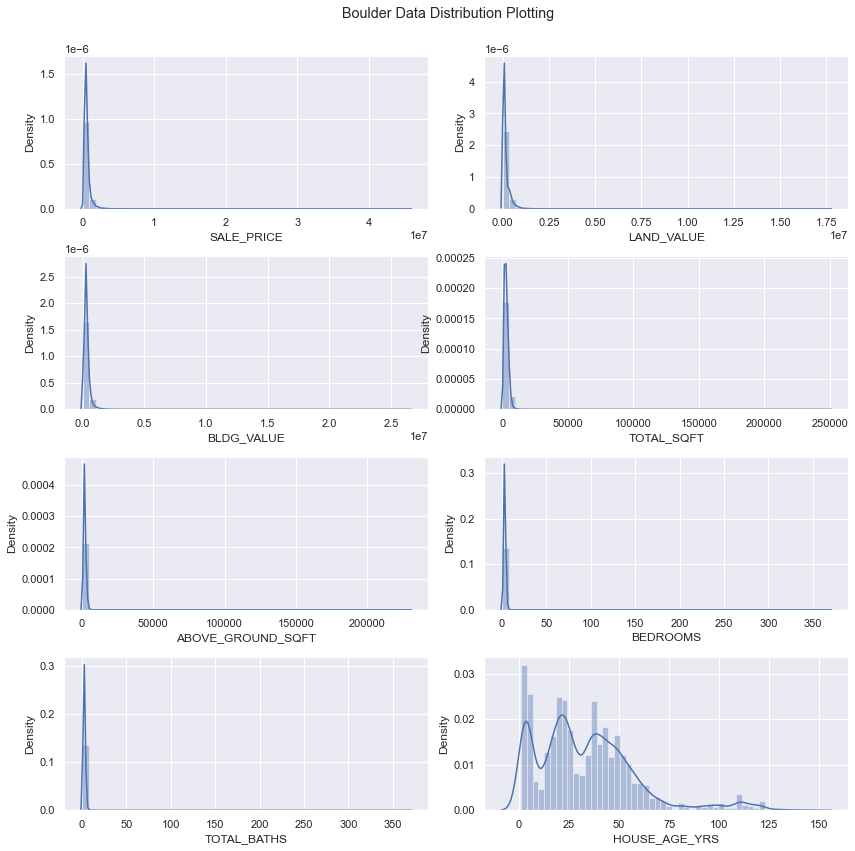

In [309]:
fig, axes = plt.subplots(4, 2, figsize=(12,12))
fig.suptitle('Boulder Data Distribution Plotting')
fig.tight_layout(pad=2)

# Visualize the SALE_PRICE
sns.distplot(bld_df['SALE_PRICE'], ax=axes[0,0])
# Visualize the LAND_VALUE
sns.distplot(bld_df['LAND_VALUE'], ax=axes[0,1])
# Visualize the BLDG_VALUE
sns.distplot(bld_df['BLDG_VALUE'], ax=axes[1,0])
# Visualize the TOTAL_SQFT
sns.distplot(bld_df['TOTAL_SQFT'], ax=axes[1,1])
# Visualize the ABOVE_GROUND_SQFT
sns.distplot(bld_df['ABOVE_GROUND_SQFT'], ax=axes[2,0])
# Visualize the BEDROOMS
sns.distplot(bld_df['BEDROOMS'], ax=axes[2,1])
# Visualize the TOTAL_BATHS
sns.distplot(bld_df['TOTAL_BATHS'], ax=axes[3,0])
# Visualize the HOUSE_AGE_YRS
sns.distplot(bld_df['HOUSE_AGE_YRS'], ax=axes[3,1])

<AxesSubplot:xlabel='HOUSE_AGE_YRS', ylabel='SALE_PRICE'>

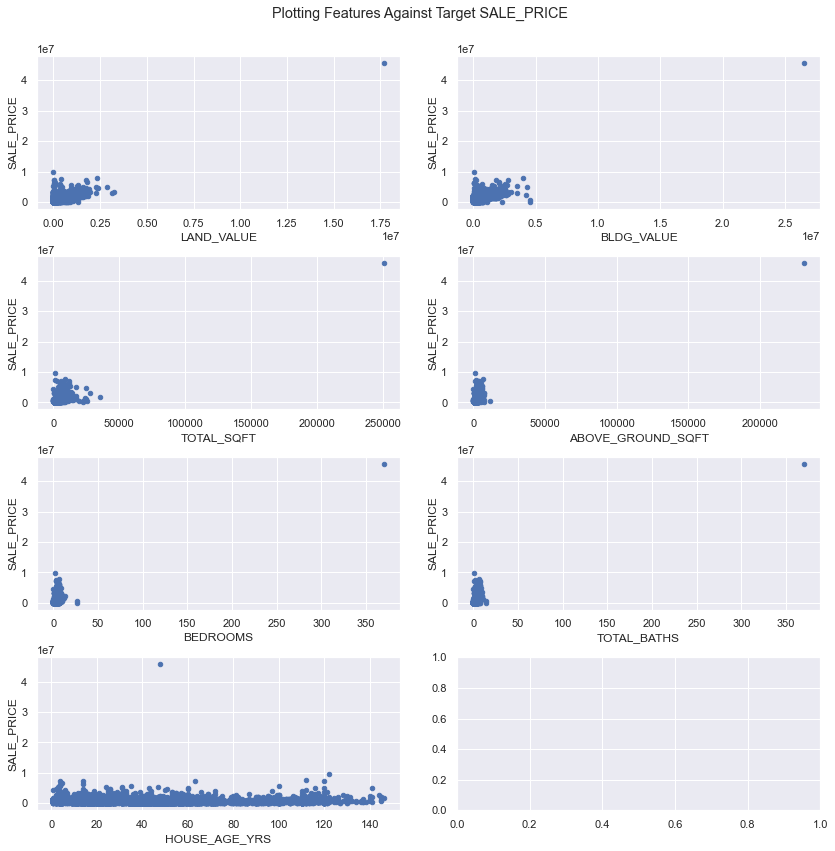

In [310]:
fig, axes = plt.subplots(4, 2, figsize=(12,12))
fig.suptitle('Plotting Features Against Target SALE_PRICE')
fig.tight_layout(pad=2)

# Visualize the LAND_VALUE
bld_df.plot(kind='scatter',x='LAND_VALUE',y='SALE_PRICE', ax=axes[0,0])
# Visualize the BLDG_VALUE
bld_df.plot(kind='scatter',x='BLDG_VALUE',y='SALE_PRICE', ax=axes[0,1])
# Visualize the TOTAL_SQFT
bld_df.plot(kind='scatter',x='TOTAL_SQFT',y='SALE_PRICE', ax=axes[1,0])
# Visualize the ABOVE_GROUND_SQFT
bld_df.plot(kind='scatter',x='ABOVE_GROUND_SQFT',y='SALE_PRICE', ax=axes[1,1])
# Visualize the BEDROOMS
bld_df.plot(kind='scatter',x='BEDROOMS',y='SALE_PRICE', ax=axes[2,0])
# Visualize the TOTAL_BATHS
bld_df.plot(kind='scatter',x='TOTAL_BATHS',y='SALE_PRICE', ax=axes[2,1])
# Visualize the HOUSE_AGE_YRS
bld_df.plot(kind='scatter',x='HOUSE_AGE_YRS',y='SALE_PRICE', ax=axes[3,0])

<AxesSubplot:>

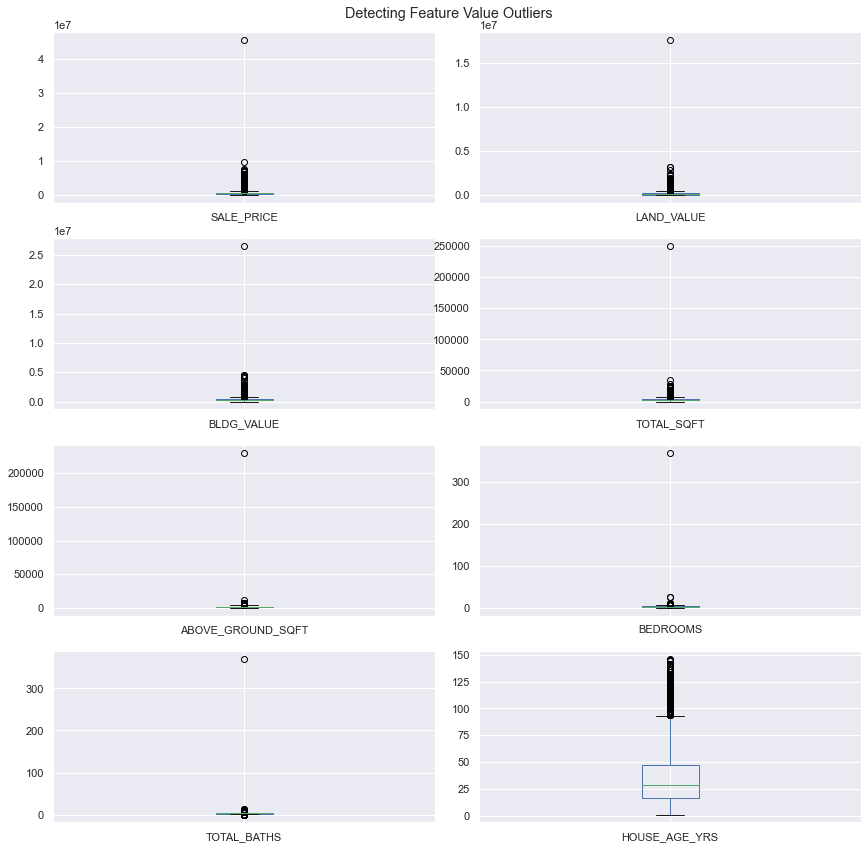

In [311]:
fig, axes = plt.subplots(4, 2, figsize=(12,12))
fig.suptitle('Detecting Feature Value Outliers')
fig.tight_layout(pad=1)

# Visualize the SALE_PRICE
bld_df['SALE_PRICE'].plot(kind="box", ax=axes[0,0])
# Visualize the LAND_VALUE
bld_df['LAND_VALUE'].plot(kind="box", ax=axes[0,1])
# Visualize the BLDG_VALUE
bld_df['BLDG_VALUE'].plot(kind="box", ax=axes[1,0])
# Visualize the TOTAL_SQFT
bld_df['TOTAL_SQFT'].plot(kind="box", ax=axes[1,1])
# Visualize the ABOVE_GROUND_SQFT
bld_df['ABOVE_GROUND_SQFT'].plot(kind="box", ax=axes[2,0])
# Visualize the BEDROOMS
bld_df['BEDROOMS'].plot(kind="box", ax=axes[2,1])
# Visualize the TOTAL_BATHS
bld_df['TOTAL_BATHS'].plot(kind="box", ax=axes[3,0])
# Visualize the HOUSE_AGE_YRS
bld_df['HOUSE_AGE_YRS'].plot(kind="box", ax=axes[3,1])

## Outlier Removal Tests
Here is a series of tests (different DataFrames) that we attempted to remove extreme outliers that would otherwise distort our entire data model performance.

### Test 1: That One Extreme Outlier
After previewing the feature plots above, there is one noticable extreme outlier that stands out above the others. Let's remove that data point.

In [312]:
# Dropping the one very expensive outlier...
test1 = bld_df[(bld_df['SALE_PRICE'] < 10000000)]
test1

BLDG1_DESIGN  BEDROOMS  ABOVE_GROUND_SQFT  SALE_PRICE  \
4                       2-3 Story         3               2940      600000   
5                       2-3 Story         5               3204     1549000   
6                   1-Story Condo         1                571      235000   
7                   1-Story Condo         1                570      162500   
10                  1-Story Condo         3               1214      340500   
...                           ...       ...                ...         ...   
6548                    2-3 Story         3               1032      505000   
6549                1-Story Ranch         3               2371      550000   
6550        Multi-story Townhouse         3               1884      435000   
6551  Multi-story Townhouse Condo         3               1725      518000   
6552        Multi-story Townhouse         4               1152      333500   

     ZIPCODE  LAND_VALUE  BLDG_VALUE  TOTAL_SQFT  TOTAL_BATHS  HOUSE_AGE_YRS  
4      80306      498800      256400        3262            3              4  
5      80304      580000      960000        3424            4             64  
6      81210           0      217400         571            1             31  
7      80306           0      212300         570            1             31  
10     80301           0      372200        1414            2             35  
...      ...         ...         ...         ...          ...            ...  
6548   80301      256000      226100        1896            2             37  
6549   80516       88000      498100        5458            4              3  
6550   80516       38000      342100        2826            3              3  
6551   80026           0      521000        3014            3             14  
6552   80302       91000      223400        1932            3             41  

[23568 rows x 10 columns]

### Test 1: Review Plotting
Now that the extremely expensive outlier is gone, let's review each feature plots.

In [313]:
test1.describe()

BEDROOMS  ABOVE_GROUND_SQFT    SALE_PRICE    LAND_VALUE  \
count  23568.000000       23568.000000  2.356800e+04  2.356800e+04   
mean       3.206594        1779.309021  6.016293e+05  1.636904e+05   
std        1.136746         850.348731  4.484549e+05  2.017693e+05   
min        0.000000           1.000000  1.760000e+02  0.000000e+00   
25%        2.000000        1144.000000  3.575000e+05  5.300000e+04   
50%        3.000000        1588.000000  4.925000e+05  9.900000e+04   
75%        4.000000        2235.000000  6.950000e+05  1.950000e+05   
max       27.000000       11768.000000  9.780000e+06  3.232000e+06   

         BLDG_VALUE    TOTAL_SQFT   TOTAL_BATHS  HOUSE_AGE_YRS  
count  2.356800e+04  23568.000000  23568.000000   23568.000000  
mean   3.411586e+05   3003.592371      2.754795      33.417685  
std    2.491523e+05   1689.378972      1.152002      24.886553  
min    0.000000e+00      1.000000      0.000000       1.000000  
25%    2.090000e+05   1830.000000      2.000000      16.000000  
50%    2.988000e+05   2709.500000      3.000000      29.000000  
75%    4.114238e+05   3904.000000      3.000000      47.000000  
max    4.548700e+06  35105.000000     14.000000     146.000000

C:\Users\joesh\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\joesh\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\joesh\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-lev

<AxesSubplot:xlabel='HOUSE_AGE_YRS', ylabel='Density'>

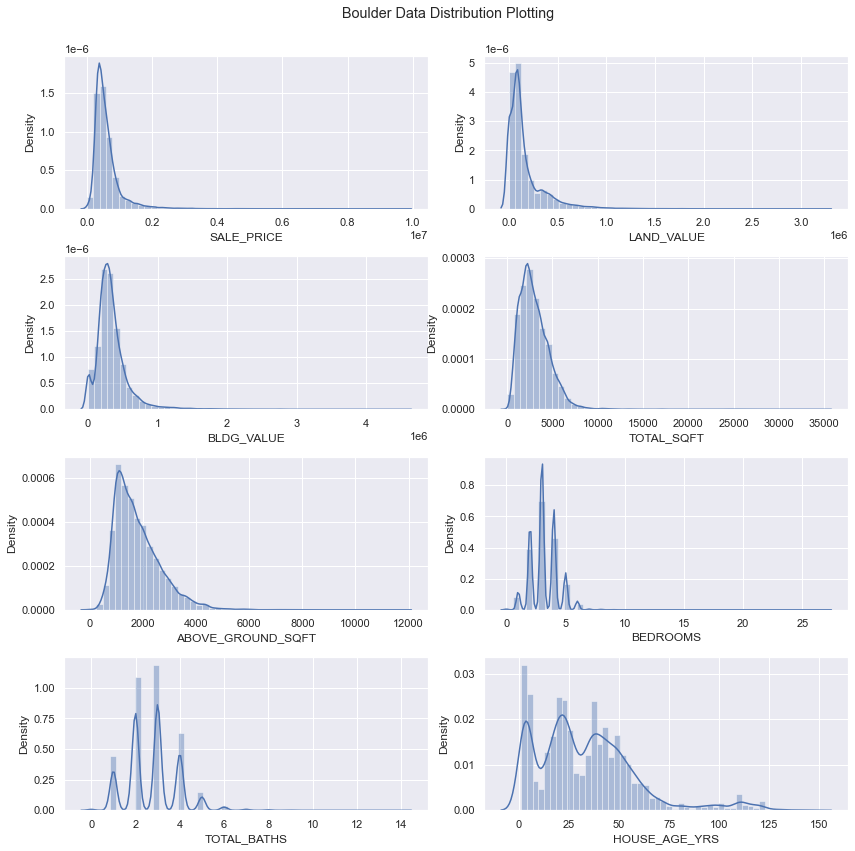

In [314]:
fig, axes = plt.subplots(4, 2, figsize=(12,12))
fig.suptitle('Boulder Data Distribution Plotting')
fig.tight_layout(pad=2)

# Visualize the SALE_PRICE
sns.distplot(test1['SALE_PRICE'], ax=axes[0,0])
# Visualize the LAND_VALUE
sns.distplot(test1['LAND_VALUE'], ax=axes[0,1])
# Visualize the BLDG_VALUE
sns.distplot(test1['BLDG_VALUE'], ax=axes[1,0])
# Visualize the TOTAL_SQFT
sns.distplot(test1['TOTAL_SQFT'], ax=axes[1,1])
# Visualize the ABOVE_GROUND_SQFT
sns.distplot(test1['ABOVE_GROUND_SQFT'], ax=axes[2,0])
# Visualize the BEDROOMS
sns.distplot(test1['BEDROOMS'], ax=axes[2,1])
# Visualize the TOTAL_BATHS
sns.distplot(test1['TOTAL_BATHS'], ax=axes[3,0])
# Visualize the HOUSE_AGE_YRS
sns.distplot(test1['HOUSE_AGE_YRS'], ax=axes[3,1])

<AxesSubplot:xlabel='HOUSE_AGE_YRS', ylabel='SALE_PRICE'>

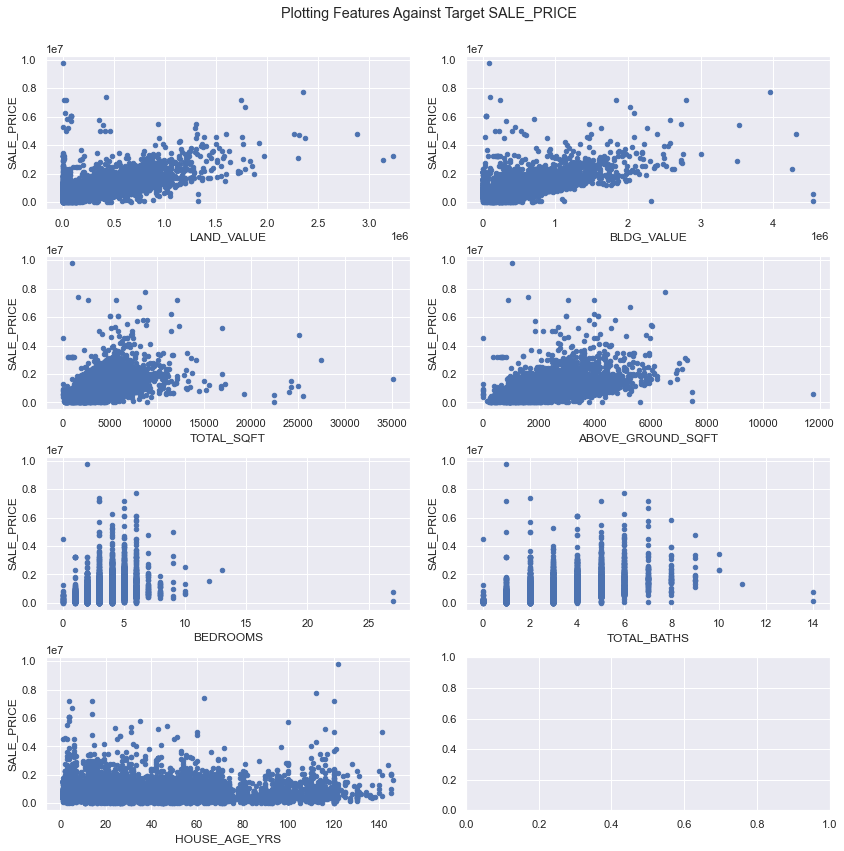

In [315]:
fig, axes = plt.subplots(4, 2, figsize=(12,12))
fig.suptitle('Plotting Features Against Target SALE_PRICE')
fig.tight_layout(pad=2)

# Visualize the LAND_VALUE
test1.plot(kind='scatter',x='LAND_VALUE',y='SALE_PRICE', ax=axes[0,0])
# Visualize the BLDG_VALUE
test1.plot(kind='scatter',x='BLDG_VALUE',y='SALE_PRICE', ax=axes[0,1])
# Visualize the TOTAL_SQFT
test1.plot(kind='scatter',x='TOTAL_SQFT',y='SALE_PRICE', ax=axes[1,0])
# Visualize the ABOVE_GROUND_SQFT
test1.plot(kind='scatter',x='ABOVE_GROUND_SQFT',y='SALE_PRICE', ax=axes[1,1])
# Visualize the BEDROOMS
test1.plot(kind='scatter',x='BEDROOMS',y='SALE_PRICE', ax=axes[2,0])
# Visualize the TOTAL_BATHS
test1.plot(kind='scatter',x='TOTAL_BATHS',y='SALE_PRICE', ax=axes[2,1])
# Visualize the HOUSE_AGE_YRS
test1.plot(kind='scatter',x='HOUSE_AGE_YRS',y='SALE_PRICE', ax=axes[3,0])

<AxesSubplot:>

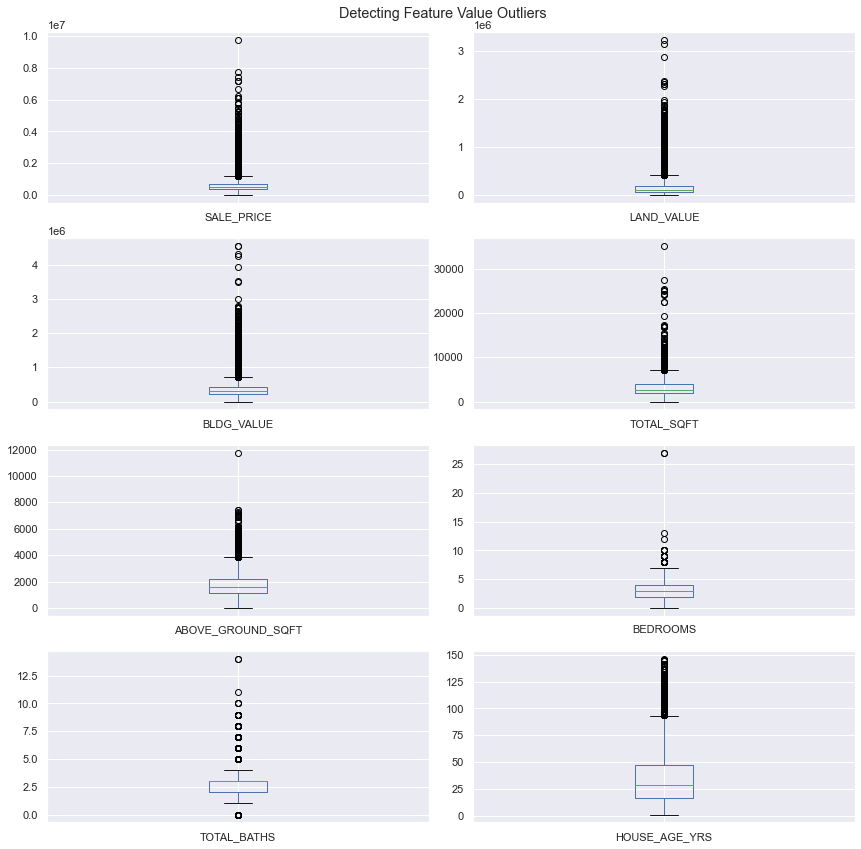

In [316]:
fig, axes = plt.subplots(4, 2, figsize=(12,12))
fig.suptitle('Detecting Feature Value Outliers')
fig.tight_layout(pad=1)

# Visualize the SALE_PRICE
test1['SALE_PRICE'].plot(kind="box", ax=axes[0,0])
# Visualize the LAND_VALUE
test1['LAND_VALUE'].plot(kind="box", ax=axes[0,1])
# Visualize the BLDG_VALUE
test1['BLDG_VALUE'].plot(kind="box", ax=axes[1,0])
# Visualize the TOTAL_SQFT
test1['TOTAL_SQFT'].plot(kind="box", ax=axes[1,1])
# Visualize the ABOVE_GROUND_SQFT
test1['ABOVE_GROUND_SQFT'].plot(kind="box", ax=axes[2,0])
# Visualize the BEDROOMS
test1['BEDROOMS'].plot(kind="box", ax=axes[2,1])
# Visualize the TOTAL_BATHS
test1['TOTAL_BATHS'].plot(kind="box", ax=axes[3,0])
# Visualize the HOUSE_AGE_YRS
test1['HOUSE_AGE_YRS'].plot(kind="box", ax=axes[3,1])

Test1 plots look much better, however it seems like there are still some outliers to be removed. We will save test1 results for now.

In [317]:
# Saving test1 data, this will be used again later in the notebook
test1.to_csv(filepath + "BoulderTest1.csv", index=False)

### Test 2: Additional Outlier Cleaning
For the next step in removing outliers, let's preview the target varible: SALE_PRICE.

{'whiskers': [<matplotlib.lines.Line2D at 0x275e6c4cc40>,
 'caps': [<matplotlib.lines.Line2D at 0x275e6c5a340>,
 'boxes': [<matplotlib.lines.Line2D at 0x275e6c4c8e0>],
 'medians': [<matplotlib.lines.Line2D at 0x275e6c5aa00>],
 'fliers': [],
 'means': []}

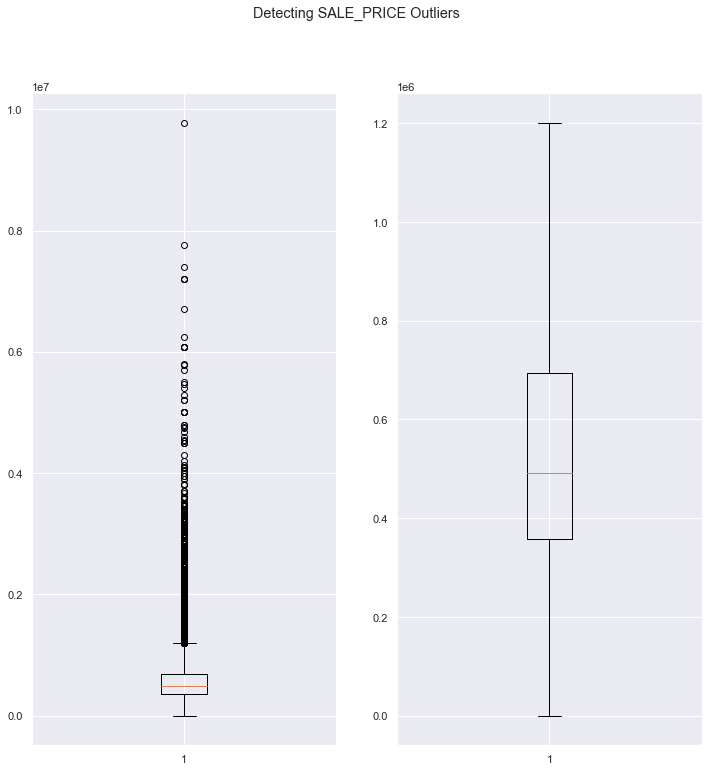

In [318]:
# Plot a boxplot of the SALE_PRICE with and without outliers for comparison.
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12,12))
fig.suptitle('Detecting SALE_PRICE Outliers')

ax1.boxplot(test1['SALE_PRICE'])
ax2.boxplot(test1['SALE_PRICE'], showfliers=False)

It looks like there is a lot more prices are outliers (points above the upper whisker). For test2, let's try to drop all of these outliers and manually set the maximum SALE_PRICE to 1.2e6 (the top end of the whisker).

In [319]:
# Dropping the outliers (points above the max box whisker value)
test2 = bld_df[(bld_df['SALE_PRICE'] < 1.2e6)]
test2

BLDG1_DESIGN  BEDROOMS  ABOVE_GROUND_SQFT  SALE_PRICE  \
4                       2-3 Story         3               2940      600000   
6                   1-Story Condo         1                571      235000   
7                   1-Story Condo         1                570      162500   
10                  1-Story Condo         3               1214      340500   
11          Multi-story Townhouse         3               1870      386500   
...                           ...       ...                ...         ...   
6548                    2-3 Story         3               1032      505000   
6549                1-Story Ranch         3               2371      550000   
6550        Multi-story Townhouse         3               1884      435000   
6551  Multi-story Townhouse Condo         3               1725      518000   
6552        Multi-story Townhouse         4               1152      333500   

     ZIPCODE  LAND_VALUE  BLDG_VALUE  TOTAL_SQFT  TOTAL_BATHS  HOUSE_AGE_YRS  
4      80306      498800      256400        3262            3              4  
6      81210           0      217400         571            1             31  
7      80306           0      212300         570            1             31  
10     80301           0      372200        1414            2             35  
11     80026      122000      353700        3194            4             43  
...      ...         ...         ...         ...          ...            ...  
6548   80301      256000      226100        1896            2             37  
6549   80516       88000      498100        5458            4              3  
6550   80516       38000      342100        2826            3              3  
6551   80026           0      521000        3014            3             14  
6552   80302       91000      223400        1932            3             41  

[21957 rows x 10 columns]

C:\Users\joesh\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\joesh\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\joesh\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-lev

<AxesSubplot:xlabel='HOUSE_AGE_YRS', ylabel='Density'>

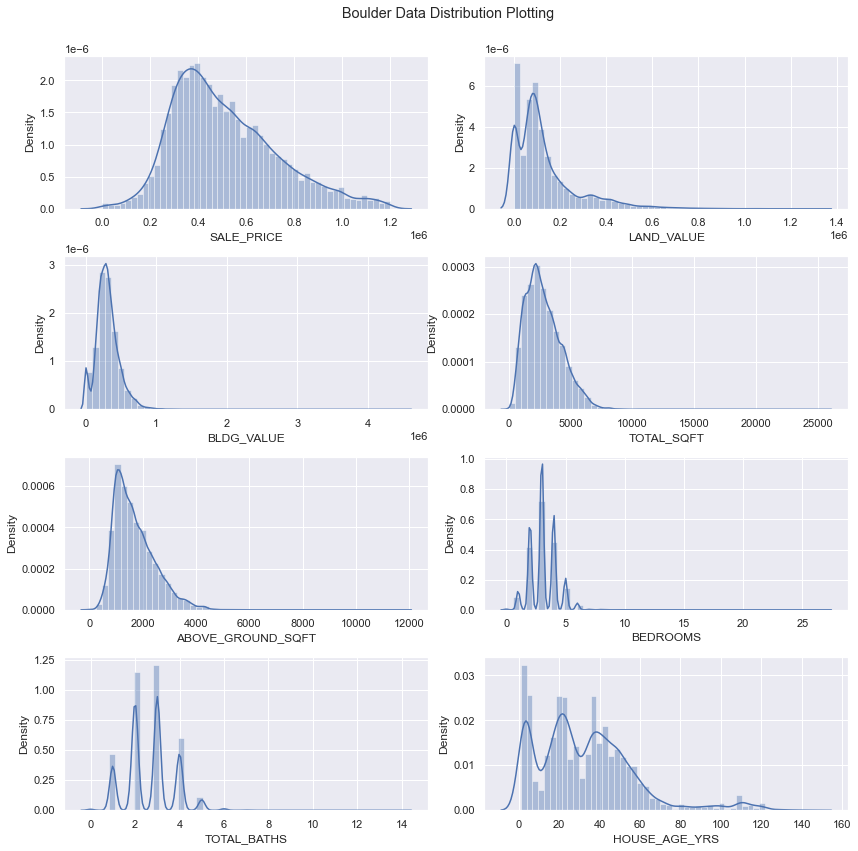

In [320]:
fig, axes = plt.subplots(4, 2, figsize=(12,12))
fig.suptitle('Boulder Data Distribution Plotting')
fig.tight_layout(pad=2)

# Visualize the SALE_PRICE
sns.distplot(test2['SALE_PRICE'], ax=axes[0,0])
# Visualize the LAND_VALUE
sns.distplot(test2['LAND_VALUE'], ax=axes[0,1])
# Visualize the BLDG_VALUE
sns.distplot(test2['BLDG_VALUE'], ax=axes[1,0])
# Visualize the TOTAL_SQFT
sns.distplot(test2['TOTAL_SQFT'], ax=axes[1,1])
# Visualize the ABOVE_GROUND_SQFT
sns.distplot(test2['ABOVE_GROUND_SQFT'], ax=axes[2,0])
# Visualize the BEDROOMS
sns.distplot(test2['BEDROOMS'], ax=axes[2,1])
# Visualize the TOTAL_BATHS
sns.distplot(test2['TOTAL_BATHS'], ax=axes[3,0])
# Visualize the HOUSE_AGE_YRS
sns.distplot(test2['HOUSE_AGE_YRS'], ax=axes[3,1])

<AxesSubplot:xlabel='HOUSE_AGE_YRS', ylabel='SALE_PRICE'>

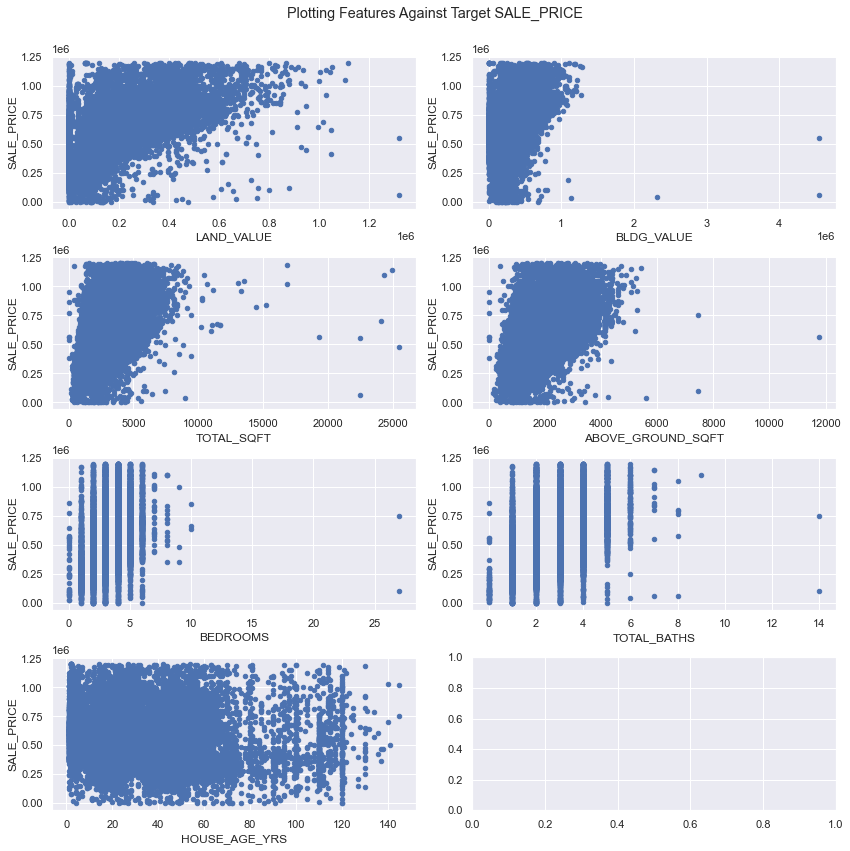

In [321]:
fig, axes = plt.subplots(4, 2, figsize=(12,12))
fig.suptitle('Plotting Features Against Target SALE_PRICE')
fig.tight_layout(pad=2)

# Visualize the LAND_VALUE
test2.plot(kind='scatter',x='LAND_VALUE',y='SALE_PRICE', ax=axes[0,0])
# Visualize the BLDG_VALUE
test2.plot(kind='scatter',x='BLDG_VALUE',y='SALE_PRICE', ax=axes[0,1])
# Visualize the TOTAL_SQFT
test2.plot(kind='scatter',x='TOTAL_SQFT',y='SALE_PRICE', ax=axes[1,0])
# Visualize the ABOVE_GROUND_SQFT
test2.plot(kind='scatter',x='ABOVE_GROUND_SQFT',y='SALE_PRICE', ax=axes[1,1])
# Visualize the BEDROOMS
test2.plot(kind='scatter',x='BEDROOMS',y='SALE_PRICE', ax=axes[2,0])
# Visualize the TOTAL_BATHS
test2.plot(kind='scatter',x='TOTAL_BATHS',y='SALE_PRICE', ax=axes[2,1])
# Visualize the HOUSE_AGE_YRS
test2.plot(kind='scatter',x='HOUSE_AGE_YRS',y='SALE_PRICE', ax=axes[3,0])

<AxesSubplot:>

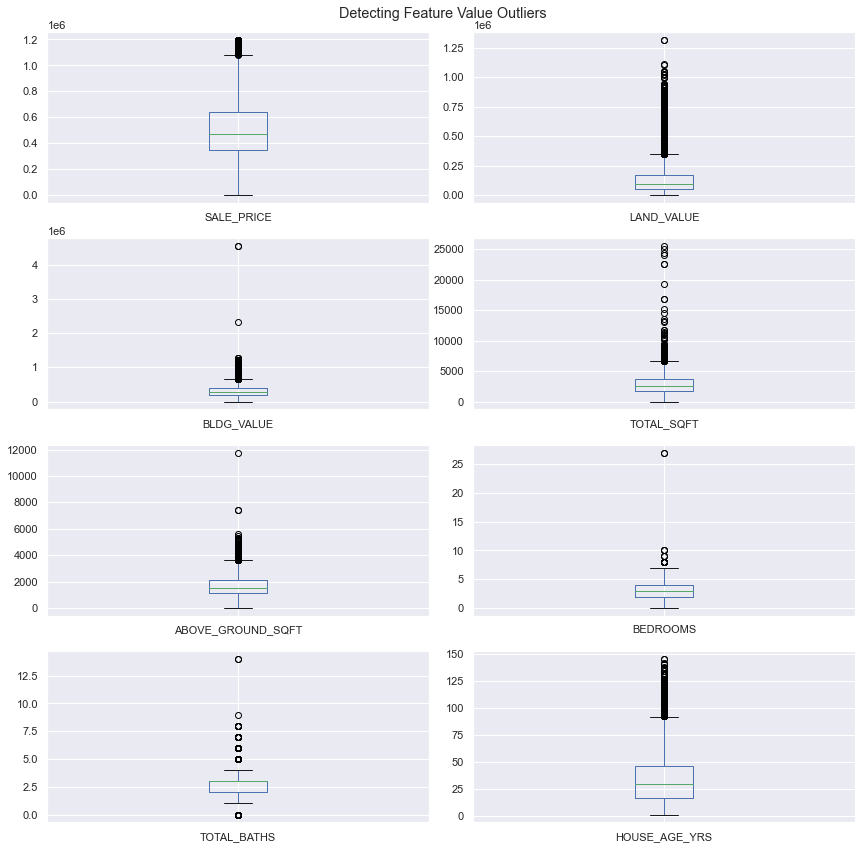

In [322]:
fig, axes = plt.subplots(4, 2, figsize=(12,12))
fig.suptitle('Detecting Feature Value Outliers')
fig.tight_layout(pad=1)

# Visualize the SALE_PRICE
test2['SALE_PRICE'].plot(kind="box", ax=axes[0,0])
# Visualize the LAND_VALUE
test2['LAND_VALUE'].plot(kind="box", ax=axes[0,1])
# Visualize the BLDG_VALUE
test2['BLDG_VALUE'].plot(kind="box", ax=axes[1,0])
# Visualize the TOTAL_SQFT
test2['TOTAL_SQFT'].plot(kind="box", ax=axes[1,1])
# Visualize the ABOVE_GROUND_SQFT
test2['ABOVE_GROUND_SQFT'].plot(kind="box", ax=axes[2,0])
# Visualize the BEDROOMS
test2['BEDROOMS'].plot(kind="box", ax=axes[2,1])
# Visualize the TOTAL_BATHS
test2['TOTAL_BATHS'].plot(kind="box", ax=axes[3,0])
# Visualize the HOUSE_AGE_YRS
test2['HOUSE_AGE_YRS'].plot(kind="box", ax=axes[3,1])

Test2 data point distributions look much better being closer to a gaussian-like distribution. We will save test2 results for now.

In [323]:
# Saving test2 data.
test2.to_csv(filepath + "BoulderTest2.csv", index=False)

### Test 3: IQR Cleaning
Instead of manually removing all of the outliers, let's try a more statistical method in removing the outliers: the interquartile range.

In [324]:
# Use the interquartile method to remove outliers...
Q1 = bld_df["SALE_PRICE"].quantile(0.25)
Q3 = bld_df["SALE_PRICE"].quantile(0.75)
IQR = Q3-Q1

test3 = (bld_df["SALE_PRICE"] >= Q1-1.5*IQR) & (bld_df["SALE_PRICE"] <= Q3+1.5*IQR)
test3 = bld_df.loc[test3]
test3

BLDG1_DESIGN  BEDROOMS  ABOVE_GROUND_SQFT  SALE_PRICE  \
4                       2-3 Story         3               2940      600000   
6                   1-Story Condo         1                571      235000   
7                   1-Story Condo         1                570      162500   
10                  1-Story Condo         3               1214      340500   
11          Multi-story Townhouse         3               1870      386500   
...                           ...       ...                ...         ...   
6548                    2-3 Story         3               1032      505000   
6549                1-Story Ranch         3               2371      550000   
6550        Multi-story Townhouse         3               1884      435000   
6551  Multi-story Townhouse Condo         3               1725      518000   
6552        Multi-story Townhouse         4               1152      333500   

     ZIPCODE  LAND_VALUE  BLDG_VALUE  TOTAL_SQFT  TOTAL_BATHS  HOUSE_AGE_YRS  
4      80306      498800      256400        3262            3              4  
6      81210           0      217400         571            1             31  
7      80306           0      212300         570            1             31  
10     80301           0      372200        1414            2             35  
11     80026      122000      353700        3194            4             43  
...      ...         ...         ...         ...          ...            ...  
6548   80301      256000      226100        1896            2             37  
6549   80516       88000      498100        5458            4              3  
6550   80516       38000      342100        2826            3              3  
6551   80026           0      521000        3014            3             14  
6552   80302       91000      223400        1932            3             41  

[22010 rows x 10 columns]

C:\Users\joesh\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\joesh\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\joesh\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-lev

<AxesSubplot:xlabel='HOUSE_AGE_YRS', ylabel='Density'>

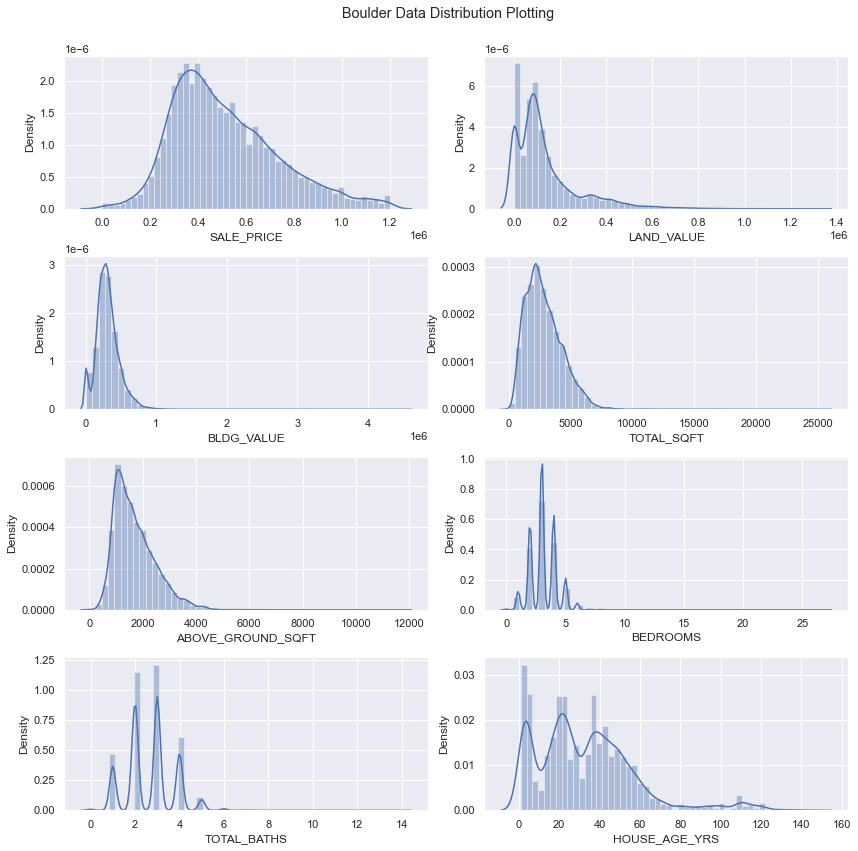

In [325]:
fig, axes = plt.subplots(4, 2, figsize=(12,12))
fig.suptitle('Boulder Data Distribution Plotting')
fig.tight_layout(pad=2)

# Visualize the SALE_PRICE
sns.distplot(test3['SALE_PRICE'], ax=axes[0,0])
# Visualize the LAND_VALUE
sns.distplot(test3['LAND_VALUE'], ax=axes[0,1])
# Visualize the BLDG_VALUE
sns.distplot(test3['BLDG_VALUE'], ax=axes[1,0])
# Visualize the TOTAL_SQFT
sns.distplot(test3['TOTAL_SQFT'], ax=axes[1,1])
# Visualize the ABOVE_GROUND_SQFT
sns.distplot(test3['ABOVE_GROUND_SQFT'], ax=axes[2,0])
# Visualize the BEDROOMS
sns.distplot(test3['BEDROOMS'], ax=axes[2,1])
# Visualize the TOTAL_BATHS
sns.distplot(test3['TOTAL_BATHS'], ax=axes[3,0])
# Visualize the HOUSE_AGE_YRS
sns.distplot(test3['HOUSE_AGE_YRS'], ax=axes[3,1])

<AxesSubplot:xlabel='HOUSE_AGE_YRS', ylabel='SALE_PRICE'>

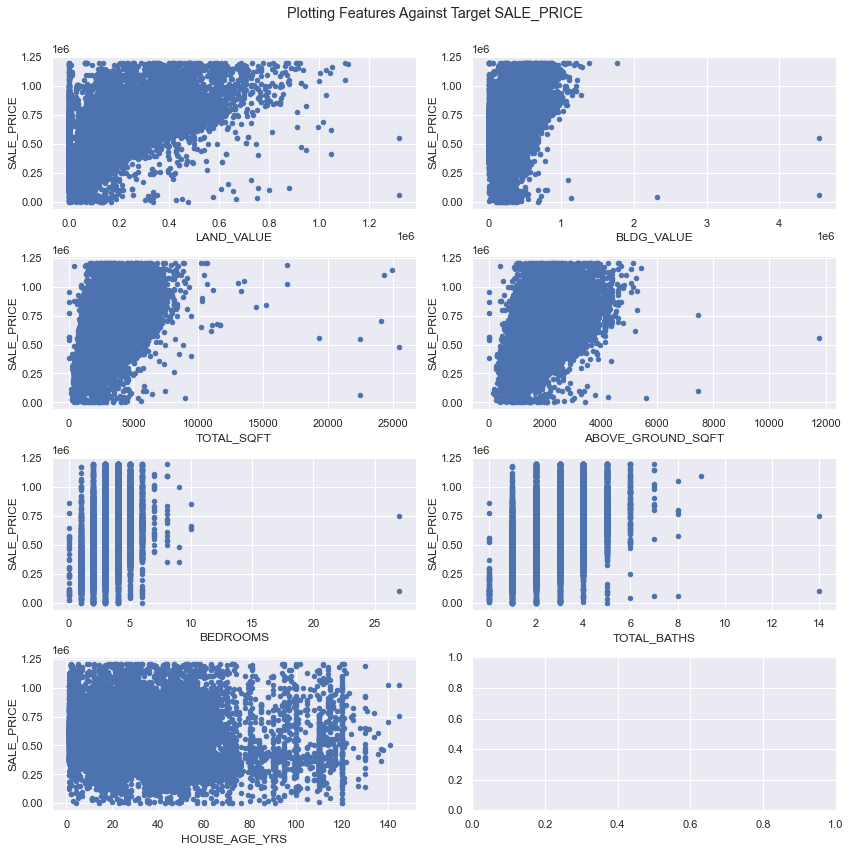

In [326]:
fig, axes = plt.subplots(4, 2, figsize=(12,12))
fig.suptitle('Plotting Features Against Target SALE_PRICE')
fig.tight_layout(pad=2)

# Visualize the LAND_VALUE
test3.plot(kind='scatter',x='LAND_VALUE',y='SALE_PRICE', ax=axes[0,0])
# Visualize the BLDG_VALUE
test3.plot(kind='scatter',x='BLDG_VALUE',y='SALE_PRICE', ax=axes[0,1])
# Visualize the TOTAL_SQFT
test3.plot(kind='scatter',x='TOTAL_SQFT',y='SALE_PRICE', ax=axes[1,0])
# Visualize the ABOVE_GROUND_SQFT
test3.plot(kind='scatter',x='ABOVE_GROUND_SQFT',y='SALE_PRICE', ax=axes[1,1])
# Visualize the BEDROOMS
test3.plot(kind='scatter',x='BEDROOMS',y='SALE_PRICE', ax=axes[2,0])
# Visualize the TOTAL_BATHS
test3.plot(kind='scatter',x='TOTAL_BATHS',y='SALE_PRICE', ax=axes[2,1])
# Visualize the HOUSE_AGE_YRS
test3.plot(kind='scatter',x='HOUSE_AGE_YRS',y='SALE_PRICE', ax=axes[3,0])

<AxesSubplot:>

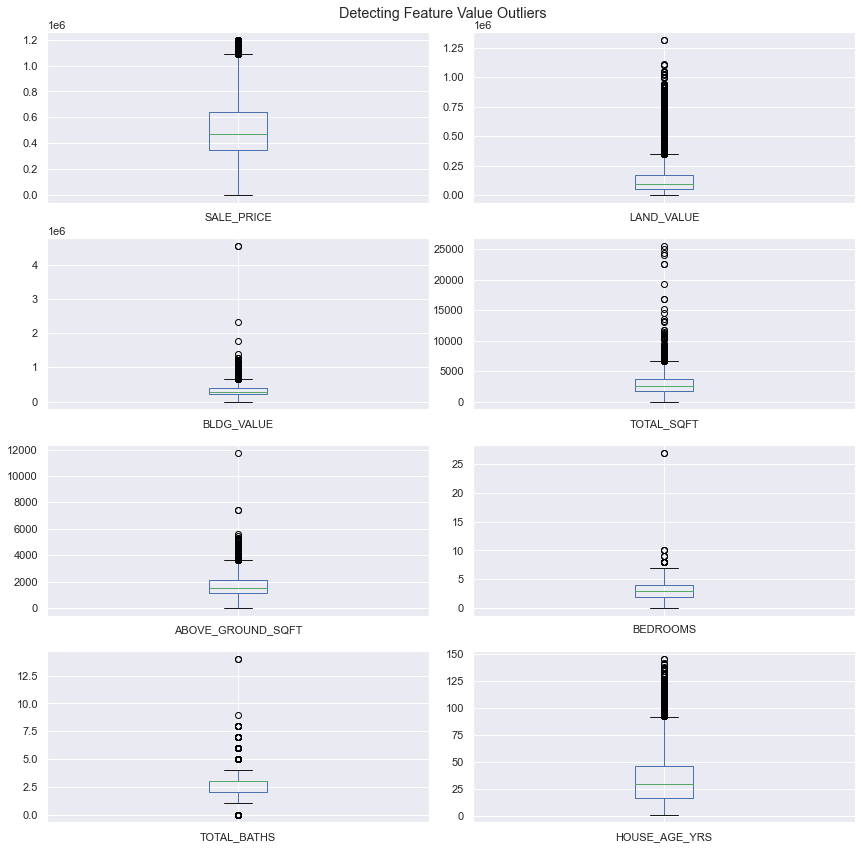

In [327]:
fig, axes = plt.subplots(4, 2, figsize=(12,12))
fig.suptitle('Detecting Feature Value Outliers')
fig.tight_layout(pad=1)

# Visualize the SALE_PRICE
test3['SALE_PRICE'].plot(kind="box", ax=axes[0,0])
# Visualize the LAND_VALUE
test3['LAND_VALUE'].plot(kind="box", ax=axes[0,1])
# Visualize the BLDG_VALUE
test3['BLDG_VALUE'].plot(kind="box", ax=axes[1,0])
# Visualize the TOTAL_SQFT
test3['TOTAL_SQFT'].plot(kind="box", ax=axes[1,1])
# Visualize the ABOVE_GROUND_SQFT
test3['ABOVE_GROUND_SQFT'].plot(kind="box", ax=axes[2,0])
# Visualize the BEDROOMS
test3['BEDROOMS'].plot(kind="box", ax=axes[2,1])
# Visualize the TOTAL_BATHS
test3['TOTAL_BATHS'].plot(kind="box", ax=axes[3,0])
# Visualize the HOUSE_AGE_YRS
test3['HOUSE_AGE_YRS'].plot(kind="box", ax=axes[3,1])

Test3 plotting results looks similar to test2, but we will test which data cleaning method performs better later. Let's save test3 DataFrame cleaning for now.

In [328]:
# Saving test3 data.
test3.to_csv(filepath + "BoulderTest3.csv", index=False)

## Normalization
From the tests performed above, it looks like our data is heavily skewed. This skewness can statistically distrupt the model performance, so we must look for normalization techniques to force the skewed data into a normal distribution.
### Logarithmic Tranformation
Logarithmic transformation is one simple normalization technique.

C:\Users\joesh\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='SALE_PRICE', ylabel='Density'>

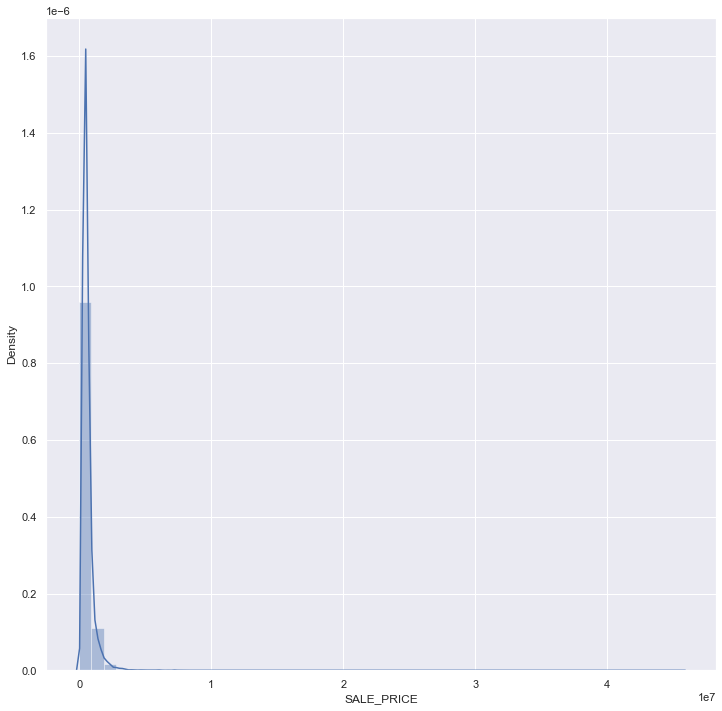

In [329]:
# Visualize the SALE_PRICE
sns.distplot(bld_df['SALE_PRICE'])

C:\Users\joesh\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='SALE_PRICE', ylabel='Density'>

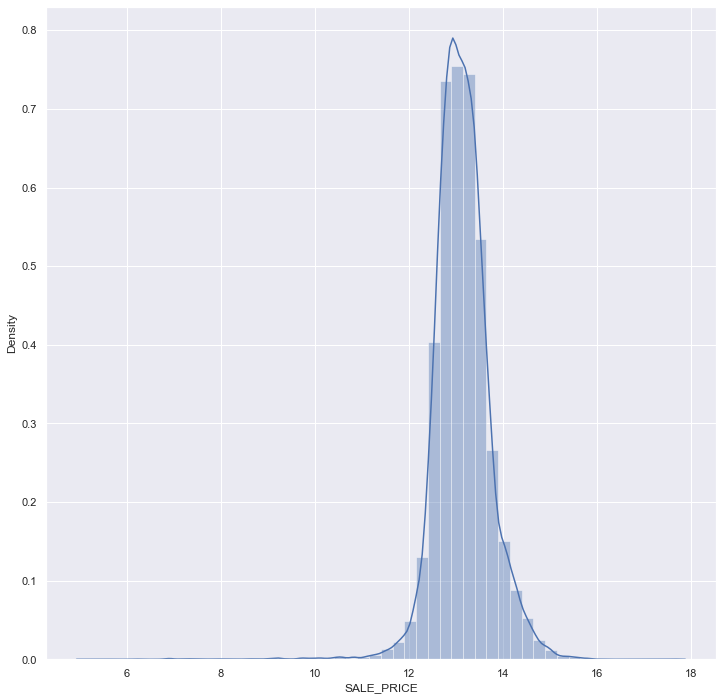

In [330]:
# Log the SALE_PRICE to create a more statistical normal distribution
log_sales = np.log(bld_df["SALE_PRICE"])
sns.distplot(log_sales)

The "log_sales" variable was set aside, so that we can compare the model performances between the skewed SALE_PRICE and normalized SALE_PRICE (log_sales).

### MinMax Scaler
The MinMax Scaler is a normalization technique used to transform all numerical values between 0 and 1. This is a unique method to ensure that each feature will have equal weights when implemented in a model.

We will create a MinMax normalized bld_df in order to check for a feature collinearity comparison below. This dataframe will be separate from the one used in regression analysis below.

In [331]:
# Create a new DataFrame without categorical columns.
bld_df_copy = bld_df[['BEDROOMS','ABOVE_GROUND_SQFT','SALE_PRICE',
                      'LAND_VALUE','BLDG_VALUE','TOTAL_SQFT',
                      'TOTAL_BATHS','HOUSE_AGE_YRS']]
bld_df_copy.head()

BEDROOMS  ABOVE_GROUND_SQFT  SALE_PRICE  LAND_VALUE  BLDG_VALUE  \
4          3               2940      600000      498800      256400   
5          5               3204     1549000      580000      960000   
6          1                571      235000           0      217400   
7          1                570      162500           0      212300   
10         3               1214      340500           0      372200   

    TOTAL_SQFT  TOTAL_BATHS  HOUSE_AGE_YRS  
4         3262            3              4  
5         3424            4             64  
6          571            1             31  
7          570            1             31  
10        1414            2             35

In [332]:
# Apply the MinMax Scaling
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
bld_df_copy_scaled = scaler.fit_transform(bld_df_copy)

In [333]:
cols = ('BEDROOMS','ABOVE_GROUND_SQFT','SALE_PRICE',
        'LAND_VALUE','BLDG_VALUE','TOTAL_SQFT',
        'TOTAL_BATHS', 'HOUSE_AGE_YRS')

normal_bld_df_copy = pd.DataFrame(data=bld_df_copy_scaled,
                                  index=None, columns=cols)
normal_bld_df_copy.head()

BEDROOMS  ABOVE_GROUND_SQFT  SALE_PRICE  LAND_VALUE  BLDG_VALUE  \
0  0.008108           0.012757    0.013125    0.028220    0.009671   
1  0.013514           0.013903    0.033891    0.032814    0.036208   
2  0.002703           0.002474    0.005138    0.000000    0.008200   
3  0.002703           0.002470    0.003552    0.000000    0.008007   
4  0.008108           0.005265    0.007447    0.000000    0.014038   

   TOTAL_SQFT  TOTAL_BATHS  HOUSE_AGE_YRS  
0    0.013034     0.008108       0.020690  
1    0.013682     0.010811       0.434483  
2    0.002278     0.002703       0.206897  
3    0.002274     0.002703       0.206897  
4    0.005648     0.005405       0.234483

## Feature Multicollinearity
Let us see any trends in the relationships between the features we have.

### Original Dataset Collinearity

<AxesSubplot:>

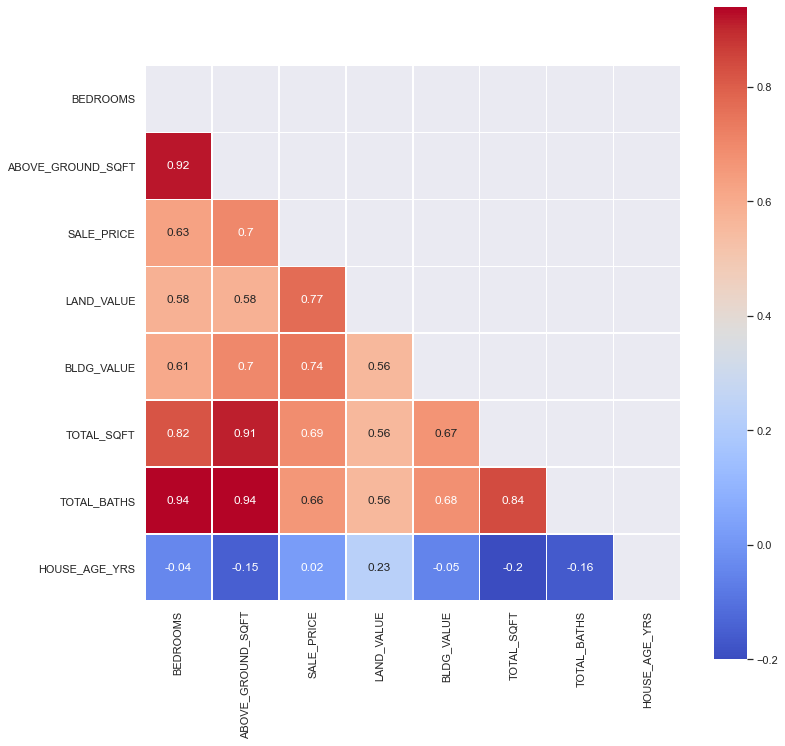

In [334]:
#https://seaborn.pydata.org/examples/many_pairwise_correlations.html
# Generate the correlation Matrix
corr=bld_df.corr()

# Generate the mask to remove redundant graphing of the upper triangle.
mask = np.triu(np.ones_like(corr, dtype=bool))

sns.set(rc={'figure.figsize': (12,12)})
sns.heatmap(bld_df.corr().round(2), mask=mask, cmap="coolwarm",
            square=True, linewidths=.25, annot=True)

### Test1 Collinearity

<AxesSubplot:>

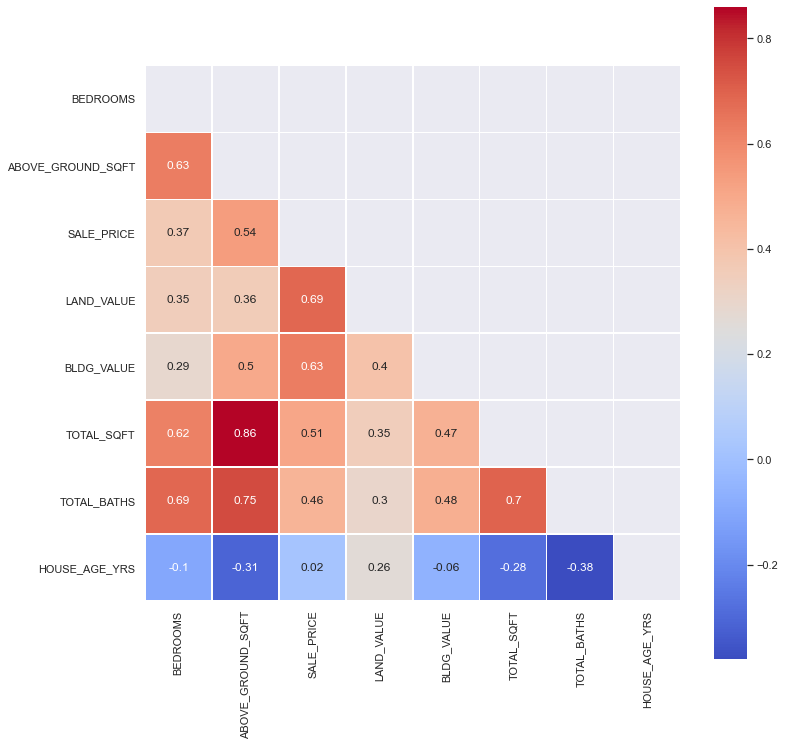

In [335]:
#https://seaborn.pydata.org/examples/many_pairwise_correlations.html
# Generate the correlation Matrix
corr=test1.corr()

# Generate the mask to remove redundant graphing of the upper triangle.
mask = np.triu(np.ones_like(corr, dtype=bool))

sns.set(rc={'figure.figsize': (12,12)})
sns.heatmap(test1.corr().round(2), mask=mask, cmap="coolwarm",
            square=True, linewidths=.25, annot=True)

### Test2 Collinearity

<AxesSubplot:>

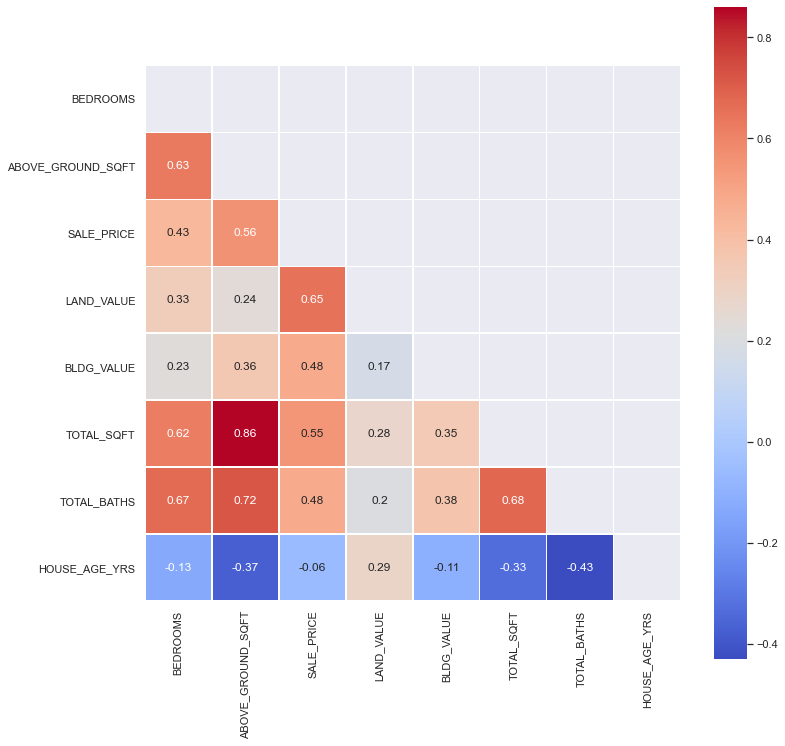

In [336]:
#https://seaborn.pydata.org/examples/many_pairwise_correlations.html
# Generate the correlation Matrix
corr=test2.corr()

# Generate the mask to remove redundant graphing of the upper triangle.
mask = np.triu(np.ones_like(corr, dtype=bool))

sns.set(rc={'figure.figsize': (12,12)})
sns.heatmap(test3.corr().round(2), mask=mask, cmap="coolwarm",
            square=True, linewidths=.25, annot=True)

### Test3 Collinearity

<AxesSubplot:>

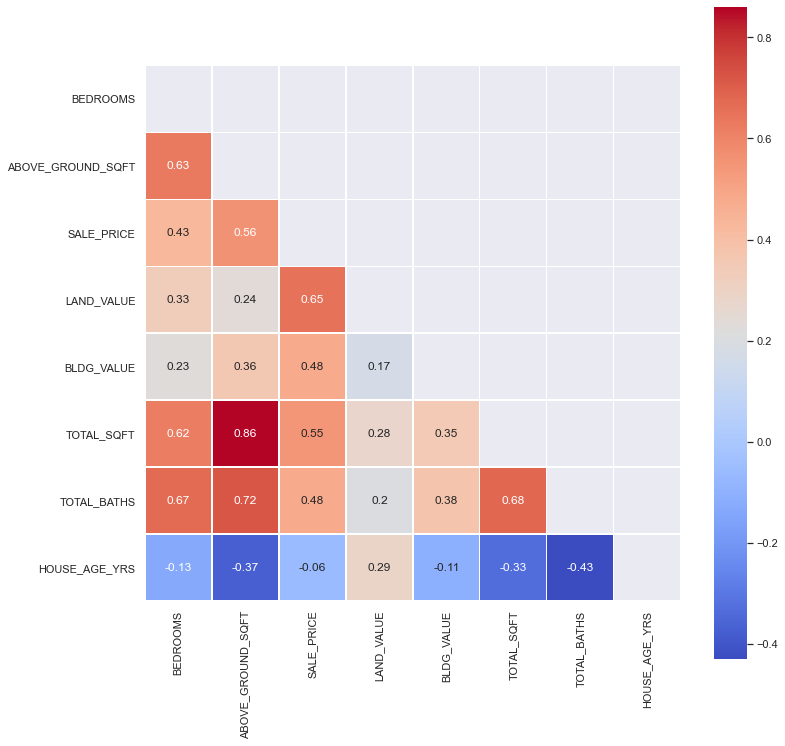

In [337]:
#https://seaborn.pydata.org/examples/many_pairwise_correlations.html
# Generate the correlation Matrix
corr=test3.corr()

# Generate the mask to remove redundant graphing of the upper triangle.
mask = np.triu(np.ones_like(corr, dtype=bool))

sns.set(rc={'figure.figsize': (12,12)})
sns.heatmap(test3.corr().round(2), mask=mask, cmap="coolwarm",
            square=True, linewidths=.25, annot=True)

### MinMax Normalized Collinearity

<AxesSubplot:>

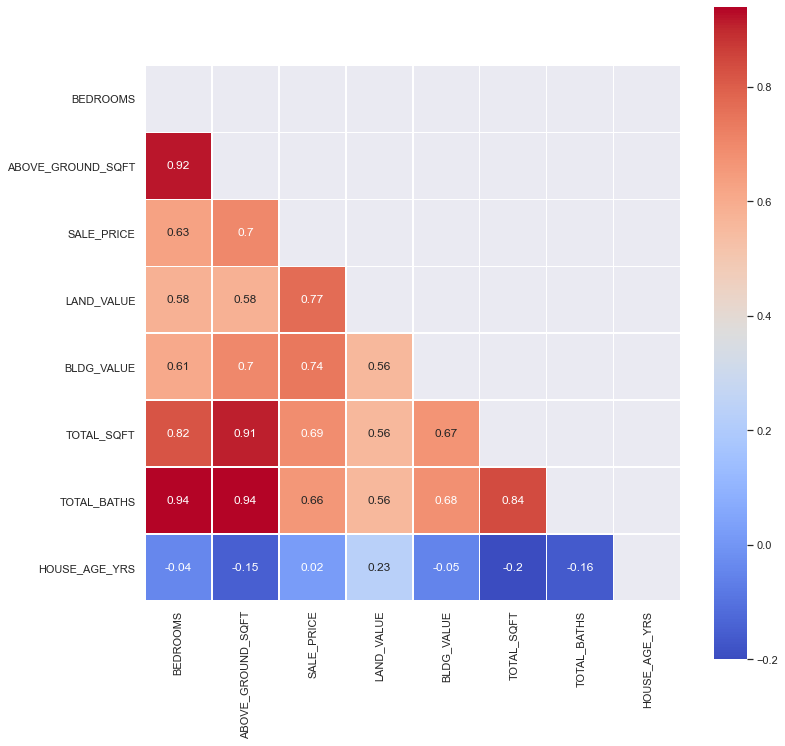

In [338]:
#https://seaborn.pydata.org/examples/many_pairwise_correlations.html
# Generate the correlation Matrix
corr=normal_bld_df_copy.corr()

# Generate the mask to remove redundant graphing of the upper triangle.
mask = np.triu(np.ones_like(corr, dtype=bool))

sns.set(rc={'figure.figsize': (12,12)})
sns.heatmap(normal_bld_df_copy.corr().round(2), mask=mask, cmap="coolwarm",
            square=True, linewidths=.25, annot=True)

Through these heatmaps it seems like the SALE_PRICE has the highest correlation to LAND_VALUE and ABOVE_GROUND_SQFT.

Maybe we should further clean the data (specifically the outliers) with respect to these attributes?

### Test4: More Outlier Cleaning

<AxesSubplot:>

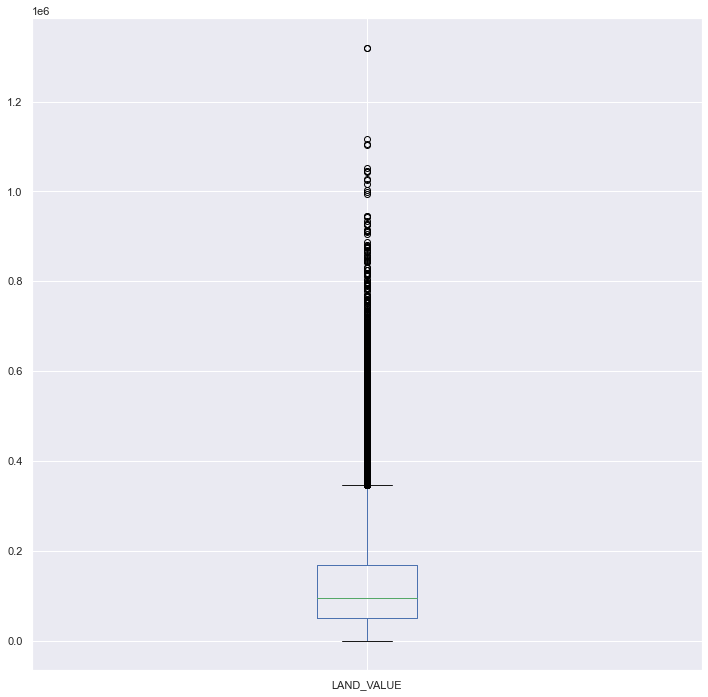

In [339]:
test3['LAND_VALUE'].plot(kind="box")

<AxesSubplot:>

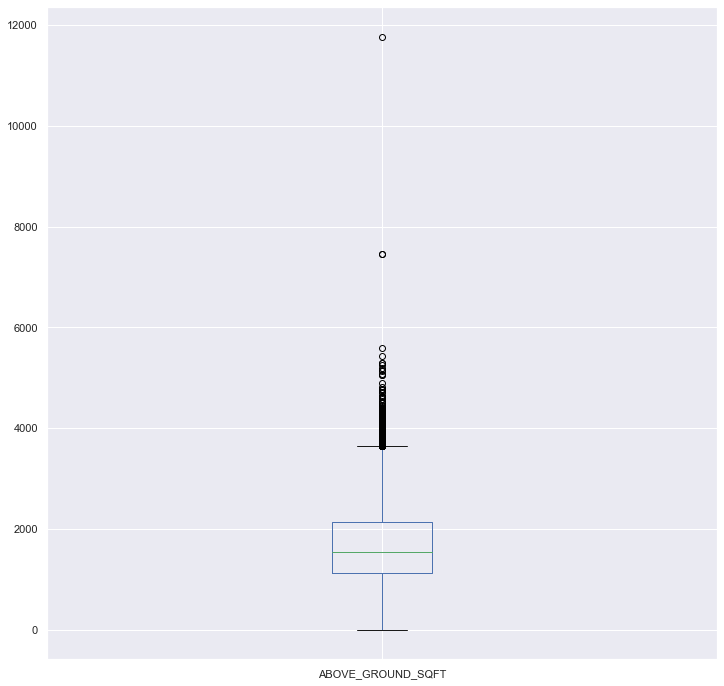

In [340]:
test3['ABOVE_GROUND_SQFT'].plot(kind="box")

Let's create another test dataframe that uses test3, but removes outliers from the LAND_VALUE and ABOVE_GROUND_SQFT attributes.

In [341]:
# Manual removal of most of the top-end outliers.
test4 = (test3['LAND_VALUE'] <=400000) & (test3['ABOVE_GROUND_SQFT'] <= 3700)
test4 = test3.loc[test4]
test4

BLDG1_DESIGN  BEDROOMS  ABOVE_GROUND_SQFT  SALE_PRICE  \
6                   1-Story Condo         1                571      235000   
7                   1-Story Condo         1                570      162500   
10                  1-Story Condo         3               1214      340500   
11          Multi-story Townhouse         3               1870      386500   
12                      2-3 Story         2               1333      283500   
...                           ...       ...                ...         ...   
6548                    2-3 Story         3               1032      505000   
6549                1-Story Ranch         3               2371      550000   
6550        Multi-story Townhouse         3               1884      435000   
6551  Multi-story Townhouse Condo         3               1725      518000   
6552        Multi-story Townhouse         4               1152      333500   

     ZIPCODE  LAND_VALUE  BLDG_VALUE  TOTAL_SQFT  TOTAL_BATHS  HOUSE_AGE_YRS  
6      81210           0      217400         571            1             31  
7      80306           0      212300         570            1             31  
10     80301           0      372200        1414            2             35  
11     80026      122000      353700        3194            4             43  
12     80301      334000      283100        2380            3             30  
...      ...         ...         ...         ...          ...            ...  
6548   80301      256000      226100        1896            2             37  
6549   80516       88000      498100        5458            4              3  
6550   80516       38000      342100        2826            3              3  
6551   80026           0      521000        3014            3             14  
6552   80302       91000      223400        1932            3             41  

[20278 rows x 10 columns]

<AxesSubplot:>

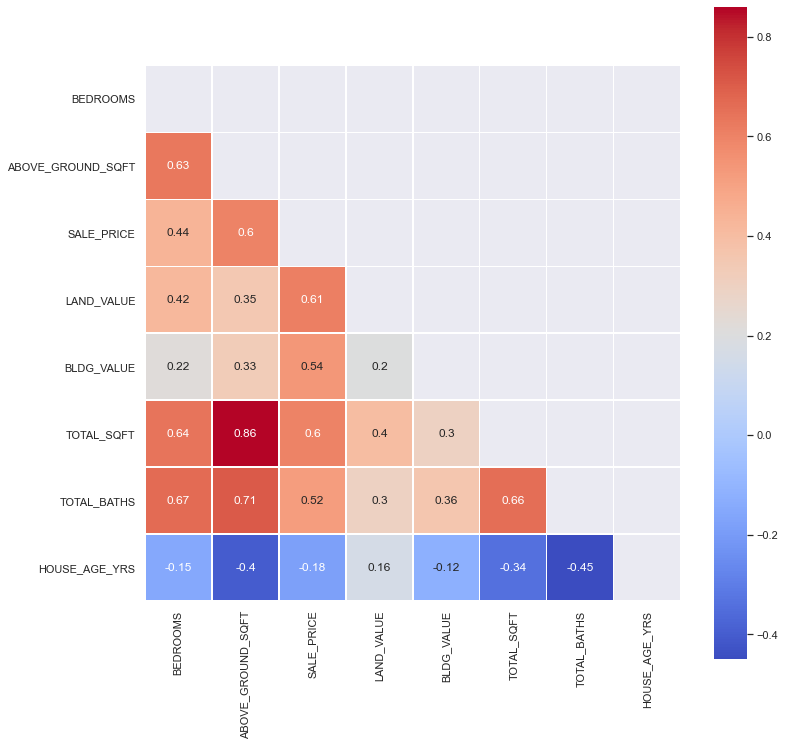

In [342]:
#https://seaborn.pydata.org/examples/many_pairwise_correlations.html
# Generate the correlation Matrix
corr=test4.corr()

# Generate the mask to remove redundant graphing of the upper triangle.
mask = np.triu(np.ones_like(corr, dtype=bool))

sns.set(rc={'figure.figsize': (12,12)})
sns.heatmap(test4.corr().round(2), mask=mask, cmap="coolwarm",
            square=True, linewidths=.25, annot=True)

In [343]:
# Saving test4 data.
test4.to_csv(filepath + "BoulderTest4.csv", index=False)

# One Hot Encoding
From the information above, there are two more string object datatypes to deal with.

Finally, we can finally work with the "BLDG1_DESIGN" categorical attribute. A popular technique used is the One Hot Encoding method to convert the data values into 0(no/false value) and 1(yes/true value). The downside of this method is that the column size will be very long!

Additionally, the same technique will be applied into the "ZIPCODE" attribute.

Information about this data cleaning technique is found here: https://www.datacamp.com/community/tutorials/categorical-data

In [344]:
# Preview current database.
bld_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 23569 entries, 4 to 6552
Data columns (total 10 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   BLDG1_DESIGN       23569 non-null  object
 1   BEDROOMS           23569 non-null  int64 
 2   ABOVE_GROUND_SQFT  23569 non-null  int64 
 3   SALE_PRICE         23569 non-null  int64 
 4   ZIPCODE            23569 non-null  object
 5   LAND_VALUE         23569 non-null  int64 
 6   BLDG_VALUE         23569 non-null  int64 
 7   TOTAL_SQFT         23569 non-null  int64 
 8   TOTAL_BATHS        23569 non-null  int64 
 9   HOUSE_AGE_YRS      23569 non-null  int64 
dtypes: int64(8), object(2)
memory usage: 2.0+ MB


## One-Hot Encode of Un-normalized Data
We will perform a test between orignal data versus most recently cleaned--test4--data as well as unnormalized versus normalized data to see which technique generates the best model performance.

In [345]:
# Making a copy of the bld_df dataframe which will become normalized
bld_scaled = bld_df.copy()
bld_scaled.head()

BLDG1_DESIGN  BEDROOMS  ABOVE_GROUND_SQFT  SALE_PRICE ZIPCODE  \
4       2-3 Story         3               2940      600000   80306   
5       2-3 Story         5               3204     1549000   80304   
6   1-Story Condo         1                571      235000   81210   
7   1-Story Condo         1                570      162500   80306   
10  1-Story Condo         3               1214      340500   80301   

    LAND_VALUE  BLDG_VALUE  TOTAL_SQFT  TOTAL_BATHS  HOUSE_AGE_YRS  
4       498800      256400        3262            3              4  
5       580000      960000        3424            4             64  
6            0      217400         571            1             31  
7            0      212300         570            1             31  
10           0      372200        1414            2             35

In [346]:
# Making a copy of the test4 dataframe which will become normalized
test4_scaled = test4.copy()
test4_scaled.head()

BLDG1_DESIGN  BEDROOMS  ABOVE_GROUND_SQFT  SALE_PRICE ZIPCODE  \
6           1-Story Condo         1                571      235000   81210   
7           1-Story Condo         1                570      162500   80306   
10          1-Story Condo         3               1214      340500   80301   
11  Multi-story Townhouse         3               1870      386500   80026   
12              2-3 Story         2               1333      283500   80301   

    LAND_VALUE  BLDG_VALUE  TOTAL_SQFT  TOTAL_BATHS  HOUSE_AGE_YRS  
6            0      217400         571            1             31  
7            0      212300         570            1             31  
10           0      372200        1414            2             35  
11      122000      353700        3194            4             43  
12      334000      283100        2380            3             30

In [347]:
# Covert the pythonic object datatype
# into category datatype for faster performance.
bld_df["BLDG1_DESIGN"] = bld_df["BLDG1_DESIGN"].astype("category")
bld_df["ZIPCODE"] = bld_df["ZIPCODE"].astype("category")

print(bld_df.dtypes)

BLDG1_DESIGN         category
BEDROOMS                int64
ABOVE_GROUND_SQFT       int64
SALE_PRICE              int64
ZIPCODE              category
LAND_VALUE              int64
BLDG_VALUE              int64
TOTAL_SQFT              int64
TOTAL_BATHS             int64
HOUSE_AGE_YRS           int64
dtype: object


In [348]:
bld_df = pd.get_dummies(bld_df,
                        columns=['BLDG1_DESIGN','ZIPCODE'],
                        prefix = ['DSN','Z'])

print(bld_df.head())

    BEDROOMS  ABOVE_GROUND_SQFT  SALE_PRICE  LAND_VALUE  BLDG_VALUE  \
4          3               2940      600000      498800      256400   
5          5               3204     1549000      580000      960000   
6          1                571      235000           0      217400   
7          1                570      162500           0      212300   
10         3               1214      340500           0      372200   

    TOTAL_SQFT  TOTAL_BATHS  HOUSE_AGE_YRS  DSN_1-Story Condo  \
4         3262            3              4                  0   
5         3424            4             64                  0   
6          571            1             31                  1   
7          570            1             31                  1   
10        1414            2             35                  1   

    DSN_1-Story Ranch  DSN_1-Story Townhouse  DSN_1-Story Townhouse Condo  \
4                   0                      0                            0   
5                   0       

In [349]:
# Saving OneHot data.
bld_df.to_csv(filepath + "BoulderPriceDFOneHot.csv", index=False)

## One-Hot Encode of to-be-Normalized Data

In [350]:
# Covert the pythonic object datatype
# into category datatype for faster performance.
bld_scaled["BLDG1_DESIGN"] = bld_scaled["BLDG1_DESIGN"].astype("category")
bld_scaled["ZIPCODE"] = bld_scaled["ZIPCODE"].astype("category")

print(bld_scaled.dtypes)

BLDG1_DESIGN         category
BEDROOMS                int64
ABOVE_GROUND_SQFT       int64
SALE_PRICE              int64
ZIPCODE              category
LAND_VALUE              int64
BLDG_VALUE              int64
TOTAL_SQFT              int64
TOTAL_BATHS             int64
HOUSE_AGE_YRS           int64
dtype: object


In [351]:
bld_scaled = pd.get_dummies(bld_scaled,
                        columns=['BLDG1_DESIGN','ZIPCODE'],
                        prefix = ['DSN','Z'])

print(bld_scaled.head())

    BEDROOMS  ABOVE_GROUND_SQFT  SALE_PRICE  LAND_VALUE  BLDG_VALUE  \
4          3               2940      600000      498800      256400   
5          5               3204     1549000      580000      960000   
6          1                571      235000           0      217400   
7          1                570      162500           0      212300   
10         3               1214      340500           0      372200   

    TOTAL_SQFT  TOTAL_BATHS  HOUSE_AGE_YRS  DSN_1-Story Condo  \
4         3262            3              4                  0   
5         3424            4             64                  0   
6          571            1             31                  1   
7          570            1             31                  1   
10        1414            2             35                  1   

    DSN_1-Story Ranch  DSN_1-Story Townhouse  DSN_1-Story Townhouse Condo  \
4                   0                      0                            0   
5                   0       

In [352]:
# Covert the pythonic object datatype
# into category datatype for faster performance.
test4_scaled["BLDG1_DESIGN"] = test4_scaled["BLDG1_DESIGN"].astype("category")
test4_scaled["ZIPCODE"] = test4_scaled["ZIPCODE"].astype("category")

print(test4_scaled.dtypes)

BLDG1_DESIGN         category
BEDROOMS                int64
ABOVE_GROUND_SQFT       int64
SALE_PRICE              int64
ZIPCODE              category
LAND_VALUE              int64
BLDG_VALUE              int64
TOTAL_SQFT              int64
TOTAL_BATHS             int64
HOUSE_AGE_YRS           int64
dtype: object


In [353]:
test4_scaled = pd.get_dummies(test4_scaled,
                        columns=['BLDG1_DESIGN','ZIPCODE'],
                        prefix = ['DSN','Z'])

print(test4_scaled.head())

    BEDROOMS  ABOVE_GROUND_SQFT  SALE_PRICE  LAND_VALUE  BLDG_VALUE  \
6          1                571      235000           0      217400   
7          1                570      162500           0      212300   
10         3               1214      340500           0      372200   
11         3               1870      386500      122000      353700   
12         2               1333      283500      334000      283100   

    TOTAL_SQFT  TOTAL_BATHS  HOUSE_AGE_YRS  DSN_1-Story Condo  \
6          571            1             31                  1   
7          570            1             31                  1   
10        1414            2             35                  1   
11        3194            4             43                  0   
12        2380            3             30                  0   

    DSN_1-Story Ranch  DSN_1-Story Townhouse  DSN_1-Story Townhouse Condo  \
6                   0                      0                            0   
7                   0       

## One-Hot Encode of Remaining test1, test2, and test3

In [354]:
# Covert the pythonic object datatype
# into category datatype for faster performance.
test1["BLDG1_DESIGN"] = test1["BLDG1_DESIGN"].astype("category")
test1["ZIPCODE"] = test1["ZIPCODE"].astype("category")

print(test1.dtypes)

BLDG1_DESIGN         category
BEDROOMS                int64
ABOVE_GROUND_SQFT       int64
SALE_PRICE              int64
ZIPCODE              category
LAND_VALUE              int64
BLDG_VALUE              int64
TOTAL_SQFT              int64
TOTAL_BATHS             int64
HOUSE_AGE_YRS           int64
dtype: object


<ipython-input-354-dcdb444d19bc>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test1["BLDG1_DESIGN"] = test1["BLDG1_DESIGN"].astype("category")
<ipython-input-354-dcdb444d19bc>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test1["ZIPCODE"] = test1["ZIPCODE"].astype("category")


In [355]:
test1 = pd.get_dummies(test1,
                        columns=['BLDG1_DESIGN','ZIPCODE'],
                        prefix = ['DSN','Z'])

print(test1.head())

    BEDROOMS  ABOVE_GROUND_SQFT  SALE_PRICE  LAND_VALUE  BLDG_VALUE  \
4          3               2940      600000      498800      256400   
5          5               3204     1549000      580000      960000   
6          1                571      235000           0      217400   
7          1                570      162500           0      212300   
10         3               1214      340500           0      372200   

    TOTAL_SQFT  TOTAL_BATHS  HOUSE_AGE_YRS  DSN_1-Story Condo  \
4         3262            3              4                  0   
5         3424            4             64                  0   
6          571            1             31                  1   
7          570            1             31                  1   
10        1414            2             35                  1   

    DSN_1-Story Ranch  DSN_1-Story Townhouse  DSN_1-Story Townhouse Condo  \
4                   0                      0                            0   
5                   0       

In [356]:
# Covert the pythonic object datatype
# into category datatype for faster performance.
test2["BLDG1_DESIGN"] = test2["BLDG1_DESIGN"].astype("category")
test2["ZIPCODE"] = test2["ZIPCODE"].astype("category")

print(test2.dtypes)

BLDG1_DESIGN         category
BEDROOMS                int64
ABOVE_GROUND_SQFT       int64
SALE_PRICE              int64
ZIPCODE              category
LAND_VALUE              int64
BLDG_VALUE              int64
TOTAL_SQFT              int64
TOTAL_BATHS             int64
HOUSE_AGE_YRS           int64
dtype: object


<ipython-input-356-c27846ebbdfe>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test2["BLDG1_DESIGN"] = test2["BLDG1_DESIGN"].astype("category")
<ipython-input-356-c27846ebbdfe>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test2["ZIPCODE"] = test2["ZIPCODE"].astype("category")


In [357]:
test2 = pd.get_dummies(test2,
                        columns=['BLDG1_DESIGN','ZIPCODE'],
                        prefix = ['DSN','Z'])

print(test2.head())

    BEDROOMS  ABOVE_GROUND_SQFT  SALE_PRICE  LAND_VALUE  BLDG_VALUE  \
4          3               2940      600000      498800      256400   
6          1                571      235000           0      217400   
7          1                570      162500           0      212300   
10         3               1214      340500           0      372200   
11         3               1870      386500      122000      353700   

    TOTAL_SQFT  TOTAL_BATHS  HOUSE_AGE_YRS  DSN_1-Story Condo  \
4         3262            3              4                  0   
6          571            1             31                  1   
7          570            1             31                  1   
10        1414            2             35                  1   
11        3194            4             43                  0   

    DSN_1-Story Ranch  DSN_1-Story Townhouse  DSN_1-Story Townhouse Condo  \
4                   0                      0                            0   
6                   0       

In [358]:
# Covert the pythonic object datatype
# into category datatype for faster performance.
test3["BLDG1_DESIGN"] = test3["BLDG1_DESIGN"].astype("category")
test3["ZIPCODE"] = test3["ZIPCODE"].astype("category")

print(test3.dtypes)

BLDG1_DESIGN         category
BEDROOMS                int64
ABOVE_GROUND_SQFT       int64
SALE_PRICE              int64
ZIPCODE              category
LAND_VALUE              int64
BLDG_VALUE              int64
TOTAL_SQFT              int64
TOTAL_BATHS             int64
HOUSE_AGE_YRS           int64
dtype: object


<ipython-input-358-459aba4270c2>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test3["BLDG1_DESIGN"] = test3["BLDG1_DESIGN"].astype("category")
<ipython-input-358-459aba4270c2>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test3["ZIPCODE"] = test3["ZIPCODE"].astype("category")


In [359]:
test3 = pd.get_dummies(test3,
                        columns=['BLDG1_DESIGN','ZIPCODE'],
                        prefix = ['DSN','Z'])

print(test3.head())

    BEDROOMS  ABOVE_GROUND_SQFT  SALE_PRICE  LAND_VALUE  BLDG_VALUE  \
4          3               2940      600000      498800      256400   
6          1                571      235000           0      217400   
7          1                570      162500           0      212300   
10         3               1214      340500           0      372200   
11         3               1870      386500      122000      353700   

    TOTAL_SQFT  TOTAL_BATHS  HOUSE_AGE_YRS  DSN_1-Story Condo  \
4         3262            3              4                  0   
6          571            1             31                  1   
7          570            1             31                  1   
10        1414            2             35                  1   
11        3194            4             43                  0   

    DSN_1-Story Ranch  DSN_1-Story Townhouse  DSN_1-Story Townhouse Condo  \
4                   0                      0                            0   
6                   0       

Now that all of the features are numerical, we can begin the training/testing.

# Model Testing

## Train/Test Split

In [360]:
# Import dependencies.
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score

## Linear Regression

### Baseline

In [361]:
# Separate features and target attributes.
y = bld_df["SALE_PRICE"]
x = bld_df.drop("SALE_PRICE", axis=1)
print(x.shape, y.shape)

(23569, 229) (23569,)


In [362]:
# Split data into train/test: 80/20.
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2)
print("training set: ",x_train.shape,y_train.shape)
print("test set: ",x_test.shape,y_test.shape)

training set:  (18855, 229) (18855,)
test set:  (4714, 229) (4714,)


In [363]:
# set up linear regression classifier
linreg = LinearRegression()

# fit classifier to data and target
linreg.fit(x_train,y_train)

y_pred_linreg = linreg.predict(x_test)

In [364]:
# calculate metric to assess fit
linreg.score(x_train,y_train)

0.7995475385785342

### With Outliers--Test3

In [365]:
# Separate features and target attributes.
y = test3["SALE_PRICE"]
x = test3.drop("SALE_PRICE", axis=1)
print(x.shape, y.shape)

(22010, 222) (22010,)


In [366]:
# Split data into train/test: 80/20.
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2)
print("training set: ",x_train.shape,y_train.shape)
print("test set: ",x_test.shape,y_test.shape)

training set:  (17608, 222) (17608,)
test set:  (4402, 222) (4402,)


In [367]:
# set up linear regression classifier
linreg = LinearRegression()

# fit classifier to data and target
linreg.fit(x_train,y_train)

y_pred_linreg = linreg.predict(x_test)

In [368]:
# calculate metric to assess fit
linreg.score(x_train,y_train)

0.7099976225317021

Seems like without outlier model performed worse? Let's try the remaining tests...

### Test1

In [369]:
# Separate features and target attributes.
y = test1["SALE_PRICE"]
x = test1.drop("SALE_PRICE", axis=1)
print(x.shape, y.shape)

(23568, 228) (23568,)


In [370]:
# Split data into train/test: 80/20.
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2)
print("training set: ",x_train.shape,y_train.shape)
print("test set: ",x_test.shape,y_test.shape)

training set:  (18854, 228) (18854,)
test set:  (4714, 228) (4714,)


In [371]:
# set up linear regression classifier
linreg = LinearRegression()

# fit classifier to data and target
linreg.fit(x_train,y_train)

y_pred_linreg = linreg.predict(x_test)

In [372]:
# calculate metric to assess fit
linreg.score(x_train,y_train)

0.6924777947584496

## Test2

In [373]:
# Separate features and target attributes.
y = test2["SALE_PRICE"]
x = test2.drop("SALE_PRICE", axis=1)
print(x.shape, y.shape)

(21957, 222) (21957,)


In [374]:
# Split data into train/test: 80/20.
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2)
print("training set: ",x_train.shape,y_train.shape)
print("test set: ",x_test.shape,y_test.shape)

training set:  (17565, 222) (17565,)
test set:  (4392, 222) (4392,)


In [375]:
# set up linear regression classifier
linreg = LinearRegression()

# fit classifier to data and target
linreg.fit(x_train,y_train)

y_pred_linreg = linreg.predict(x_test)

In [376]:
# calculate metric to assess fit
linreg.score(x_train,y_train)

0.7134207744962706

### Regression using log_sales data

In [377]:
bld_df['LOG_SALE_PRICE'] = np.log(bld_df['SALE_PRICE'])
bld_df.head()

BEDROOMS  ABOVE_GROUND_SQFT  SALE_PRICE  LAND_VALUE  BLDG_VALUE  \
4          3               2940      600000      498800      256400   
5          5               3204     1549000      580000      960000   
6          1                571      235000           0      217400   
7          1                570      162500           0      212300   
10         3               1214      340500           0      372200   

    TOTAL_SQFT  TOTAL_BATHS  HOUSE_AGE_YRS  DSN_1-Story Condo  \
4         3262            3              4                  0   
5         3424            4             64                  0   
6          571            1             31                  1   
7          570            1             31                  1   
10        1414            2             35                  1   

    DSN_1-Story Ranch  DSN_1-Story Townhouse  DSN_1-Story Townhouse Condo  \
4                   0                      0                            0   
5                   0                      0                            0   
6                   0                      0                            0   
7                   0                      0                            0   
10                  0                      0                            0   

    DSN_1920-1939 STYLE  DSN_2-3 Story  DSN_30+ UNIT APTS  DSN_A-Frame  \
4                     0              1                  0            0   
5                     0              1                  0            0   
6                     0              0                  0            0   
7                     0              0                  0            0   
10                    0              0                  0            0   

    DSN_Bi-level  DSN_Detached 1-Story Condo  DSN_Detached Multi-story Condo  \
4              0                           0                               0   
5              0                           0                               0   
6              0                           0                               0   
7              0                           0                               0   
10             0                           0                               0   

    DSN_MODULAR  DSN_Multi-story Condo  DSN_Multi-story Townhouse  \
4             0                      0                          0   
5             0                      0                          0   
6             0                      0                          0   
7             0                      0                          0   
10            0                      0                          0   

    DSN_Multi-story Townhouse Condo  DSN_PAIRED HOMES  DSN_PATIO HOMES  \
4                                 0                 0                0   
5                                 0                 0                0   
6                                 0                 0                0   
7                                 0                 0                0   
10                                0                 0                0   

    DSN_PRIOR TO 1910 MULTI-STY STYLE  DSN_PURGED MANUFACTURED HOME  \
4                                   0                             0   
5                                   0                             0   
6                                   0                             0   
7                                   0                             0   
10                                  0                             0   

    DSN_Split-level  DSN_Studio  Z_80001  Z_80002  Z_80003  Z_80004  Z_80005  \
4                 0           0        0        0        0        0        0   
5                 0           0        0        0        0        0        0   
6                 0           0        0        0        0        0        0   
7                 0           0        0        0        0        0        0   
10                0           0        0        0        0        0        0   

    Z_80007  Z_80011  Z_80012

In [378]:
#i dont want to mess with the bld_df so im making a work around dataframe
bld_df_log = bld_df.copy()
bld_df_log.head()

BEDROOMS  ABOVE_GROUND_SQFT  SALE_PRICE  LAND_VALUE  BLDG_VALUE  \
4          3               2940      600000      498800      256400   
5          5               3204     1549000      580000      960000   
6          1                571      235000           0      217400   
7          1                570      162500           0      212300   
10         3               1214      340500           0      372200   

    TOTAL_SQFT  TOTAL_BATHS  HOUSE_AGE_YRS  DSN_1-Story Condo  \
4         3262            3              4                  0   
5         3424            4             64                  0   
6          571            1             31                  1   
7          570            1             31                  1   
10        1414            2             35                  1   

    DSN_1-Story Ranch  DSN_1-Story Townhouse  DSN_1-Story Townhouse Condo  \
4                   0                      0                            0   
5                   0                      0                            0   
6                   0                      0                            0   
7                   0                      0                            0   
10                  0                      0                            0   

    DSN_1920-1939 STYLE  DSN_2-3 Story  DSN_30+ UNIT APTS  DSN_A-Frame  \
4                     0              1                  0            0   
5                     0              1                  0            0   
6                     0              0                  0            0   
7                     0              0                  0            0   
10                    0              0                  0            0   

    DSN_Bi-level  DSN_Detached 1-Story Condo  DSN_Detached Multi-story Condo  \
4              0                           0                               0   
5              0                           0                               0   
6              0                           0                               0   
7              0                           0                               0   
10             0                           0                               0   

    DSN_MODULAR  DSN_Multi-story Condo  DSN_Multi-story Townhouse  \
4             0                      0                          0   
5             0                      0                          0   
6             0                      0                          0   
7             0                      0                          0   
10            0                      0                          0   

    DSN_Multi-story Townhouse Condo  DSN_PAIRED HOMES  DSN_PATIO HOMES  \
4                                 0                 0                0   
5                                 0                 0                0   
6                                 0                 0                0   
7                                 0                 0                0   
10                                0                 0                0   

    DSN_PRIOR TO 1910 MULTI-STY STYLE  DSN_PURGED MANUFACTURED HOME  \
4                                   0                             0   
5                                   0                             0   
6                                   0                             0   
7                                   0                             0   
10                                  0                             0   

    DSN_Split-level  DSN_Studio  Z_80001  Z_80002  Z_80003  Z_80004  Z_80005  \
4                 0           0        0        0        0        0        0   
5                 0           0        0        0        0        0        0   
6                 0           0        0        0        0        0        0   
7                 0           0        0        0        0        0        0   
10                0           0        0        0        0        0        0   

    Z_80007  Z_80011  Z_80012

In [379]:
bld_df_log.drop(['SALE_PRICE'], axis=1, inplace=True)
bld_df_log.head()

BEDROOMS  ABOVE_GROUND_SQFT  LAND_VALUE  BLDG_VALUE  TOTAL_SQFT  \
4          3               2940      498800      256400        3262   
5          5               3204      580000      960000        3424   
6          1                571           0      217400         571   
7          1                570           0      212300         570   
10         3               1214           0      372200        1414   

    TOTAL_BATHS  HOUSE_AGE_YRS  DSN_1-Story Condo  DSN_1-Story Ranch  \
4             3              4                  0                  0   
5             4             64                  0                  0   
6             1             31                  1                  0   
7             1             31                  1                  0   
10            2             35                  1                  0   

    DSN_1-Story Townhouse  DSN_1-Story Townhouse Condo  DSN_1920-1939 STYLE  \
4                       0                            0                    0   
5                       0                            0                    0   
6                       0                            0                    0   
7                       0                            0                    0   
10                      0                            0                    0   

    DSN_2-3 Story  DSN_30+ UNIT APTS  DSN_A-Frame  DSN_Bi-level  \
4               1                  0            0             0   
5               1                  0            0             0   
6               0                  0            0             0   
7               0                  0            0             0   
10              0                  0            0             0   

    DSN_Detached 1-Story Condo  DSN_Detached Multi-story Condo  DSN_MODULAR  \
4                            0                               0            0   
5                            0                               0            0   
6                            0                               0            0   
7                            0                               0            0   
10                           0                               0            0   

    DSN_Multi-story Condo  DSN_Multi-story Townhouse  \
4                       0                          0   
5                       0                          0   
6                       0                          0   
7                       0                          0   
10                      0                          0   

    DSN_Multi-story Townhouse Condo  DSN_PAIRED HOMES  DSN_PATIO HOMES  \
4                                 0                 0                0   
5                                 0                 0                0   
6                                 0                 0                0   
7                                 0                 0                0   
10                                0                 0                0   

    DSN_PRIOR TO 1910 MULTI-STY STYLE  DSN_PURGED MANUFACTURED HOME  \
4                                   0                             0   
5                                   0                             0   
6                                   0                             0   
7                                   0                             0   
10                                  0                             0   

    DSN_Split-level  DSN_Studio  Z_80001  Z_80002  Z_80003  Z_80004  Z_80005  \
4                 0           0        0        0        0        0        0   
5                 0           0        0        0        0        0        0   
6                 0           0        0        0        0        0        0   
7                 0           0        0        0        0        0        0   
10                0           0        0        0        0        0        0   

    Z_80007  Z_80011  Z_80012  Z_80014  Z_80015  Z_80016  Z_80017  Z_80020  \
4         0        0   

In [380]:
#begin setting up regression
y = bld_df_log['LOG_SALE_PRICE']
x = bld_df_log.drop('LOG_SALE_PRICE', axis=1)
print(x.shape, y.shape)

(23569, 229) (23569,)


In [381]:
x_train, x_test, y_train, y_test = train_test_split(x,y, test_size=.2)
print("training set: ",x_train.shape,y_train.shape)
print("test set: ",x_test.shape,y_test.shape)

training set:  (18855, 229) (18855,)
test set:  (4714, 229) (4714,)


In [382]:
# set up linear regression classifier
linreg = LinearRegression()

# fit classifier to data and target
linreg.fit(x_train,y_train)

y_pred_linreg = linreg.predict(x_test)

In [383]:
# calculate metric to assess fit
linreg.score(x_train,y_train)

0.6320110329693994

### Regression using normalized data

In [384]:
bld_scaled.head()

BEDROOMS  ABOVE_GROUND_SQFT  SALE_PRICE  LAND_VALUE  BLDG_VALUE  \
4          3               2940      600000      498800      256400   
5          5               3204     1549000      580000      960000   
6          1                571      235000           0      217400   
7          1                570      162500           0      212300   
10         3               1214      340500           0      372200   

    TOTAL_SQFT  TOTAL_BATHS  HOUSE_AGE_YRS  DSN_1-Story Condo  \
4         3262            3              4                  0   
5         3424            4             64                  0   
6          571            1             31                  1   
7          570            1             31                  1   
10        1414            2             35                  1   

    DSN_1-Story Ranch  DSN_1-Story Townhouse  DSN_1-Story Townhouse Condo  \
4                   0                      0                            0   
5                   0                      0                            0   
6                   0                      0                            0   
7                   0                      0                            0   
10                  0                      0                            0   

    DSN_1920-1939 STYLE  DSN_2-3 Story  DSN_30+ UNIT APTS  DSN_A-Frame  \
4                     0              1                  0            0   
5                     0              1                  0            0   
6                     0              0                  0            0   
7                     0              0                  0            0   
10                    0              0                  0            0   

    DSN_Bi-level  DSN_Detached 1-Story Condo  DSN_Detached Multi-story Condo  \
4              0                           0                               0   
5              0                           0                               0   
6              0                           0                               0   
7              0                           0                               0   
10             0                           0                               0   

    DSN_MODULAR  DSN_Multi-story Condo  DSN_Multi-story Townhouse  \
4             0                      0                          0   
5             0                      0                          0   
6             0                      0                          0   
7             0                      0                          0   
10            0                      0                          0   

    DSN_Multi-story Townhouse Condo  DSN_PAIRED HOMES  DSN_PATIO HOMES  \
4                                 0                 0                0   
5                                 0                 0                0   
6                                 0                 0                0   
7                                 0                 0                0   
10                                0                 0                0   

    DSN_PRIOR TO 1910 MULTI-STY STYLE  DSN_PURGED MANUFACTURED HOME  \
4                                   0                             0   
5                                   0                             0   
6                                   0                             0   
7                                   0                             0   
10                                  0                             0   

    DSN_Split-level  DSN_Studio  Z_80001  Z_80002  Z_80003  Z_80004  Z_80005  \
4                 0           0        0        0        0        0        0   
5                 0           0        0        0        0        0        0   
6                 0           0        0        0        0        0        0   
7                 0           0        0        0        0        0        0   
10                0           0        0        0        0        0        0   

    Z_80007  Z_80011  Z_80012

In [385]:
scaler = MinMaxScaler()
bld_df_scaled = scaler.fit_transform(bld_scaled)

In [386]:
normal_bld_df = pd.DataFrame(data=bld_df_scaled, index=None)
normal_bld_df.head()

0         1         2         3         4         5         6    \
0  0.008108  0.012757  0.013125  0.028220  0.009671  0.013034  0.008108   
1  0.013514  0.013903  0.033891  0.032814  0.036208  0.013682  0.010811   
2  0.002703  0.002474  0.005138  0.000000  0.008200  0.002278  0.002703   
3  0.002703  0.002470  0.003552  0.000000  0.008007  0.002274  0.002703   
4  0.008108  0.005265  0.007447  0.000000  0.014038  0.005648  0.005405   

        7    8    9    10   11   12   13   14   15   16   17   18   19   20   \
0  0.020690  0.0  0.0  0.0  0.0  0.0  1.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0   
1  0.434483  0.0  0.0  0.0  0.0  0.0  1.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0   
2  0.206897  1.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0   
3  0.206897  1.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0   
4  0.234483  1.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0   

   21   22   23   24   25   26   27   28   29   30   31   32   33   34   35   \
0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0   
1  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0   
2  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0   
3  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0   
4  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0   

   36   37   38   39   40   41   42   43   44   45   46   47   48   49   50   \
0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0   
1  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0   
2  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0   
3  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0   
4  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0   

   51   52   53   54   55   56   57   58   59   60   61   62   63   64   65   \
0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0   
1  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0   
2  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0   
3  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0   
4  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0   

   66   67   68   69   70   71   72   73   74   75   76   77   78   79   80   \
0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0   
1  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0   
2  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0   
3  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0   
4  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0   

   81   82   83   84   85   86   87   88   89   90   91   92   93   94   95   \
0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0   
1  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0   
2  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0   
3  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0   
4  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0   

   96   97   98   99   100  101  102  103  104  105  106  107  108  109  110  \
0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0   
1  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0   
2  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0   
3  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0   
4  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  1.0  0.0  0.0   

   111  112  113  114  115  116  117  118  119  120  121  122  123  124  125  \
0  0.0  0.0  0.0  0.0  1.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0   
1  1.0  0.0  0.0  0.0  0.0  0.

In [387]:
#this is the price column
normal_bld_df[2]

0        0.013125
1        0.033891
2        0.005138
3        0.003552
4        0.007447
           ...   
23564    0.011047
23565    0.012031
23566    0.009515
23567    0.011331
23568    0.007294
Name: 2, Length: 23569, dtype: float64

In [388]:
#begin setting up regression
y = normal_bld_df[2]
x = normal_bld_df.drop(normal_bld_df.columns[2], axis=1)
print(x.shape, y.shape)

(23569, 229) (23569,)


In [389]:
x_train, x_test, y_train, y_test = train_test_split(x,y, test_size=.2)
print("training set: ",x_train.shape,y_train.shape)
print("test set: ",x_test.shape,y_test.shape)

training set:  (18855, 229) (18855,)
test set:  (4714, 229) (4714,)


In [390]:
# set up linear regression classifier
linreg = LinearRegression()

# fit classifier to data and target
linreg.fit(x_train,y_train)

y_pred_linreg = linreg.predict(x_test)

In [391]:
mse = mean_squared_error(y_test, y_pred_linreg)

scores = []
mse_list = []
rmse_list = []

for i in range(0,20):
    score = linreg.score(x_train, y_train)
    scores.append(score)
    
    mean_squared = mse
    mse_list.append(mean_squared)
    
    rmse = np.sqrt(mse)
    rmse_list.append(rmse)
    
print('Average R^2: ', np.mean(scores), ' St.Dev: ', np.std(scores))
print('Average MSE: ', np.mean(mse_list), ' St. Dev: ', np.std(mse_list))
print('Average RMSE: ', np.mean(rmse_list), ' St. Dev: ', np.std(rmse_list))

Average R^2:  0.6866101625273112  St.Dev:  1.1102230246251565e-16
Average MSE:  7.298990802758109e+16  St. Dev:  16.0
Average RMSE:  270166445.0437564  St. Dev:  0.0


### Regression using normalized data without One-Hot Encoding
This test is done without BLDG1_DESIGN and ZIPCODE in mind.

In [392]:
#begin setting up regression
y = normal_bld_df_copy['SALE_PRICE']
x = normal_bld_df_copy.drop('SALE_PRICE', axis=1)
print(x.shape, y.shape)

(23569, 7) (23569,)


In [393]:
x_train, x_test, y_train, y_test = train_test_split(x,y, test_size=.2)
print("training set: ",x_train.shape,y_train.shape)
print("test set: ",x_test.shape,y_test.shape)

training set:  (18855, 7) (18855,)
test set:  (4714, 7) (4714,)


In [394]:
# set up linear regression classifier
linreg = LinearRegression()

# fit classifier to data and target
linreg.fit(x_train,y_train)

y_pred_linreg = linreg.predict(x_test)

In [395]:
# calculate metric to assess fit
linreg.score(x_train,y_train)

0.7708656688404043

## Normalized test4

In [396]:
test4_scaled.head()

BEDROOMS  ABOVE_GROUND_SQFT  SALE_PRICE  LAND_VALUE  BLDG_VALUE  \
6          1                571      235000           0      217400   
7          1                570      162500           0      212300   
10         3               1214      340500           0      372200   
11         3               1870      386500      122000      353700   
12         2               1333      283500      334000      283100   

    TOTAL_SQFT  TOTAL_BATHS  HOUSE_AGE_YRS  DSN_1-Story Condo  \
6          571            1             31                  1   
7          570            1             31                  1   
10        1414            2             35                  1   
11        3194            4             43                  0   
12        2380            3             30                  0   

    DSN_1-Story Ranch  DSN_1-Story Townhouse  DSN_1-Story Townhouse Condo  \
6                   0                      0                            0   
7                   0                      0                            0   
10                  0                      0                            0   
11                  0                      0                            0   
12                  0                      0                            0   

    DSN_2-3 Story  DSN_A-Frame  DSN_Bi-level  DSN_Detached 1-Story Condo  \
6               0            0             0                           0   
7               0            0             0                           0   
10              0            0             0                           0   
11              0            0             0                           0   
12              1            0             0                           0   

    DSN_Detached Multi-story Condo  DSN_MODULAR  DSN_Multi-story Condo  \
6                                0            0                      0   
7                                0            0                      0   
10                               0            0                      0   
11                               0            0                      0   
12                               0            0                      0   

    DSN_Multi-story Townhouse  DSN_Multi-story Townhouse Condo  \
6                           0                                0   
7                           0                                0   
10                          0                                0   
11                          1                                0   
12                          0                                0   

    DSN_PAIRED HOMES  DSN_PATIO HOMES  DSN_PURGED MANUFACTURED HOME  \
6                  0                0                             0   
7                  0                0                             0   
10                 0                0                             0   
11                 0                0                             0   
12                 0                0                             0   

    DSN_Split-level  DSN_Studio  Z_80001  Z_80002  Z_80003  Z_80004  Z_80005  \
6                 0           0        0        0        0        0        0   
7                 0           0        0        0        0        0        0   
10                0           0        0        0        0        0        0   
11                0           0        0        0        0        0        0   
12                0           0        0        0        0        0        0   

    Z_80007  Z_80011  Z_80012  Z_80014  Z_80015  Z_80016  Z_80017  Z_80020  \
6         0        0        0        0        0        0        0        0   
7         0        0        0        0        0        0        0        0   
10        0        0        0        0        0        0        0        0   
11        0        0        0        0        0        0        0        0   
12        0        0        0        0        0        0        0        0   

    Z_80021  Z_80023  Z_80025  Z_80026  Z_80027

In [397]:
scaler = MinMaxScaler()
scaled_test4 = scaler.fit_transform(test4_scaled)

In [398]:
normal_test4 = pd.DataFrame(data=scaled_test4, index=None)
normal_test4.head()

0         1         2      3         4         5         6         7    \
0  0.1  0.154179  0.195666  0.000  0.122756  0.022356  0.111111  0.215827   
1  0.1  0.153909  0.135237  0.000  0.119876  0.022316  0.111111  0.215827   
2  0.3  0.328104  0.283601  0.000  0.210164  0.055418  0.222222  0.244604   
3  0.3  0.505545  0.321942  0.305  0.199718  0.125230  0.444444  0.302158   
4  0.2  0.360292  0.236091  0.835  0.159853  0.093305  0.333333  0.208633   

   8    9    10   11   12   13   14   15   16   17   18   19   20   21   22   \
0  1.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0   
1  1.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0   
2  1.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0   
3  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  1.0  0.0  0.0  0.0   
4  0.0  0.0  0.0  0.0  1.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0   

   23   24   25   26   27   28   29   30   31   32   33   34   35   36   37   \
0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0   
1  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0   
2  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0   
3  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0   
4  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0   

   38   39   40   41   42   43   44   45   46   47   48   49   50   51   52   \
0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0   
1  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0   
2  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0   
3  0.0  0.0  0.0  0.0  1.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0   
4  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0   

   53   54   55   56   57   58   59   60   61   62   63   64   65   66   67   \
0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0   
1  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0   
2  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0   
3  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0   
4  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0   

   68   69   70   71   72   73   74   75   76   77   78   79   80   81   82   \
0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0   
1  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0   
2  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0   
3  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0   
4  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0   

   83   84   85   86   87   88   89   90   91   92   93   94   95   96   97   \
0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0   
1  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0   
2  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0   
3  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0   
4  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0   

   98   99   100  101  102  103  104  105  106  107  108  109  110  111  112  \
0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0   
1  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  1.0  0.0  0.0  0.0   
2  0.0  0.0  0.0  0.0  0.0  1.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0   
3  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0   
4  0.0  0.0  0.0  0.0  0.0  1.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0   

   113  114  115  116  117  118  119  120  121  122  123  124  125  126  127  \
0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0   
1  0.0  0.0  

In [399]:
#begin setting up regression
y = normal_test4[2]
x = normal_test4.drop(normal_test4.columns[2], axis=1)
print(x.shape, y.shape)

(20278, 217) (20278,)


In [400]:
x_train, x_test, y_train, y_test = train_test_split(x,y, test_size=.2)
print("training set: ",x_train.shape,y_train.shape)
print("test set: ",x_test.shape,y_test.shape)

training set:  (16222, 217) (16222,)
test set:  (4056, 217) (4056,)


In [401]:
# set up linear regression classifier
linreg = LinearRegression()

# fit classifier to data and target
linreg.fit(x_train,y_train)

y_pred_linreg = linreg.predict(x_test)

In [402]:
# calculate metric to assess fit
linreg.score(x_train,y_train)

0.7080529973799062

### Non-normalized test4 

In [403]:
test4_scaled.head()

BEDROOMS  ABOVE_GROUND_SQFT  SALE_PRICE  LAND_VALUE  BLDG_VALUE  \
6          1                571      235000           0      217400   
7          1                570      162500           0      212300   
10         3               1214      340500           0      372200   
11         3               1870      386500      122000      353700   
12         2               1333      283500      334000      283100   

    TOTAL_SQFT  TOTAL_BATHS  HOUSE_AGE_YRS  DSN_1-Story Condo  \
6          571            1             31                  1   
7          570            1             31                  1   
10        1414            2             35                  1   
11        3194            4             43                  0   
12        2380            3             30                  0   

    DSN_1-Story Ranch  DSN_1-Story Townhouse  DSN_1-Story Townhouse Condo  \
6                   0                      0                            0   
7                   0                      0                            0   
10                  0                      0                            0   
11                  0                      0                            0   
12                  0                      0                            0   

    DSN_2-3 Story  DSN_A-Frame  DSN_Bi-level  DSN_Detached 1-Story Condo  \
6               0            0             0                           0   
7               0            0             0                           0   
10              0            0             0                           0   
11              0            0             0                           0   
12              1            0             0                           0   

    DSN_Detached Multi-story Condo  DSN_MODULAR  DSN_Multi-story Condo  \
6                                0            0                      0   
7                                0            0                      0   
10                               0            0                      0   
11                               0            0                      0   
12                               0            0                      0   

    DSN_Multi-story Townhouse  DSN_Multi-story Townhouse Condo  \
6                           0                                0   
7                           0                                0   
10                          0                                0   
11                          1                                0   
12                          0                                0   

    DSN_PAIRED HOMES  DSN_PATIO HOMES  DSN_PURGED MANUFACTURED HOME  \
6                  0                0                             0   
7                  0                0                             0   
10                 0                0                             0   
11                 0                0                             0   
12                 0                0                             0   

    DSN_Split-level  DSN_Studio  Z_80001  Z_80002  Z_80003  Z_80004  Z_80005  \
6                 0           0        0        0        0        0        0   
7                 0           0        0        0        0        0        0   
10                0           0        0        0        0        0        0   
11                0           0        0        0        0        0        0   
12                0           0        0        0        0        0        0   

    Z_80007  Z_80011  Z_80012  Z_80014  Z_80015  Z_80016  Z_80017  Z_80020  \
6         0        0        0        0        0        0        0        0   
7         0        0        0        0        0        0        0        0   
10        0        0        0        0        0        0        0        0   
11        0        0        0        0        0        0        0        0   
12        0        0        0        0        0        0        0        0   

    Z_80021  Z_80023  Z_80025  Z_80026  Z_80027

In [404]:
#begin setting up regression
y = test4_scaled['SALE_PRICE']
x = test4_scaled.drop('SALE_PRICE', axis=1)
print(x.shape, y.shape)

(20278, 217) (20278,)


In [405]:
x_train, x_test, y_train, y_test = train_test_split(x,y, test_size=.2)
print("training set: ",x_train.shape,y_train.shape)
print("test set: ",x_test.shape,y_test.shape)

training set:  (16222, 217) (16222,)
test set:  (4056, 217) (4056,)


In [406]:
# set up linear regression classifier
linreg = LinearRegression()

# fit classifier to data and target
linreg.fit(x_train,y_train)

y_pred_linreg = linreg.predict(x_test)

# calculate metric to assess fit
linreg.score(x_train,y_train)

0.7091369938524339

### NOTE:
test = 1 extreme outlier removed = 69%

test2 = sale_price capped at 1.2M = 71%

test3 = outliers outside IQR removed = 73%

bld_df = all data = 80%

bld_df with log_sales = 64%

normalized bld_df = 79%

normalized bld_df_copy without BLDG1 and ZIP = 78%

test4 = LAND_VALUE and ABOVE_GROUND_SQFT outliers removed = 71%

normalized test4 with same outliers removed = 71%


None of these results are satisfactory, so we need to reevaluate our cleaning.

# Final Data Cleaning of Boulder Dataset

In [407]:
#this is the dataset with the extreme outliers removed
one_hot = pd.read_csv(filepath + "BoulderTest1.csv")
one_hot.head()

BLDG1_DESIGN  BEDROOMS  ABOVE_GROUND_SQFT  SALE_PRICE ZIPCODE  LAND_VALUE  \
0      2-3 Story         3               2940      600000   80306      498800   
1      2-3 Story         5               3204     1549000   80304      580000   
2  1-Story Condo         1                571      235000   81210           0   
3  1-Story Condo         1                570      162500   80306           0   
4  1-Story Condo         3               1214      340500   80301           0   

   BLDG_VALUE  TOTAL_SQFT  TOTAL_BATHS  HOUSE_AGE_YRS  
0      256400        3262            3              4  
1      960000        3424            4             64  
2      217400         571            1             31  
3      212300         570            1             31  
4      372200        1414            2             35

## BLDG1_DESIGN

In [408]:
# Let's recall what types of homes we're dealing with
print(np.unique(one_hot['BLDG1_DESIGN']))

['1-Story Condo' '1-Story Ranch' '1-Story Townhouse'
 '1-Story Townhouse Condo' '1920-1939 STYLE' '2-3 Story' 'A-Frame'
 'Bi-level' 'Detached 1-Story Condo' 'Detached Multi-story Condo'
 'MODULAR' 'Multi-story Condo' 'Multi-story Townhouse'
 'Multi-story Townhouse Condo' 'PAIRED HOMES' 'PATIO HOMES'
 'PRIOR TO 1910 MULTI-STY STYLE' 'PURGED MANUFACTURED HOME' 'Split-level'
 'Studio']


Wow, that's a lot of home types to one-hot encode! Let's cut this down. First, let's take a look at the breakdown by type.

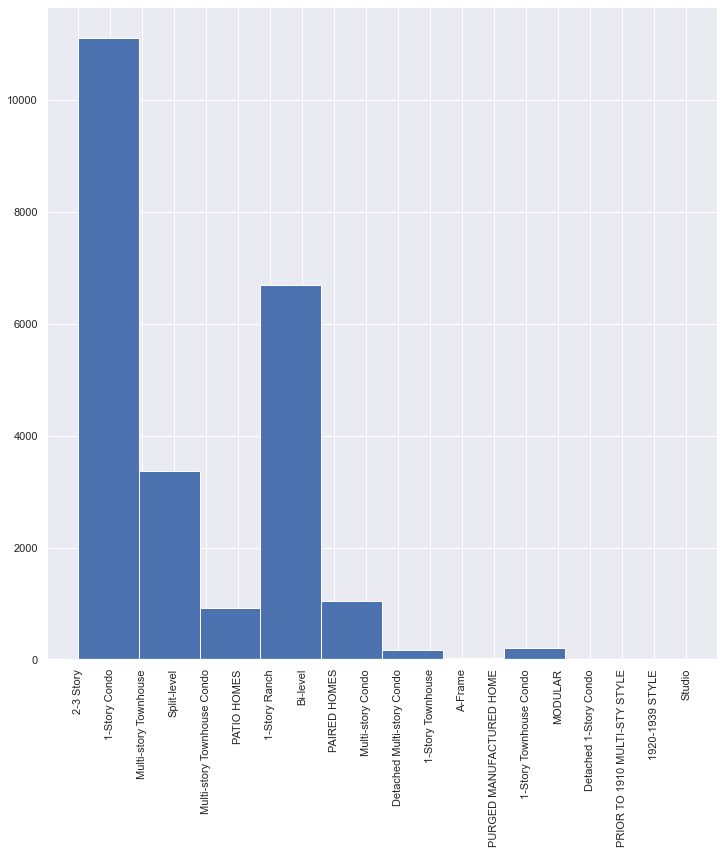

In [409]:
plt.hist(one_hot['BLDG1_DESIGN'])
plt.xticks(rotation=90)
plt.show()

Since that's not too easy to digest, let's just pull the counts.

In [410]:
print(len(one_hot))
one_hot['BLDG1_DESIGN'].value_counts()

23568


2-3 Story                        8878
1-Story Ranch                    6094
1-Story Condo                    2232
Multi-story Townhouse            1933
Split-level                      1440
Multi-story Condo                 812
Multi-story Townhouse Condo       775
Bi-level                          597
PAIRED HOMES                      229
1-Story Townhouse Condo           174
PATIO HOMES                       152
1-Story Townhouse                 146
Detached Multi-story Condo         31
A-Frame                            28
MODULAR                            24
Detached 1-Story Condo             11
PURGED MANUFACTURED HOME            6
PRIOR TO 1910 MULTI-STY STYLE       4
1920-1939 STYLE                     1
Studio                              1
Name: BLDG1_DESIGN, dtype: int64

There is a possibility of outliers in the "BLDG1_DESIGN" column due to the fact that there are some instances where there are only of 1 count each. Ultimately, it was decided to remove all the category values less than 100 counts to better separate the instances for the train/test splitting. The removal of such instances is miniscule since we still have 99% of the entire data remaining as these small instances constitute less than 0.5% of the total data set..

In [411]:
# Remove filter frequency to >100 counts.
count = one_hot['BLDG1_DESIGN'].value_counts()
one_hot = one_hot.loc[one_hot['BLDG1_DESIGN'].isin(count.index[count > 100])]
one_hot["BLDG1_DESIGN"].value_counts()

2-3 Story                      8878
1-Story Ranch                  6094
1-Story Condo                  2232
Multi-story Townhouse          1933
Split-level                    1440
Multi-story Condo               812
Multi-story Townhouse Condo     775
Bi-level                        597
PAIRED HOMES                    229
1-Story Townhouse Condo         174
PATIO HOMES                     152
1-Story Townhouse               146
Name: BLDG1_DESIGN, dtype: int64

Now that we've dropped some of the less frequent building designs, let's merge the remaining into similar categories: SFR (Single Family Residence), SFR Attached, and Condo for a better representation of each categorical building design types. This is also useful for creating general building design classes for classfication modeling.

In [412]:
# Replace each building design to a designated class category.
one_hot = one_hot.replace(['2-3 Story', '1-Story Ranch', 'Split-level', 'Bi-level'],
                        ['SFR', 'SFR', 'SFR', 'SFR'])
one_hot = one_hot.replace(['Multi-story Townhouse', 'PAIRED HOMES', 'PATIO HOMES', '1-Story Townhouse'],
                        ['SFR Attached', 'SFR Attached', 'SFR Attached', 'SFR Attached'])
one_hot = one_hot.replace(['1-Story Condo', 'Multi-story Condo', 'Multi-story Townhouse Condo', '1-Story Townhouse Condo'],
                        ['Condo', 'Condo', 'Condo', 'Condo'])
print(one_hot['BLDG1_DESIGN'].value_counts())
print()
print(len(one_hot))

SFR             17009
Condo            3993
SFR Attached     2460
Name: BLDG1_DESIGN, dtype: int64

23462


Alright, we're finished cleaning up the building design, let's move on to some size parameters, bedroom and bathroom size.

## BEDROOMS and TOTAL_BATHS

In [413]:
# Preview the counts of each instances.
print(one_hot['BEDROOMS'].value_counts())
print(one_hot['TOTAL_BATHS'].value_counts())
print()
print("Total Instances Count: ", len(one_hot))

3     8826
4     5884
2     4968
5     2135
1     1040
6      497
7       40
0       34
8       22
9        7
10       5
27       2
13       1
12       1
Name: BEDROOMS, dtype: int64
3     7826
2     7160
4     4170
1     2894
5      982
6      240
7       71
0       64
8       37
9       12
10       3
14       2
11       1
Name: TOTAL_BATHS, dtype: int64

Total Instances Count:  23462


We still have instances of 0 bedroom homes despite already dropping studios. These are likely to be erroneous records, so we drop them as well.

We should also remove instances of 0 bathrooms, because homes require bathrooms to be classified as residential homes.

Additionally, to avoid high variation in the dataset, we want to remove all instances less than a count of 100 as the standard approach.

In [414]:
# Remove instances of 0 rooms.
remove_bed0 = one_hot['BEDROOMS'] == 0
one_hot = one_hot.drop(one_hot.index[remove_bed0])
remove_bath0 = one_hot['TOTAL_BATHS'] == 0
one_hot = one_hot.drop(one_hot.index[remove_bath0])

# Remove instances <100 counts.
remove_bed6 = one_hot['BEDROOMS'] > 6 
one_hot = one_hot.drop(one_hot.index[remove_bed6])
remove_bath6 = one_hot['TOTAL_BATHS'] > 6 
one_hot = one_hot.drop(one_hot.index[remove_bath6])

# Preview the results.
print(one_hot['BEDROOMS'].value_counts())
print(one_hot['TOTAL_BATHS'].value_counts())
print()
print("Total Instances Count: ", len(one_hot))

3    8824
4    5873
2    4959
5    2082
1    1009
6     454
Name: BEDROOMS, dtype: int64
3    7820
2    7160
4    4148
1    2882
5     962
6     229
Name: TOTAL_BATHS, dtype: int64

Total Instances Count:  23201


## ABOVE_GROUND_SQFT
We've finished cleaning by the size parameters, let's move on to the square footage.

<AxesSubplot:>

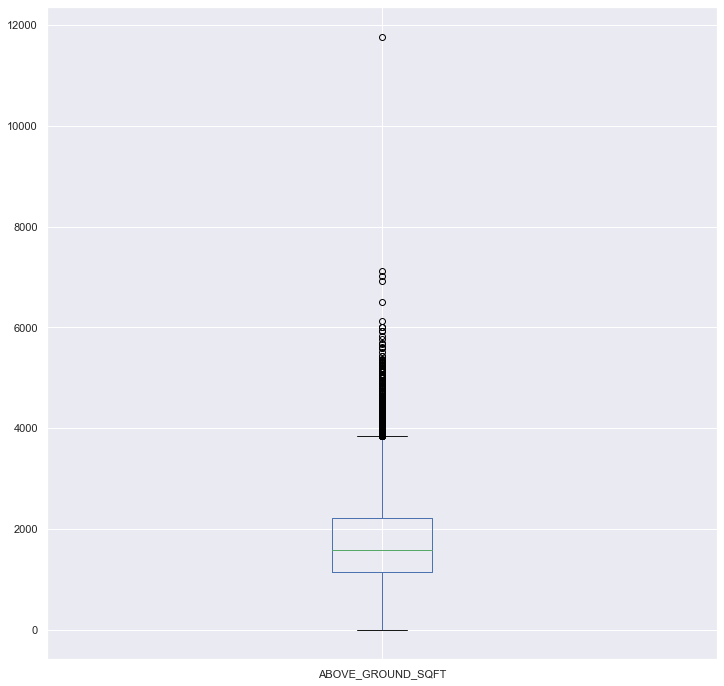

In [415]:
one_hot['ABOVE_GROUND_SQFT'].plot(kind='box')

From this box plot we can see that there are several outliers, and also some square footage which may be erroneous as there are data points at and near 0.

Let's remove outliers and potentially erroneous entries that may not have been caught in the initial cleaning.

In [416]:
print(one_hot['ABOVE_GROUND_SQFT'].sort_values().head(25))
print(one_hot['ABOVE_GROUND_SQFT'].sort_values().tail(25))

7363       1
6393       1
22179    278
10253    278
23483    300
23487    300
23485    306
15546    308
7486     310
2245     320
6673     324
2642     330
8397     330
5328     345
14694    346
7707     360
10914    360
14340    361
14524    363
10102    378
8744     378
19749    378
11583    380
864      384
19977    385
Name: ABOVE_GROUND_SQFT, dtype: int64
8712      5340
5179      5343
18031     5357
13450     5359
12606     5367
11632     5435
10940     5439
5776      5510
16935     5584
15701     5590
15307     5611
7106      5661
16900     5691
10965     5767
16324     5824
12120     5918
9227      5926
7642      5998
8120      6011
14421     6116
5105      6504
9336      6919
18533     7009
4320      7114
10578    11768
Name: ABOVE_GROUND_SQFT, dtype: int64


In [417]:
remove_abovesqft1 = one_hot['ABOVE_GROUND_SQFT'] < 400 
one_hot = one_hot.drop(one_hot.index[remove_abovesqft1])

remove_abovesqft2 = one_hot['ABOVE_GROUND_SQFT'] > 8000
one_hot = one_hot.drop(one_hot.index[remove_abovesqft2])

print("Total Instances Count: ", len(one_hot))

Total Instances Count:  23172


## TOTAL_SQFT

19227    400
16103    400
7390     400
6588     401
20786    405
7734     407
842      410
5000     410
21484    411
12177    412
925      412
10978    416
9493     416
21176    416
17552    418
15316    418
21113    418
23099    420
210      421
16642    423
12962    423
11145    425
22452    425
4807     427
15481    427
Name: TOTAL_SQFT, dtype: int64
9983     11430
12940    11466
4461     11515
6641     11543
2136     11687
17789    11687
12456    11860
14994    12871
5577     13089
16732    13270
9049     13292
23464    13539
20340    14443
14600    15008
7306     15239
22395    16812
16442    16815
3237     16932
9479     16958
9692     17220
1730     24064
12658    24975
15744    25498
17993    27438
1937     35105
Name: TOTAL_SQFT, dtype: int64


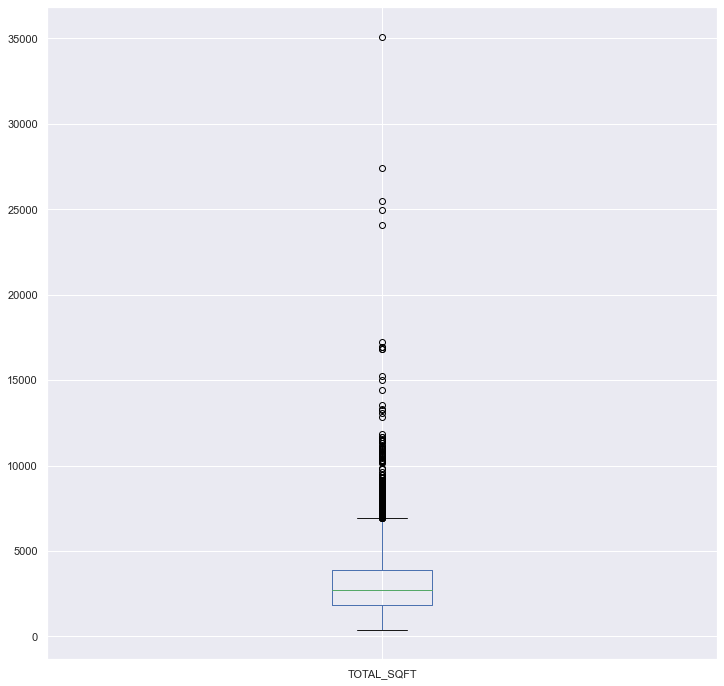

In [418]:
one_hot['TOTAL_SQFT'].plot(kind='box')
print(one_hot['TOTAL_SQFT'].sort_values().head(25))
print(one_hot['TOTAL_SQFT'].sort_values().tail(25))

## SALE_PRICE

12194     176
2757      250
11608     500
12387     921
10769    1000
11436    1000
13540    1000
17909    1051
12195    1282
22397    1380
7067     1500
925      1600
10779    1800
542      2000
18558    2454
11643    2815
734      3180
5268     4000
822      5000
1887     5700
17271    6000
2734     7800
13239    7843
11959    8500
4699     9000
Name: SALE_PRICE, dtype: int64
22811    4550000
22954    4600000
15517    4675000
13542    4750000
4117     4795000
16415    4800000
17470    5000000
16806    5000000
12940    5005800
12788    5200000
9479     5200000
22665    5286000
7642     5475000
20560    5500000
17549    5700000
5567     6076200
5568     6076200
5569     6076200
5566     6076200
4461     6250000
20588    7200000
21617    7200000
9712     7400000
5105     7755300
22275    9780000
Name: SALE_PRICE, dtype: int64


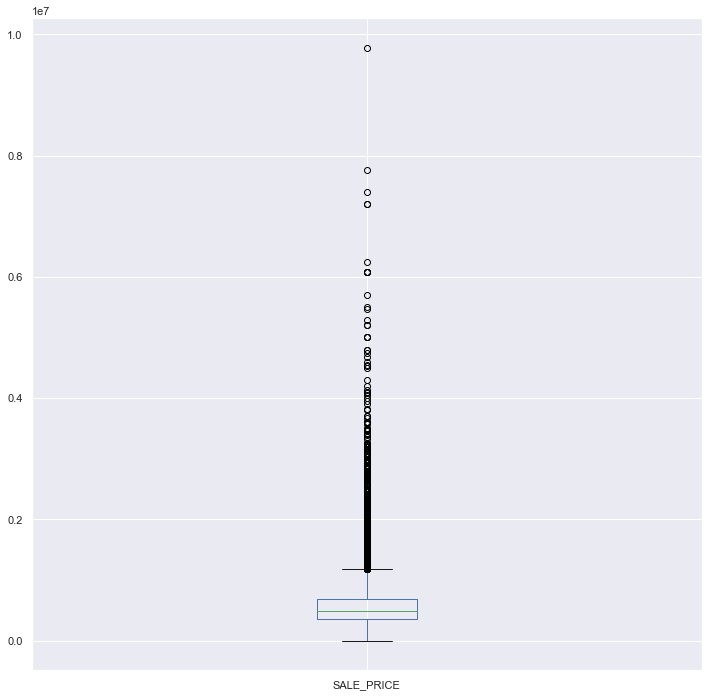

In [419]:
# let's explore the sale price data next
one_hot['SALE_PRICE'].plot(kind='box')
print(one_hot['SALE_PRICE'].sort_values().head(25))
print(one_hot['SALE_PRICE'].sort_values().tail(25))

In [420]:
# Most prices appear to be below 2 million but some are very close to 0, let's drop some of that data
remove_price2000000 = one_hot['SALE_PRICE'] > 2000000
one_hot = one_hot.drop(one_hot.index[remove_price2000000])

remove_price80000 = one_hot['SALE_PRICE'] < 80000
one_hot = one_hot.drop(one_hot.index[remove_price80000])

print("Total Instances Count: ", len(one_hot))

Total Instances Count:  22735


In [421]:
print(one_hot['SALE_PRICE'].sort_values().head(25))
print(one_hot['SALE_PRICE'].sort_values().tail(25))

13496    80000
11151    80000
11102    80000
14692    80000
14623    80000
1701     80500
2247     83000
153      85000
17163    85000
14752    85000
17583    85000
17582    85000
8954     85650
6473     88500
10150    90000
973      90000
12207    90000
12070    90000
2644     92100
17560    92500
6834     93000
534      94000
12257    94900
1280     95000
2138     95000
Name: SALE_PRICE, dtype: int64
8639     1967500
17336    1967800
3071     1970000
2593     1975000
8660     1975000
13596    1975000
5546     1975000
14568    1985000
8772     1989000
333      1992300
20419    1995000
18019    1995000
9191     1995000
14852    1999999
12867    2000000
3237     2000000
16285    2000000
15398    2000000
18       2000000
23198    2000000
14421    2000000
20048    2000000
13887    2000000
14080    2000000
12921    2000000
Name: SALE_PRICE, dtype: int64


## BLDG_VALUE

4691     0
22294    0
15551    0
15560    0
16846    0
21172    0
22269    0
10962    0
22265    0
10964    0
15588    0
10997    0
15590    0
10936    0
22250    0
22243    0
16805    0
11020    0
15609    0
11021    0
11029    0
11030    0
22215    0
16802    0
22207    0
Name: BLDG_VALUE, dtype: int64
18847    1530000
8712     1560100
7106     1588700
12120    1589300
5764     1595800
8985     1610000
22107    1613700
13276    1623400
20383    1629600
21842    1661400
10965    1700000
23198    1733000
19346    1739600
6071     1746900
5722     1771000
17368    1790800
3435     1792700
19075    1793500
4365     1795500
10283    1854500
16324    1855900
20853    1861200
15307    1913200
17971    1969600
3237     1980800
Name: BLDG_VALUE, dtype: int64


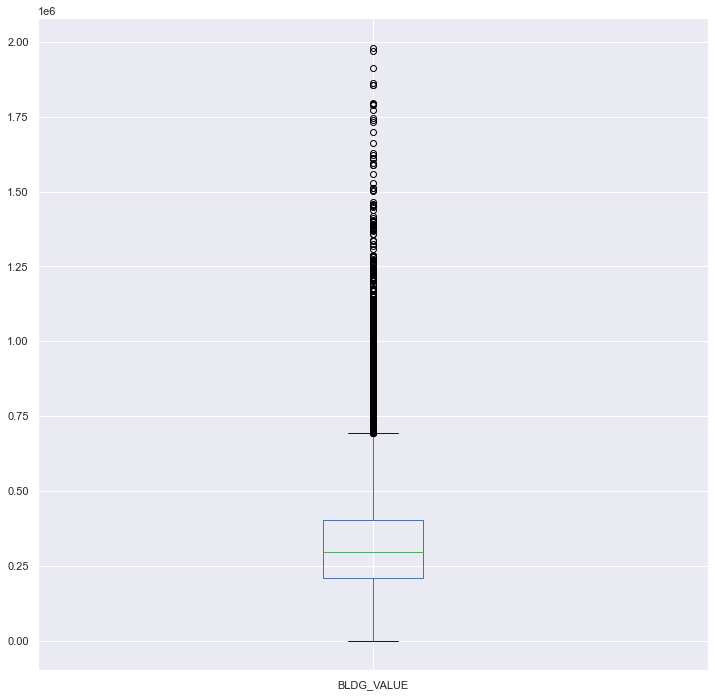

In [422]:
# Let's explore the building values next
one_hot['BLDG_VALUE'].plot(kind='box')
print(one_hot['BLDG_VALUE'].sort_values().head(25))
print(one_hot['BLDG_VALUE'].sort_values().tail(25))

There are some building values of 0. This does make sense for condos as the owner of a condo (depending on the HOA) may only own the inside of their unit. Let's check if these 0 values come from condos or single family homes.

In [423]:
zerobldg_index = one_hot['BLDG_VALUE'] == 0
#one_hot['BLDG1_DESIGN'].value_counts([zerobldg_index])
bldg_design = one_hot['BLDG1_DESIGN']
print(bldg_design[zerobldg_index])

4691              SFR
4921              SFR
5761              SFR
6144     SFR Attached
6145     SFR Attached
             ...     
23532    SFR Attached
23556             SFR
23557    SFR Attached
23558    SFR Attached
23559    SFR Attached
Name: BLDG1_DESIGN, Length: 946, dtype: object


It seems like there are SFR and SFR Attached class instances of building values at 0. Those instances should be removed as they do not make any sense.

In [424]:
# Drop building value of 0 for all buildings that are not condos.
remove_bldg0 = []
counter = 0
for index, row in one_hot.iterrows():
    if row['BLDG1_DESIGN'] != 'Condo':
        if row['BLDG_VALUE'] == 0:
            remove_bldg0.append(counter)
    counter = counter + 1
        
one_hot = one_hot.drop(one_hot.index[remove_bldg0])

bldg_design = one_hot['BLDG1_DESIGN']
zerobldg_index = one_hot['BLDG_VALUE'] == 0
print(bldg_design[zerobldg_index])

8758     Condo
10107    Condo
10108    Condo
11336    Condo
11457    Condo
11572    Condo
16983    Condo
17056    Condo
17102    Condo
17139    Condo
17397    Condo
17473    Condo
21638    Condo
21997    Condo
22021    Condo
22042    Condo
22340    Condo
22341    Condo
22385    Condo
22394    Condo
22437    Condo
22631    Condo
22788    Condo
22873    Condo
22927    Condo
22969    Condo
23162    Condo
23219    Condo
Name: BLDG1_DESIGN, dtype: object


In [425]:
# Most of the building values in the data appear to be under 800,000
remove_bldg800000 = one_hot['BLDG_VALUE'] > 800000
one_hot = one_hot.drop(one_hot.index[remove_bldg800000])

print("Total Instances Count: ", len(one_hot))

Total Instances Count:  21249


## LAND_VALUE

9836     0
22011    0
6469     0
20459    0
16934    0
16936    0
14269    0
14268    0
6466     0
6464     0
6461     0
2949     0
2950     0
17962    0
12037    0
6451     0
6446     0
14262    0
2956     0
6442     0
6441     0
14257    0
6440     0
2962     0
20470    0
Name: LAND_VALUE, dtype: int64
21924    1171000
21843    1177000
8316     1190000
19482    1192000
18674    1193000
18675    1193000
20168    1198000
681      1200000
1452     1200000
7293     1243000
4668     1246000
23540    1257000
14943    1260000
10252    1263000
22346    1286000
20417    1337000
22778    1359000
13727    1363000
1657     1367000
18909    1441000
1020     1508000
21616    1551000
22077    1591000
5546     1600000
18       1868000
Name: LAND_VALUE, dtype: int64


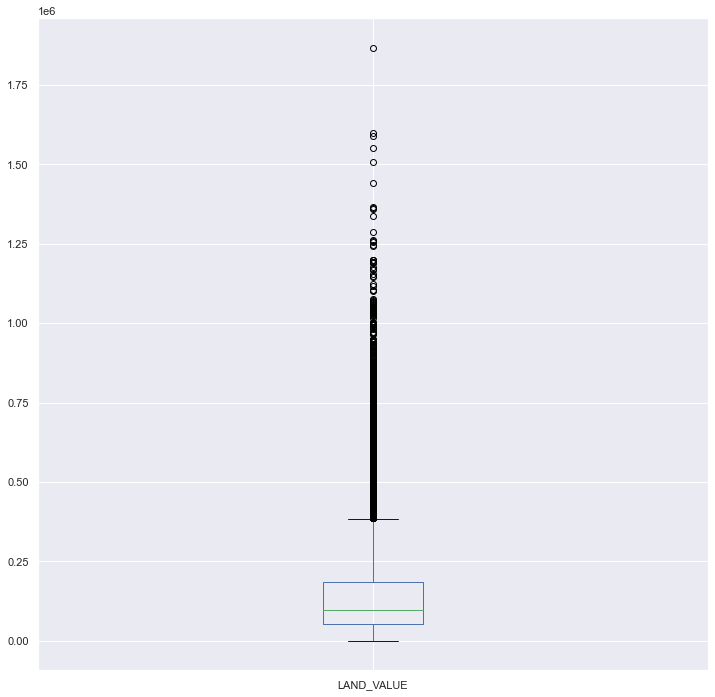

In [426]:
# Let's explore the land values next
one_hot['LAND_VALUE'].plot(kind='box')
print(one_hot['LAND_VALUE'].sort_values().head(25))
print(one_hot['LAND_VALUE'].sort_values().tail(25))

In [427]:
# Most of the land values in the data appear to be under 1,000,000
remove_land1000000 = one_hot['LAND_VALUE'] > 1000000
one_hot = one_hot.drop(one_hot.index[remove_land1000000])

print("Total Instances Count: ", len(one_hot))

Total Instances Count:  21188


There are some land values of 0. This does make sense for condos as the owner of a condo (depending on the HOA) may only own the inside of their unit.

In [428]:
# Let's further explore the land values 
zeroland_index = one_hot['LAND_VALUE'] == 0
#one_hot['BLDG1_DESIGN'].value_counts([zerobldg_index])
bldg_design = one_hot['BLDG1_DESIGN']
print(bldg_design[zeroland_index])

2        Condo
3        Condo
4        Condo
11       Condo
17       Condo
         ...  
23514    Condo
23525    Condo
23543    Condo
23544    Condo
23566    Condo
Name: BLDG1_DESIGN, Length: 3724, dtype: object


In [429]:
# Drop land value of 0 for all buildings that are not condos.
remove_land = []
counter = 0
for index, row in one_hot.iterrows():
    if row['BLDG1_DESIGN'] != 'Condo':
        if row['LAND_VALUE'] == 0:
            remove_land.append(counter)
    counter = counter + 1
        
one_hot = one_hot.drop(one_hot.index[remove_land])

bldg_design = one_hot['BLDG1_DESIGN']
zeroland_index = one_hot['LAND_VALUE'] == 0
print(bldg_design[zeroland_index])

2        Condo
3        Condo
4        Condo
11       Condo
17       Condo
         ...  
23514    Condo
23525    Condo
23543    Condo
23544    Condo
23566    Condo
Name: BLDG1_DESIGN, Length: 3709, dtype: object


In [430]:
print("Total Instances Count: ", len(one_hot))

Total Instances Count:  21173


# One-Hot Encoding

## Removing ZIPCODE Categorical Feature

Previous model trials were performed which included the ZIPCODE feature as a predictor of SALE_PRICE. However, these models had high variance that distorted the model performances even after multiple retests. This is due to the high dimensionality of the ZIPCODE feature since there are 176 unique values which would have generated a large number of columns within a one-hot encoded dataset. Still, all these zip code values represent the state of Colorado anyway, so in terms of geographical relevance, the ZIPCODE feature can ultimately be removed.

In [431]:
# Covert the pythonic object datatype
# into category datatype for faster performance.
one_hot["BLDG1_DESIGN"] = one_hot["BLDG1_DESIGN"].astype("object")
#one_hot["ZIPCODE"] = one_hot["ZIPCODE"].astype("category")

print(one_hot.dtypes)

BLDG1_DESIGN         object
BEDROOMS              int64
ABOVE_GROUND_SQFT     int64
SALE_PRICE            int64
ZIPCODE              object
LAND_VALUE            int64
BLDG_VALUE            int64
TOTAL_SQFT            int64
TOTAL_BATHS           int64
HOUSE_AGE_YRS         int64
dtype: object


In [432]:
one_hot = pd.get_dummies(one_hot,
                        columns=['BLDG1_DESIGN'],
                        prefix = ['DSN'])

one_hot.drop(['ZIPCODE'], axis=1, inplace=True)
one_hot.head()

BEDROOMS  ABOVE_GROUND_SQFT  SALE_PRICE  LAND_VALUE  BLDG_VALUE  \
0         3               2940      600000      498800      256400   
2         1                571      235000           0      217400   
3         1                570      162500           0      212300   
4         3               1214      340500           0      372200   
5         3               1870      386500      122000      353700   

   TOTAL_SQFT  TOTAL_BATHS  HOUSE_AGE_YRS  DSN_Condo  DSN_SFR  \
0        3262            3              4          0        1   
2         571            1             31          1        0   
3         570            1             31          1        0   
4        1414            2             35          1        0   
5        3194            4             43          0        0   

   DSN_SFR Attached  
0                 0  
2                 0  
3                 0  
4                 0  
5                 1

array([[<AxesSubplot:title={'center':'BEDROOMS'}>,
        <AxesSubplot:title={'center':'ABOVE_GROUND_SQFT'}>,
        <AxesSubplot:title={'center':'SALE_PRICE'}>],
       [<AxesSubplot:title={'center':'LAND_VALUE'}>,
        <AxesSubplot:title={'center':'BLDG_VALUE'}>,
        <AxesSubplot:title={'center':'TOTAL_SQFT'}>],
       [<AxesSubplot:title={'center':'TOTAL_BATHS'}>,
        <AxesSubplot:title={'center':'HOUSE_AGE_YRS'}>,
        <AxesSubplot:title={'center':'DSN_Condo'}>],
       [<AxesSubplot:title={'center':'DSN_SFR'}>,
        <AxesSubplot:title={'center':'DSN_SFR Attached'}>,
        <AxesSubplot:>]], dtype=object)

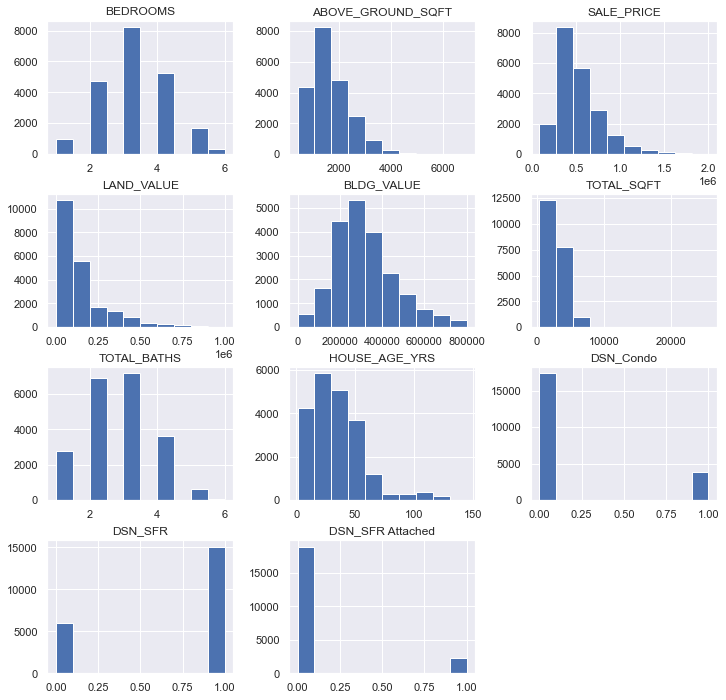

In [433]:
# Preview plot the dataset.
one_hot.hist()

# Data Modeling
Let's perform some initial performance tests to see how good is the linear regression model with the dataset we currently have. We can compare this linear regression model with a dummy regression model as the baseline.

In [434]:
# Import dependencies.
from sklearn.dummy import DummyRegressor
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import KFold
from sklearn import metrics
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score

## Train/Test Split with 10-Fold Cross Validation Method
We will split our training sets and test sets by using a 10-fold cross validation method.

In [435]:
# Set up the x_features and y_target variables.
X = one_hot.drop(['SALE_PRICE'] , axis=1)
Y = one_hot['SALE_PRICE']
print(X.shape, Y.shape)

# Set up a 10-fold cross validation for the train/test split.
kf = KFold(n_splits = 10)
kf.get_n_splits(X)
X.head()

(21173, 10) (21173,)


BEDROOMS  ABOVE_GROUND_SQFT  LAND_VALUE  BLDG_VALUE  TOTAL_SQFT  \
0         3               2940      498800      256400        3262   
2         1                571           0      217400         571   
3         1                570           0      212300         570   
4         3               1214           0      372200        1414   
5         3               1870      122000      353700        3194   

   TOTAL_BATHS  HOUSE_AGE_YRS  DSN_Condo  DSN_SFR  DSN_SFR Attached  
0            3              4          0        1                 0  
2            1             31          1        0                 0  
3            1             31          1        0                 0  
4            2             35          1        0                 0  
5            4             43          0        0                 1

In [436]:
#starting dummy regression baseline 
dummy_regr = DummyRegressor(strategy="mean")

#linear regression
linreg10f = LinearRegression()

#create 10 folds
baseline_scores={"r2":[],"mse":[],"rmse":[]}
linreg_scores={"r2":[],"mse":[],"rmse":[]}

for train_index, test_index in kf.split(X):
    print("TRAIN:", train_index, "TEST:", test_index, '\n')
    X_train, X_test = X.iloc[train_index], X.iloc[test_index]
    Y_train, Y_test = Y.iloc[train_index], Y.iloc[test_index]
    
    dummy_regr.fit(X_train, Y_train)
    linreg10f.fit(X_train, Y_train)
    
    dummy_pred = dummy_regr.predict(X_test)
    y_pred_linreg10f = linreg10f.predict(X_test)
    
    msedummy = mean_squared_error(Y_test, dummy_pred)
    mse = mean_squared_error(Y_test, y_pred_linreg10f)
    
    print('R^2 Score Dummy: ', dummy_regr.score(X_train, Y_train))
    print('Mean Square Error Dummy: ', msedummy)
    print('Root Mean Square Error Dummy: ', np.sqrt(msedummy), '\n')
    
    print('R^2 Score: ', linreg10f.score(X_train, Y_train))
    print('Mean Square Error: ', mse)
    print('Root Mean Square Error: ', np.sqrt(mse), '\n \n')
    
    baseline_scores["r2"].append(dummy_regr.score(X_train, Y_train))
    baseline_scores["mse"].append(msedummy)
    baseline_scores["rmse"].append(np.sqrt(msedummy))
    
    linreg_scores["r2"].append(linreg10f.score(X_train, Y_train))
    linreg_scores["mse"].append(mse)
    linreg_scores["rmse"].append(np.sqrt(mse))

TRAIN: [ 2118  2119  2120 ... 21170 21171 21172] TEST: [   0    1    2 ... 2115 2116 2117] 

R^2 Score Dummy:  0.0
Mean Square Error Dummy:  63660932733.49122
Root Mean Square Error Dummy:  252311.1823393708 

R^2 Score:  0.7660139918173555
Mean Square Error:  15414367096.601065
Root Mean Square Error:  124154.60964700853 
 

TRAIN: [    0     1     2 ... 21170 21171 21172] TEST: [2118 2119 2120 ... 4233 4234 4235] 

R^2 Score Dummy:  0.0
Mean Square Error Dummy:  59510957081.195
Root Mean Square Error Dummy:  243948.67714581892 

R^2 Score:  0.7632319335438661
Mean Square Error:  12362804889.248026
Root Mean Square Error:  111188.15084912612 
 

TRAIN: [    0     1     2 ... 21170 21171 21172] TEST: [4236 4237 4238 ... 6351 6352 6353] 

R^2 Score Dummy:  0.0
Mean Square Error Dummy:  54549515575.221664
Root Mean Square Error Dummy:  233558.3772319496 

R^2 Score:  0.7633222640950099
Mean Square Error:  11139729512.470285
Root Mean Square Error:  105544.91703758303 
 

TRAIN: [    0   

In [437]:
pd.DataFrame(baseline_scores)

r2           mse           rmse
0  0.0  6.366093e+10  252311.182339
1  0.0  5.951096e+10  243948.677146
2  0.0  5.454952e+10  233558.377232
3  0.0  6.812550e+10  261008.623023
4  0.0  7.247920e+10  269219.614385
5  0.0  6.654417e+10  257961.569279
6  0.0  8.250888e+10  287243.584108
7  0.0  7.704432e+10  277568.594955
8  0.0  7.698285e+10  277457.826269
9  0.0  6.856649e+10  261852.044732

In [438]:
baseline_metrics = pd.DataFrame(baseline_scores)
baseline_metrics = baseline_metrics.mean(axis=0)
baseline_metrics = pd.DataFrame(baseline_metrics,columns=["Baseline Linear Regression"])
baseline_metrics = baseline_metrics.transpose()
baseline_metrics

r2           mse           rmse
Baseline Linear Regression  0.0  6.899728e+10  262213.009347

In [439]:
pd.DataFrame(linreg_scores)

r2           mse           rmse
0  0.766014  1.541437e+10  124154.609647
1  0.763232  1.236280e+10  111188.150849
2  0.763322  1.113973e+10  105544.917038
3  0.761201  1.293469e+10  113730.764652
4  0.762798  1.493650e+10  122214.982291
5  0.766763  1.603619e+10  126634.089286
6  0.768299  2.098162e+10  144850.350172
7  0.775465  2.385505e+10  154450.801944
8  0.770703  2.115074e+10  145432.947432
9  0.766198  1.611051e+10  126927.184508

In [440]:
linreg_metrics = pd.DataFrame(linreg_scores)
linreg_metrics = linreg_metrics.mean(axis=0)
linreg_metrics = pd.DataFrame(linreg_metrics,columns=["Linear Regression"])
linreg_metrics = linreg_metrics.transpose()
linreg_metrics

r2           mse           rmse
Linear Regression  0.766399  1.649222e+10  127512.879782

## Data Normalization with MinMax Scaler
Let's normalize the values and see how it looks. MinMax Scaler is a normalization technique used to convert all the feature's values between 0 and 1 to make sure that each feature have equal weights when training and testing them in the algorithms.

In [441]:
# Normalize the data with MinMax Scaler.
from sklearn import preprocessing
min_max_scaler = preprocessing.MinMaxScaler()
normalized = min_max_scaler.fit_transform(one_hot)

cols = ['BEDROOMS','ABOVE_GROUND_SQFT', 'SALE_PRICE','LAND_VALUE',
        'BLDG_VALUE','TOTAL_SQFT','TOTAL_BATHS','HOUSE_AGE_YRS',
        'DSN_Condo','DSN_SFR','DSN_SFR Attached']

one_hot_normalized = pd.DataFrame(normalized, index = None, columns = cols)
one_hot_normalized.head()

BEDROOMS  ABOVE_GROUND_SQFT  SALE_PRICE  LAND_VALUE  BLDG_VALUE  \
0       0.4           0.389630    0.270833      0.4988    0.320500   
1       0.0           0.026231    0.080729      0.0000    0.271750   
2       0.0           0.026078    0.042969      0.0000    0.265375   
3       0.4           0.124866    0.135677      0.0000    0.465250   
4       0.4           0.225495    0.159635      0.1220    0.442125   

   TOTAL_SQFT  TOTAL_BATHS  HOUSE_AGE_YRS  DSN_Condo  DSN_SFR  \
0    0.114033          0.4       0.020833        0.0      1.0   
1    0.006813          0.0       0.208333        1.0      0.0   
2    0.006773          0.0       0.208333        1.0      0.0   
3    0.040402          0.2       0.236111        1.0      0.0   
4    0.111324          0.6       0.291667        0.0      0.0   

   DSN_SFR Attached  
0               0.0  
1               0.0  
2               0.0  
3               0.0  
4               1.0

array([[<AxesSubplot:title={'center':'BEDROOMS'}>,
        <AxesSubplot:title={'center':'ABOVE_GROUND_SQFT'}>,
        <AxesSubplot:title={'center':'SALE_PRICE'}>],
       [<AxesSubplot:title={'center':'LAND_VALUE'}>,
        <AxesSubplot:title={'center':'BLDG_VALUE'}>,
        <AxesSubplot:title={'center':'TOTAL_SQFT'}>],
       [<AxesSubplot:title={'center':'TOTAL_BATHS'}>,
        <AxesSubplot:title={'center':'HOUSE_AGE_YRS'}>,
        <AxesSubplot:title={'center':'DSN_Condo'}>],
       [<AxesSubplot:title={'center':'DSN_SFR'}>,
        <AxesSubplot:title={'center':'DSN_SFR Attached'}>,
        <AxesSubplot:>]], dtype=object)

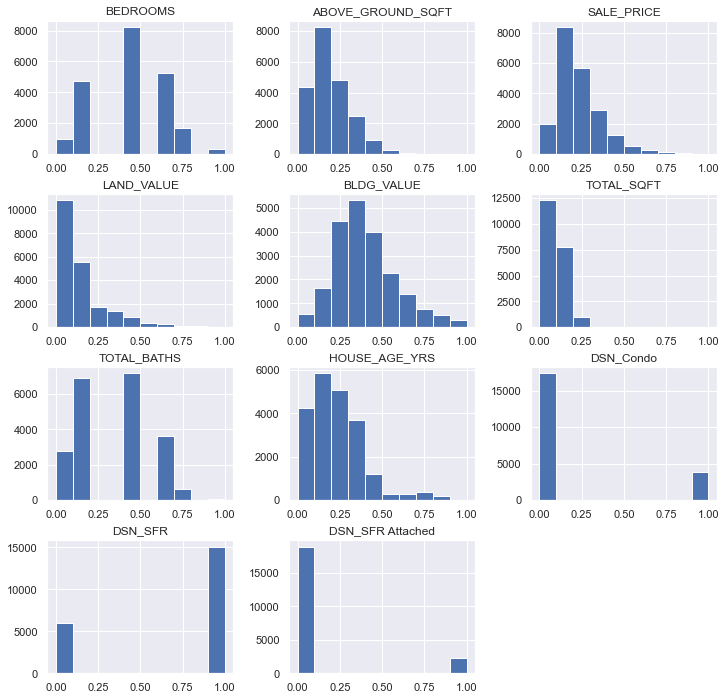

In [442]:
one_hot_normalized.hist()

In [443]:
# Models using normalized data
# Set up the x_features and y_target variables.
X2 = one_hot_normalized.drop(['SALE_PRICE'] , axis=1)
Y2 = one_hot_normalized['SALE_PRICE']
print(X2.shape, Y2.shape)

# Set up a 10-fold cross validation for the train/test split.
kf2 = KFold(n_splits = 10)
kf2.get_n_splits(X2)
X2.head()

(21173, 10) (21173,)


BEDROOMS  ABOVE_GROUND_SQFT  LAND_VALUE  BLDG_VALUE  TOTAL_SQFT  \
0       0.4           0.389630      0.4988    0.320500    0.114033   
1       0.0           0.026231      0.0000    0.271750    0.006813   
2       0.0           0.026078      0.0000    0.265375    0.006773   
3       0.4           0.124866      0.0000    0.465250    0.040402   
4       0.4           0.225495      0.1220    0.442125    0.111324   

   TOTAL_BATHS  HOUSE_AGE_YRS  DSN_Condo  DSN_SFR  DSN_SFR Attached  
0          0.4       0.020833        0.0      1.0               0.0  
1          0.0       0.208333        1.0      0.0               0.0  
2          0.0       0.208333        1.0      0.0               0.0  
3          0.2       0.236111        1.0      0.0               0.0  
4          0.6       0.291667        0.0      0.0               1.0

In [444]:
#starting dummy regression baseline 
dummy_regr2 = DummyRegressor(strategy="mean")

#linear regression
linreg10f2 = LinearRegression()

#create 10 folds
baseline2_scores={"r2":[],"mse":[],"rmse":[]}
linreg2_scores={"r2":[],"mse":[],"rmse":[]}

for train_index, test_index in kf2.split(X2):
    print("TRAIN:", train_index, "TEST:", test_index, '\n')
    X2_train, X2_test = X2.iloc[train_index], X2.iloc[test_index]
    Y2_train, Y2_test = Y2.iloc[train_index], Y2.iloc[test_index]
    
    dummy_regr2.fit(X2_train, Y2_train)
    linreg10f2.fit(X2_train, Y2_train)
    
    dummy_pred2 = dummy_regr2.predict(X2_test)
    y2_pred_linreg10f2 = linreg10f2.predict(X2_test)
    
    msedummy2 = mean_squared_error(Y2_test, dummy_pred2)
    mse2 = mean_squared_error(Y2_test, y2_pred_linreg10f2)
    
    print('R^2 Score Dummy: ', dummy_regr2.score(X2_train, Y2_train))
    print('Mean Square Error Dummy: ', msedummy2)
    print('Root Mean Square Error Dummy: ', np.sqrt(msedummy2), '\n')
    
    print('R^2 Score: ', linreg10f2.score(X2_train, Y2_train))
    print('Mean Square Error: ', mse2)
    print('Root Mean Square Error: ', np.sqrt(mse2), '\n \n')
    
    baseline2_scores["r2"].append(dummy_regr.score(X2_train, Y2_train))
    baseline2_scores["mse"].append(msedummy2)
    baseline2_scores["rmse"].append(np.sqrt(msedummy2))
    
    linreg2_scores["r2"].append(linreg10f2.score(X2_train, Y2_train))
    linreg2_scores["mse"].append(mse2)
    linreg2_scores["rmse"].append(np.sqrt(mse2))

TRAIN: [ 2118  2119  2120 ... 21170 21171 21172] TEST: [   0    1    2 ... 2115 2116 2117] 

R^2 Score Dummy:  0.0
Mean Square Error Dummy:  0.01726913322848612
Root Mean Square Error Dummy:  0.13141207413508899 

R^2 Score:  0.7660128326632759
Mean Square Error:  0.0041814776159931205
Root Mean Square Error:  0.06466434578647742 
 

TRAIN: [    0     1     2 ... 21170 21171 21172] TEST: [2118 2119 2120 ... 4233 4234 4235] 

R^2 Score Dummy:  0.0
Mean Square Error Dummy:  0.016143380284612364
Root Mean Square Error Dummy:  0.12705660268011404 

R^2 Score:  0.7631445762886634
Mean Square Error:  0.0033411415724971145
Root Mean Square Error:  0.05780260869975606 
 

TRAIN: [    0     1     2 ... 21170 21171 21172] TEST: [4236 4237 4238 ... 6351 6352 6353] 

R^2 Score Dummy:  0.0
Mean Square Error Dummy:  0.01479750313997984
Root Mean Square Error Dummy:  0.12164498814164043 

R^2 Score:  0.7632286667069115
Mean Square Error:  0.0030084753343192173
Root Mean Square Error:  0.0548495700468

In [445]:
pd.DataFrame(baseline2_scores)

r2       mse      rmse
0 -1.505070e+13  0.017269  0.131412
1 -1.495298e+13  0.016143  0.127057
2 -1.483222e+13  0.014798  0.121645
3 -1.516552e+13  0.018480  0.135942
4 -1.527263e+13  0.019661  0.140219
5 -1.512644e+13  0.018051  0.134355
6 -1.552214e+13  0.022382  0.149606
7 -1.538507e+13  0.020900  0.144567
8 -1.537737e+13  0.020883  0.144509
9 -1.517579e+13  0.018600  0.136381

In [446]:
baseline2_metrics = pd.DataFrame(baseline2_scores)
baseline2_metrics = baseline2_metrics.mean(axis=0)
baseline2_metrics = pd.DataFrame(baseline2_metrics,columns=["Baseline Linear Regression"])
baseline2_metrics = baseline2_metrics.transpose()
baseline2_metrics

r2       mse      rmse
Baseline Linear Regression -1.518609e+13  0.018717  0.136569

In [447]:
pd.DataFrame(linreg2_scores)

r2       mse      rmse
0  0.766013  0.004181  0.064664
1  0.763145  0.003341  0.057803
2  0.763229  0.003008  0.054850
3  0.761118  0.003515  0.059284
4  0.762709  0.004053  0.063661
5  0.766688  0.004352  0.065969
6  0.768216  0.005704  0.075522
7  0.775385  0.006481  0.080506
8  0.770626  0.005754  0.075858
9  0.766131  0.004371  0.066114

In [448]:
linreg2_metrics = pd.DataFrame(linreg2_scores)
linreg2_metrics = linreg2_metrics.mean(axis=0)
linreg2_metrics = pd.DataFrame(linreg2_metrics,columns=["Linear Regression"])
linreg2_metrics = linreg2_metrics.transpose()
linreg2_metrics

r2       mse      rmse
Linear Regression  0.766326  0.004476  0.066423

As we can see, there is a huge improvement in the baseline and linear regression models after normalizing the data. We can further improve the data models by correcting any skewness and forcing a normal distribution of the data set.

Since these results look ok, let's save the data for future use.

In [449]:
# Saving onehot unnormalized and onehot normalized data.
one_hot_normalized.to_csv(filepath + "BoulderCleanedNormalized.csv",
                          index=False)

one_hot.to_csv(filepath + "BoulderCleaned.csv", index=False)

array([[<AxesSubplot:title={'center':'BEDROOMS'}>,
        <AxesSubplot:title={'center':'ABOVE_GROUND_SQFT'}>,
        <AxesSubplot:title={'center':'SALE_PRICE'}>],
       [<AxesSubplot:title={'center':'LAND_VALUE'}>,
        <AxesSubplot:title={'center':'BLDG_VALUE'}>,
        <AxesSubplot:title={'center':'TOTAL_SQFT'}>],
       [<AxesSubplot:title={'center':'TOTAL_BATHS'}>,
        <AxesSubplot:title={'center':'HOUSE_AGE_YRS'}>,
        <AxesSubplot:title={'center':'DSN_Condo'}>],
       [<AxesSubplot:title={'center':'DSN_SFR'}>,
        <AxesSubplot:title={'center':'DSN_SFR Attached'}>,
        <AxesSubplot:>]], dtype=object)

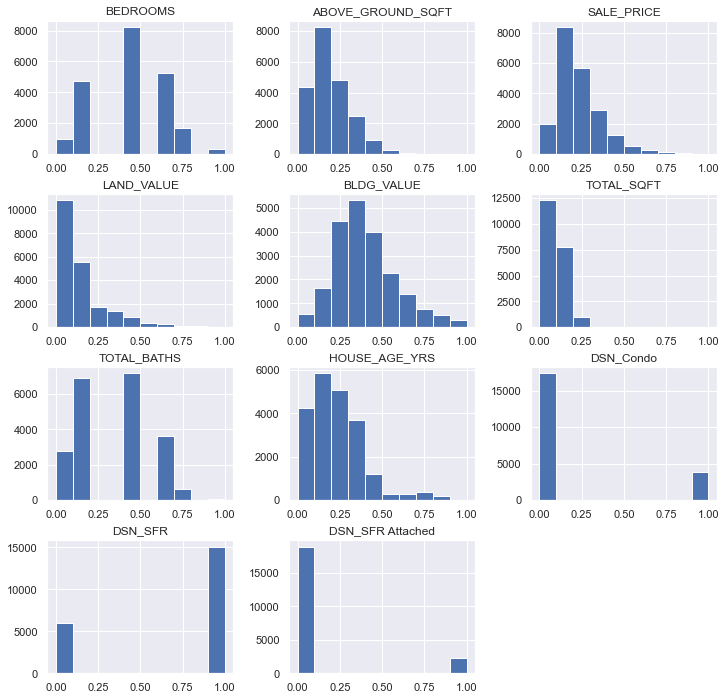

In [450]:
one_hot_normalized.hist()

Most of these features have a positive skew, we must obtain a more Gaussian distribution in order to test our advanced models.

We will perform a Yeo-Johnson PowerTransform in order to introduce a more Gaussian distribution as well as a 0 mean, unit variance 

## Data Normalization with PowerTransformer
Now that we have our cleaned data with each feature as numerical values, we can perform one more important procedure with normalization. PowerTranformation is one of the normalization methods that can provide many statistical benefits within the data by transformation mean values set to 0 with unit variances. This will generate the much desired gaussian distribution of the data and make each feature weighed similarly.

In [451]:
# Import dependencies.
from sklearn.preprocessing import PowerTransformer
pt = PowerTransformer(method='yeo-johnson')

In [452]:
onehot_pt = pt.fit_transform(one_hot_normalized)
cols = ['BEDROOMS','ABOVE_GROUND_SQFT','SALE_PRICE','LAND_VALUE',
        'BLDG_VALUE','TOTAL_SQFT','TOTAL_BATHS','HOUSE_AGE_YRS',
        'DSN_Condo','DSN_SFR','DSN_SFR Attached']
pt_one_hot_norm = pd.DataFrame(data=onehot_pt, columns=cols)
pt_one_hot_norm

BEDROOMS  ABOVE_GROUND_SQFT  SALE_PRICE  LAND_VALUE  BLDG_VALUE  \
0     -0.094334           1.546816    0.520233    1.797130   -0.353193   
1     -2.217038          -2.107088   -1.558825   -1.480614   -0.672679   
2     -2.217038          -2.109980   -2.202956   -1.480614   -0.716214   
3     -0.094334          -0.583096   -0.788651   -1.480614    0.474156   
4     -0.094334           0.467611   -0.503652    0.156171    0.352751   
...         ...                ...         ...         ...         ...   
21168 -0.094334          -0.954212    0.117535    1.074807   -0.599378   
21169 -0.094334           1.047539    0.317523   -0.195562    1.211416   
21170 -0.094334           0.486041   -0.231253   -0.846749    0.274691   
21171 -0.094334           0.268053    0.177129   -1.480614    1.330910   
21172  0.835011          -0.704933   -0.834497   -0.161889   -0.621998   

       TOTAL_SQFT  TOTAL_BATHS  HOUSE_AGE_YRS  DSN_Condo   DSN_SFR  \
0        0.469212     0.386186      -1.628536  -0.467761  0.632936   
1       -2.059179    -1.719930       0.026198   2.137844 -1.579937   
2       -2.060456    -1.719930       0.026198   2.137844 -1.579937   
3       -1.086741    -0.602191       0.211681   2.137844 -1.579937   
4        0.422946     1.275827       0.548683  -0.467761 -1.579937   
...           ...          ...            ...        ...       ...   
21168   -0.613842    -0.602191       0.299994  -0.467761  0.632936   
21169    1.645099     1.275827      -1.707229  -0.467761  0.632936   
21170    0.159804     0.386186      -1.707229  -0.467761 -1.579937   
21171    0.296986     0.386186      -0.919548   2.137844 -1.579937   
21172   -0.580655     0.386186       0.468381  -0.467761 -1.579937   

       DSN_SFR Attached  
0             -0.345252  
1             -0.345252  
2             -0.345252  
3             -0.345252  
4              2.896439  
...                 ...  
21168         -0.345252  
21169         -0.345252  
21170          2.896439  
21171         -0.345252  
21172          2.896439  

[21173 rows x 11 columns]

array([[<AxesSubplot:title={'center':'BEDROOMS'}>,
        <AxesSubplot:title={'center':'ABOVE_GROUND_SQFT'}>,
        <AxesSubplot:title={'center':'SALE_PRICE'}>],
       [<AxesSubplot:title={'center':'LAND_VALUE'}>,
        <AxesSubplot:title={'center':'BLDG_VALUE'}>,
        <AxesSubplot:title={'center':'TOTAL_SQFT'}>],
       [<AxesSubplot:title={'center':'TOTAL_BATHS'}>,
        <AxesSubplot:title={'center':'HOUSE_AGE_YRS'}>,
        <AxesSubplot:title={'center':'DSN_Condo'}>],
       [<AxesSubplot:title={'center':'DSN_SFR'}>,
        <AxesSubplot:title={'center':'DSN_SFR Attached'}>,
        <AxesSubplot:>]], dtype=object)

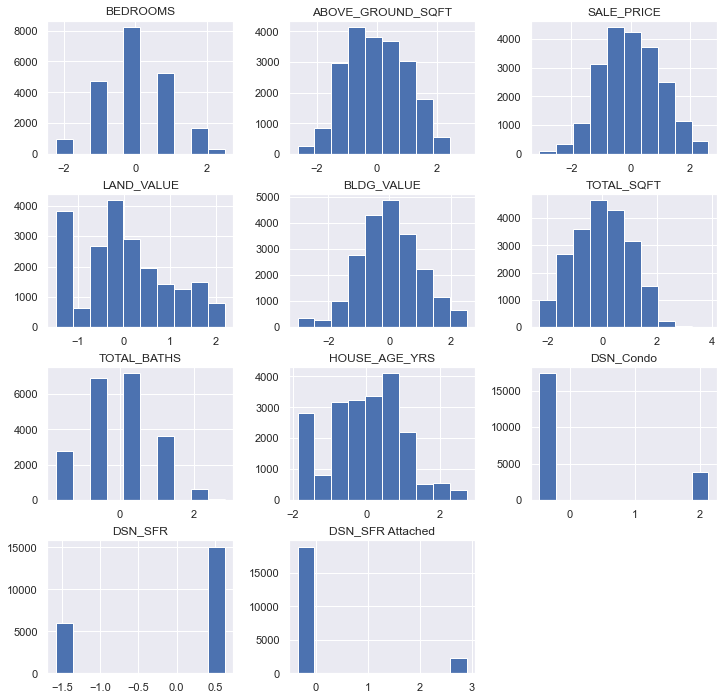

In [453]:
pt_one_hot_norm.hist()

In [454]:
# Models using normalized data
# Set up the x_features and y_target variables.
X2 = pt_one_hot_norm.drop(['SALE_PRICE'] , axis=1)
Y2 = pt_one_hot_norm['SALE_PRICE']
print(X2.shape, Y2.shape)

# Set up a 10-fold cross validation for the train/test split.
kf2 = KFold(n_splits = 10)
kf2.get_n_splits(X2)
X2.head()

(21173, 10) (21173,)


BEDROOMS  ABOVE_GROUND_SQFT  LAND_VALUE  BLDG_VALUE  TOTAL_SQFT  \
0 -0.094334           1.546816    1.797130   -0.353193    0.469212   
1 -2.217038          -2.107088   -1.480614   -0.672679   -2.059179   
2 -2.217038          -2.109980   -1.480614   -0.716214   -2.060456   
3 -0.094334          -0.583096   -1.480614    0.474156   -1.086741   
4 -0.094334           0.467611    0.156171    0.352751    0.422946   

   TOTAL_BATHS  HOUSE_AGE_YRS  DSN_Condo   DSN_SFR  DSN_SFR Attached  
0     0.386186      -1.628536  -0.467761  0.632936         -0.345252  
1    -1.719930       0.026198   2.137844 -1.579937         -0.345252  
2    -1.719930       0.026198   2.137844 -1.579937         -0.345252  
3    -0.602191       0.211681   2.137844 -1.579937         -0.345252  
4     1.275827       0.548683  -0.467761 -1.579937          2.896439

In [455]:
#starting dummy regression baseline 
dummy_regr2 = DummyRegressor(strategy="mean")

#linear regression
linreg10f2 = LinearRegression()

#create 10 folds
baseline_scores={"r2":[],"mse":[],"rmse":[]}
linreg_scores={"r2":[],"mse":[],"rmse":[]}

for train_index, test_index in kf2.split(X2):
    print("TRAIN:", train_index, "TEST:", test_index, '\n')
    X2_train, X2_test = X2.iloc[train_index], X2.iloc[test_index]
    Y2_train, Y2_test = Y2.iloc[train_index], Y2.iloc[test_index]
    
    dummy_regr2.fit(X2_train, Y2_train)
    linreg10f2.fit(X2_train, Y2_train)
    dummy_pred2 = dummy_regr2.predict(X2_test)
    
    ny2_pred_linreg10f2 = linreg10f2.predict(X2_test)
    msedummy2 = mean_squared_error(Y2_test, dummy_pred2)
    mse2 = mean_squared_error(Y2_test, ny2_pred_linreg10f2)
    
    print('R^2 Score Dummy: ', dummy_regr2.score(X2_train, Y2_train))
    print('Mean Square Error Dummy: ', msedummy2)
    print('Root Mean Square Error Dummy: ', np.sqrt(msedummy2), '\n')
    
    print('R^2 Score: ', linreg10f2.score(X2_train, Y2_train))
    print('Mean Square Error: ', mse2)
    print('Root Mean Square Error: ', np.sqrt(mse2), '\n \n')
    
    baseline_scores["r2"].append(dummy_regr2.score(X2_train, Y2_train))
    baseline_scores["mse"].append(msedummy2)
    baseline_scores["rmse"].append(np.sqrt(msedummy2))
    
    linreg_scores["r2"].append(linreg10f2.score(X2_train, Y2_train))
    linreg_scores["mse"].append(mse2)
    linreg_scores["rmse"].append(np.sqrt(mse2))

TRAIN: [ 2118  2119  2120 ... 21170 21171 21172] TEST: [   0    1    2 ... 2115 2116 2117] 

R^2 Score Dummy:  0.0
Mean Square Error Dummy:  1.1262186934694358
Root Mean Square Error Dummy:  1.0612345138891006 

R^2 Score:  0.736902853772557
Mean Square Error:  0.31346564114152625
Root Mean Square Error:  0.5598800238814797 
 

TRAIN: [    0     1     2 ... 21170 21171 21172] TEST: [2118 2119 2120 ... 4233 4234 4235] 

R^2 Score Dummy:  0.0
Mean Square Error Dummy:  1.0104955567912286
Root Mean Square Error Dummy:  1.0052340805957727 

R^2 Score:  0.7325541312361832
Mean Square Error:  0.23890030047437993
Root Mean Square Error:  0.48877428376949206 
 

TRAIN: [    0     1     2 ... 21170 21171 21172] TEST: [4236 4237 4238 ... 6351 6352 6353] 

R^2 Score Dummy:  0.0
Mean Square Error Dummy:  1.0081623102176522
Root Mean Square Error Dummy:  1.004072861010421 

R^2 Score:  0.7346690346376088
Mean Square Error:  0.2560483249952673
Root Mean Square Error:  0.5060121787025164 
 

TRAIN: [ 

In [456]:
pd.DataFrame(baseline_scores)

r2       mse      rmse
0  0.0  1.126219  1.061235
1  0.0  1.010496  1.005234
2  0.0  1.008162  1.004073
3  0.0  0.984223  0.992080
4  0.0  1.024294  1.012074
5  0.0  0.950191  0.974778
6  0.0  1.040608  1.020102
7  0.0  1.019589  1.009747
8  0.0  0.944963  0.972092
9  0.0  0.940458  0.969772

In [457]:
baseline_metrics = pd.DataFrame(baseline_scores)
baseline_metrics = baseline_metrics.mean(axis=0)
baseline_metrics = pd.DataFrame(baseline_metrics,columns=["Baseline Linear Regression"])
baseline_metrics = baseline_metrics.transpose()
baseline_metrics

r2      mse      rmse
Baseline Linear Regression  0.0  1.00492  1.002119

In [458]:
pd.DataFrame(linreg_scores)

r2       mse      rmse
0  0.736903  0.313466  0.559880
1  0.732554  0.238900  0.488774
2  0.734669  0.256048  0.506012
3  0.732369  0.226644  0.476072
4  0.731192  0.227325  0.476786
5  0.736584  0.256460  0.506419
6  0.737007  0.287474  0.536166
7  0.741913  0.322967  0.568302
8  0.742628  0.316914  0.562951
9  0.738163  0.267503  0.517207

In [459]:
linreg_metrics = pd.DataFrame(linreg_scores)
linreg_metrics = linreg_metrics.mean(axis=0)
linreg_metrics = pd.DataFrame(linreg_metrics,columns=["Linear Regression Normalized"])
linreg_metrics = linreg_metrics.transpose()
linreg_metrics

r2      mse      rmse
Linear Regression Normalized  0.736398  0.27137  0.519857

Text(0, 0.5, 'Predictions')

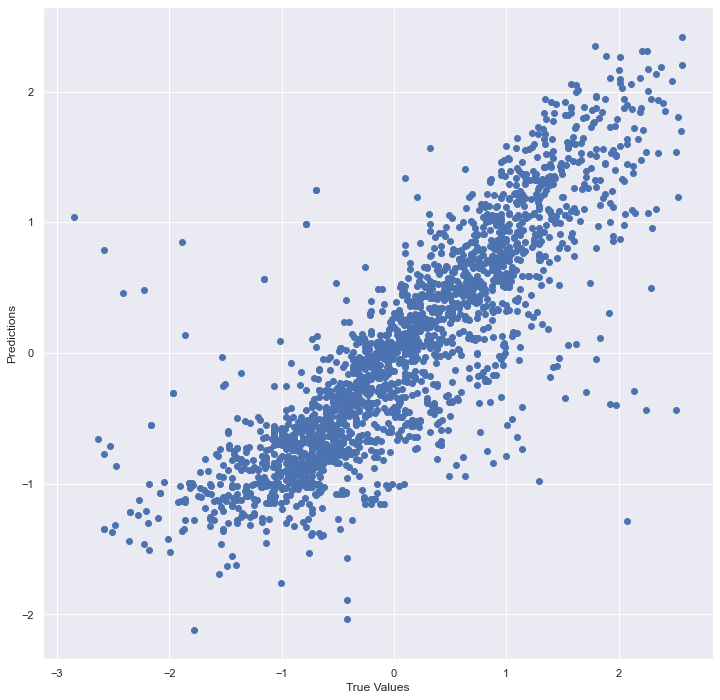

In [460]:
plt.scatter(Y2_test, ny2_pred_linreg10f2)
plt.xlabel('True Values')
plt.ylabel('Predictions')

# Regression Modeling

In [461]:
#import dependencies
from sklearn.linear_model import Ridge, Lasso
from sklearn import tree
from sklearn.svm import SVR
from sklearn.pipeline import make_pipeline
from sklearn.ensemble import RandomForestRegressor

## Ridge Regression

In [462]:
# best alpha test...
# List of values to try for alpha:
alpha = [1,0.1,0.01,0.001,0.0001,0.00001,0.000001]
accuracy = []
for item in alpha:
    
    clf = Ridge(alpha = item)
    clf.fit(X2_train, Y2_train)
    score = clf.score(X2_test, Y2_test)
    accuracy.append(score)
accuracy

[0.7134145065726345,
 0.7134137689635818,
 0.7134136947079828,
 0.7134136872774743,
 0.7134136865343739,
 0.7134136864600633,
 0.7134136864526324]

In [463]:
#starting dummy regression baseline 
dummy_regr3 = DummyRegressor(strategy="mean")

#linear regression
ridgereg10f = Ridge(alpha=0.001,fit_intercept=True,normalize=True)

#create 10 folds
rig_scores={"r2":[],"mse":[],"rmse":[]}

for train_index, test_index in kf2.split(X2):
    print("TRAIN:", train_index, "TEST:", test_index, '\n')
    X2_train, X2_test = X2.iloc[train_index], X2.iloc[test_index]
    Y2_train, Y2_test = Y2.iloc[train_index], Y2.iloc[test_index]
    
    dummy_regr3.fit(X2_train, Y2_train)
    ridgereg10f.fit(X2_train, Y2_train)
    
    dummy_pred3 = dummy_regr3.predict(X2_test)
    ny2_pred_ridgereg10f = ridgereg10f.predict(X2_test)
    
    msedummy3 = mean_squared_error(Y2_test, dummy_pred3)
    mse3 = mean_squared_error(Y2_test, ny2_pred_ridgereg10f)
    
    print('R^2 Score Dummy: ', dummy_regr3.score(X2_train, Y2_train))
    print('Mean Square Error Dummy: ', msedummy3)
    print('Root Mean Square Error Dummy: ', np.sqrt(msedummy3), '\n')
    
    print('R^2 Score: ', ridgereg10f.score(X2_train, Y2_train))
    print('Mean Square Error: ', mse3)
    print('Root Mean Square Error: ', np.sqrt(mse3), '\n \n')
    
    rig_scores["r2"].append(ridgereg10f.score(X2_train, Y2_train))
    rig_scores["mse"].append(mse3)
    rig_scores["rmse"].append(np.sqrt(mse3))

TRAIN: [ 2118  2119  2120 ... 21170 21171 21172] TEST: [   0    1    2 ... 2115 2116 2117] 

R^2 Score Dummy:  0.0
Mean Square Error Dummy:  1.1262186934694358
Root Mean Square Error Dummy:  1.0612345138891006 

R^2 Score:  0.7369043545366736
Mean Square Error:  0.3134723308710871
Root Mean Square Error:  0.55988599810237 
 

TRAIN: [    0     1     2 ... 21170 21171 21172] TEST: [2118 2119 2120 ... 4233 4234 4235] 

R^2 Score Dummy:  0.0
Mean Square Error Dummy:  1.0104955567912286
Root Mean Square Error Dummy:  1.0052340805957727 

R^2 Score:  0.7325986391983597
Mean Square Error:  0.2391923562895189
Root Mean Square Error:  0.4890729559989173 
 

TRAIN: [    0     1     2 ... 21170 21171 21172] TEST: [4236 4237 4238 ... 6351 6352 6353] 

R^2 Score Dummy:  0.0
Mean Square Error Dummy:  1.0081623102176522
Root Mean Square Error Dummy:  1.004072861010421 

R^2 Score:  0.7347074312353641
Mean Square Error:  0.2562162041081163
Root Mean Square Error:  0.5061780359795517 
 

TRAIN: [    0

In [464]:
pd.DataFrame(rig_scores)

r2       mse      rmse
0  0.736904  0.313472  0.559886
1  0.732599  0.239192  0.489073
2  0.734707  0.256216  0.506178
3  0.732414  0.226687  0.476116
4  0.731275  0.227216  0.476671
5  0.736617  0.256250  0.506212
6  0.737057  0.286869  0.535601
7  0.741952  0.322739  0.568101
8  0.742659  0.316637  0.562705
9  0.738241  0.267650  0.517349

In [465]:
rig_metrics = pd.DataFrame(rig_scores)
rig_metrics = rig_metrics.mean(axis=0)
rig_metrics = pd.DataFrame(rig_metrics,columns=["Ridge Regression"])
rig_metrics = rig_metrics.transpose()
rig_metrics

r2       mse      rmse
Ridge Regression  0.736443  0.271293  0.519789

## Lasso Regression

In [466]:
# best alpha test...
# List of values to try for alpha:
alpha = [1,0.1,0.01,0.001,0.0001,0.00001,0.000001]
accuracy = []
for item in alpha:
    
    clf = Lasso(alpha = item)
    clf.fit(X2_train, Y2_train)
    score = clf.score(X2_test, Y2_test)
    accuracy.append(score)
accuracy

C:\Users\joesh\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:529: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 59.05164819809943, tolerance: 1.9183424429188778
  model = cd_fast.enet_coordinate_descent(
C:\Users\joesh\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:529: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 58.995572864097994, tolerance: 1.9183424429188778
  model = cd_fast.enet_coordinate_descent(


[-0.006948241127698429,
 0.6702595353432361,
 0.7124692627798658,
 0.7134555914032319,
 0.7134214486977735,
 0.71341460599332,
 0.7134137785400126]

In [467]:
#starting dummy regression baseline 
dummy_regr4 = DummyRegressor(strategy="mean")

#linear regression
lassoreg10f = Lasso(alpha=0.00001,max_iter=1000,normalize=True)

#create 10 folds
las_scores={"r2":[],"mse":[],"rmse":[]}

for train_index, test_index in kf2.split(X2):
    print("TRAIN:", train_index, "TEST:", test_index, '\n')
    X2_train, X2_test = X2.iloc[train_index], X2.iloc[test_index]
    Y2_train, Y2_test = Y2.iloc[train_index], Y2.iloc[test_index]
    
    dummy_regr4.fit(X2_train, Y2_train)
    lassoreg10f.fit(X2_train, Y2_train)
    
    dummy_pred4 = dummy_regr4.predict(X2_test)
    ny2_pred_lassoreg10f = lassoreg10f.predict(X2_test)
    
    msedummy4 = mean_squared_error(Y2_test, dummy_pred4)
    mse4 = mean_squared_error(Y2_test, ny2_pred_lassoreg10f)
    
    print('R^2 Score Dummy: ', dummy_regr4.score(X2_train, Y2_train))
    print('Mean Square Error Dummy: ', msedummy4)
    print('Root Mean Square Error Dummy: ', np.sqrt(msedummy4), '\n')
    
    print('R^2 Score: ', lassoreg10f.score(X2_train, Y2_train))
    print('Mean Square Error: ', mse4)
    print('Root Mean Square Error: ', np.sqrt(mse4), '\n \n')
    
    las_scores["r2"].append(lassoreg10f.score(X2_train, Y2_train))
    las_scores["mse"].append(mse4)
    las_scores["rmse"].append(np.sqrt(mse4))

TRAIN: [ 2118  2119  2120 ... 21170 21171 21172] TEST: [   0    1    2 ... 2115 2116 2117] 

R^2 Score Dummy:  0.0
Mean Square Error Dummy:  1.1262186934694358
Root Mean Square Error Dummy:  1.0612345138891006 

R^2 Score:  0.7368755658288269
Mean Square Error:  0.31365653174543795
Root Mean Square Error:  0.560050472498183 
 

TRAIN: [    0     1     2 ... 21170 21171 21172] TEST: [2118 2119 2120 ... 4233 4234 4235] 

R^2 Score Dummy:  0.0
Mean Square Error Dummy:  1.0104955567912286
Root Mean Square Error Dummy:  1.0052340805957727 

R^2 Score:  0.7325703349951661
Mean Square Error:  0.2390176016474516
Root Mean Square Error:  0.48889426428160476 
 

TRAIN: [    0     1     2 ... 21170 21171 21172] TEST: [4236 4237 4238 ... 6351 6352 6353] 

R^2 Score Dummy:  0.0
Mean Square Error Dummy:  1.0081623102176522
Root Mean Square Error Dummy:  1.004072861010421 

R^2 Score:  0.734679140276001
Mean Square Error:  0.256253167105596
Root Mean Square Error:  0.5062145465171818 
 

TRAIN: [    

In [468]:
pd.DataFrame(las_scores)

r2       mse      rmse
0  0.736876  0.313657  0.560050
1  0.732570  0.239018  0.488894
2  0.734679  0.256253  0.506215
3  0.732386  0.226844  0.476282
4  0.731246  0.227206  0.476662
5  0.736589  0.256330  0.506291
6  0.737029  0.286759  0.535499
7  0.741924  0.322815  0.568168
8  0.742632  0.317059  0.563080
9  0.738213  0.267617  0.517317

In [469]:
las_metrics = pd.DataFrame(las_scores)
las_metrics=las_metrics.mean(axis=0)
las_metrics = pd.DataFrame(las_metrics,columns=["Lasso Regression"])
las_metrics = las_metrics.transpose()
las_metrics

r2       mse      rmse
Lasso Regression  0.736414  0.271356  0.519846

## Regression Tree

In [470]:
# best max_depth test...
# List of values to try for max_depth:
max_depth_range = list(range(1, 10))# List to store the average RMSE for each value of max_depth:
accuracy = []
for depth in max_depth_range:
    
    clf = tree.DecisionTreeRegressor(max_depth = depth, 
                             random_state = 0)
    clf.fit(X2_train, Y2_train)
    score = clf.score(X2_test, Y2_test)
    accuracy.append(score)
accuracy

[0.3549724022779418,
 0.5701821259626927,
 0.6907445541060996,
 0.7493628465344977,
 0.7947297494652108,
 0.8019824607269351,
 0.8037240618440546,
 0.787626444775084,
 0.7810513394363098]

In [471]:
# Seems like max_depth=7 has the best accuracy..
clf = tree.DecisionTreeRegressor(max_depth = 5, 
                             random_state = 0)
clf.fit(X2_train, Y2_train)
score = clf.score(X2_test, Y2_test)
score

0.7947297494652108

In [472]:
#starting dummy regression baseline 
dummy_regr5 = DummyRegressor(strategy="mean")

# Create the classfier structure with specified parameters
# (max depth is for how many levels will be made)
regtree = tree.DecisionTreeRegressor(max_depth=7)

#create 10 folds
rtree_scores={"r2":[],"mse":[],"rmse":[]}

for train_index, test_index in kf2.split(X2):
    print("TRAIN:", train_index, "TEST:", test_index, '\n')
    X2_train, X2_test = X2.iloc[train_index], X2.iloc[test_index]
    Y2_train, Y2_test = Y2.iloc[train_index], Y2.iloc[test_index]
    
    dummy_regr5.fit(X2_train, Y2_train)
    regtree.fit(X2_train, Y2_train)
    
    dummy_pred5 = dummy_regr5.predict(X2_test)
    ny2_pred_regtree = regtree.predict(X2_test)
    
    msedummy5 = mean_squared_error(Y2_test, dummy_pred5)
    mse5 = mean_squared_error(Y2_test, ny2_pred_regtree)
    
    print('R^2 Score Dummy: ', dummy_regr5.score(X2_train, Y2_train))
    print('Mean Square Error Dummy: ', msedummy5)
    print('Root Mean Square Error Dummy: ', np.sqrt(msedummy5), '\n')
    
    print('R^2 Score: ', regtree.score(X2_train, Y2_train))
    print('Mean Square Error: ', mse5)
    print('Root Mean Square Error: ', np.sqrt(mse5), '\n \n')
    
    rtree_scores["r2"].append(regtree.score(X2_train, Y2_train))
    rtree_scores["mse"].append(mse5)
    rtree_scores["rmse"].append(np.sqrt(mse5))

TRAIN: [ 2118  2119  2120 ... 21170 21171 21172] TEST: [   0    1    2 ... 2115 2116 2117] 

R^2 Score Dummy:  0.0
Mean Square Error Dummy:  1.1262186934694358
Root Mean Square Error Dummy:  1.0612345138891006 

R^2 Score:  0.8367003549466069
Mean Square Error:  0.23872358286475626
Root Mean Square Error:  0.4885934740300532 
 

TRAIN: [    0     1     2 ... 21170 21171 21172] TEST: [2118 2119 2120 ... 4233 4234 4235] 

R^2 Score Dummy:  0.0
Mean Square Error Dummy:  1.0104955567912286
Root Mean Square Error Dummy:  1.0052340805957727 

R^2 Score:  0.8360036900474107
Mean Square Error:  0.178664821314107
Root Mean Square Error:  0.42268761670305294 
 

TRAIN: [    0     1     2 ... 21170 21171 21172] TEST: [4236 4237 4238 ... 6351 6352 6353] 

R^2 Score Dummy:  0.0
Mean Square Error Dummy:  1.0081623102176522
Root Mean Square Error Dummy:  1.004072861010421 

R^2 Score:  0.8378995096822619
Mean Square Error:  0.19650225682544528
Root Mean Square Error:  0.44328575075840787 
 

TRAIN: [

In [473]:
pd.DataFrame(rtree_scores)

r2       mse      rmse
0  0.836700  0.238724  0.488593
1  0.836004  0.178665  0.422688
2  0.837900  0.196502  0.443286
3  0.833432  0.161277  0.401593
4  0.839367  0.182589  0.427305
5  0.836844  0.203123  0.450692
6  0.841284  0.228671  0.478196
7  0.844032  0.269976  0.519592
8  0.835489  0.155487  0.394319
9  0.836184  0.174097  0.417249

In [474]:
rtree_metrics = pd.DataFrame(rtree_scores)
rtree_metrics = rtree_metrics.mean(axis=0)
rtree_metrics = pd.DataFrame(rtree_metrics,columns=["Regression Tree"])
rtree_metrics = rtree_metrics.transpose()
rtree_metrics

r2       mse      rmse
Regression Tree  0.837724  0.198911  0.444351

## Support Vector Regression

In [475]:
#starting dummy regression baseline 
dummy_regr6 = DummyRegressor(strategy="mean")

#create 10 folds
svr_scores={"r2":[],"mse":[],"rmse":[]}

for train_index, test_index in kf2.split(X2):
    print("TRAIN:", train_index, "TEST:", test_index, '\n')
    X2_train, X2_test = X2.iloc[train_index], X2.iloc[test_index]
    Y2_train, Y2_test = Y2.iloc[train_index], Y2.iloc[test_index]
    
    dummy_regr6.fit(X2_train, Y2_train)
    svr = make_pipeline(preprocessing.StandardScaler(), SVR(C=1.0, epsilon=0.1))
    svr.fit(X2_train, Y2_train)
    
    dummy_pred6 = dummy_regr6.predict(X2_test)
    svr_pred = svr.predict(X2_test)
    
    msedummy6 = mean_squared_error(Y2_test, dummy_pred6)
    mse6 = mean_squared_error(Y2_test, svr_pred)
    
    print('R^2 Score Dummy: ', dummy_regr6.score(X2_train, Y2_train))
    print('Mean Square Error Dummy: ', msedummy6)
    print('Root Mean Square Error Dummy: ', np.sqrt(msedummy6), '\n')
    
    print('R^2 Score: ', svr.score(X2_train, Y2_train))
    print('Mean Square Error: ', mse6)
    print('Root Mean Square Error: ', np.sqrt(mse6), '\n')
    
    svr_scores["r2"].append(svr.score(X2_train, Y2_train))
    svr_scores["mse"].append(mse6)
    svr_scores["rmse"].append(np.sqrt(mse6))

TRAIN: [ 2118  2119  2120 ... 21170 21171 21172] TEST: [   0    1    2 ... 2115 2116 2117] 

R^2 Score Dummy:  0.0
Mean Square Error Dummy:  1.1262186934694358
Root Mean Square Error Dummy:  1.0612345138891006 

R^2 Score:  0.849786494232043
Mean Square Error:  0.22295194523101652
Root Mean Square Error:  0.47217787456743093 

TRAIN: [    0     1     2 ... 21170 21171 21172] TEST: [2118 2119 2120 ... 4233 4234 4235] 

R^2 Score Dummy:  0.0
Mean Square Error Dummy:  1.0104955567912286
Root Mean Square Error Dummy:  1.0052340805957727 

R^2 Score:  0.8459273951920462
Mean Square Error:  0.15559208831210952
Root Mean Square Error:  0.39445162987635063 

TRAIN: [    0     1     2 ... 21170 21171 21172] TEST: [4236 4237 4238 ... 6351 6352 6353] 

R^2 Score Dummy:  0.0
Mean Square Error Dummy:  1.0081623102176522
Root Mean Square Error Dummy:  1.004072861010421 

R^2 Score:  0.8468775171925673
Mean Square Error:  0.1640456594662161
Root Mean Square Error:  0.40502550471077264 

TRAIN: [    0

In [476]:
pd.DataFrame(svr_scores)

r2       mse      rmse
0  0.849786  0.222952  0.472178
1  0.845927  0.155592  0.394452
2  0.846878  0.164046  0.405026
3  0.843604  0.121650  0.348784
4  0.845162  0.144013  0.379490
5  0.848223  0.159025  0.398779
6  0.850746  0.193806  0.440235
7  0.852825  0.214265  0.462888
8  0.844708  0.125796  0.354678
9  0.846642  0.149399  0.386521

In [477]:
svr_metrics = pd.DataFrame(svr_scores)
svr_metrics = svr_metrics.mean(axis=0)
svr_metrics = pd.DataFrame(svr_metrics,columns=["Support Vector Regression"])
svr_metrics = svr_metrics.transpose()
svr_metrics

r2       mse      rmse
Support Vector Regression  0.84745  0.165054  0.404303

## Random Forest Regressor 

In [478]:
#starting dummy regression baseline 
dummy_regr7 = DummyRegressor(strategy="mean")

rf = RandomForestRegressor()

#create 10 folds
rfr_scores={"r2":[],"mse":[],"rmse":[]}

for train_index, test_index in kf2.split(X2):
    print("TRAIN:", train_index, "TEST:", test_index, '\n')
    X2_train, X2_test = X2.iloc[train_index], X2.iloc[test_index]
    Y2_train, Y2_test = Y2.iloc[train_index], Y2.iloc[test_index]
    
    dummy_regr7.fit(X2_train, Y2_train)
    rf.fit(X2_train, Y2_train)

    
    dummy_pred7 = dummy_regr7.predict(X2_test)
    rf_pred = rf.predict(X2_test)
    
    msedummy7 = mean_squared_error(Y2_test, dummy_pred7)
    mse7 = mean_squared_error(Y2_test, rf_pred)
    
    print('R^2 Score Dummy: ', dummy_regr7.score(X2_train, Y2_train))
    print('Mean Square Error Dummy: ', msedummy7)
    print('Root Mean Square Error Dummy: ', np.sqrt(msedummy7), '\n')
    
    print('R^2 Score: ', rf.score(X2_train, Y2_train))
    print('Mean Square Error: ', mse7)
    print('Root Mean Square Error: ', np.sqrt(mse7), '\n')
    
    rfr_scores["r2"].append(rf.score(X2_train, Y2_train))
    rfr_scores["mse"].append(mse7)
    rfr_scores["rmse"].append(np.sqrt(mse7))

TRAIN: [ 2118  2119  2120 ... 21170 21171 21172] TEST: [   0    1    2 ... 2115 2116 2117] 

R^2 Score Dummy:  0.0
Mean Square Error Dummy:  1.1262186934694358
Root Mean Square Error Dummy:  1.0612345138891006 

R^2 Score:  0.971683869447782
Mean Square Error:  0.21355711591340276
Root Mean Square Error:  0.46212240360471896 

TRAIN: [    0     1     2 ... 21170 21171 21172] TEST: [2118 2119 2120 ... 4233 4234 4235] 

R^2 Score Dummy:  0.0
Mean Square Error Dummy:  1.0104955567912286
Root Mean Square Error Dummy:  1.0052340805957727 

R^2 Score:  0.9709066888135858
Mean Square Error:  0.15064101768684923
Root Mean Square Error:  0.38812500265616645 

TRAIN: [    0     1     2 ... 21170 21171 21172] TEST: [4236 4237 4238 ... 6351 6352 6353] 

R^2 Score Dummy:  0.0
Mean Square Error Dummy:  1.0081623102176522
Root Mean Square Error Dummy:  1.004072861010421 

R^2 Score:  0.972063721739461
Mean Square Error:  0.16922161685280945
Root Mean Square Error:  0.41136555136862085 

TRAIN: [    0

In [479]:
pd.DataFrame(rfr_scores)

r2       mse      rmse
0  0.971684  0.213557  0.462122
1  0.970907  0.150641  0.388125
2  0.972064  0.169222  0.411366
3  0.971041  0.139935  0.374079
4  0.971566  0.164951  0.406141
5  0.972351  0.177803  0.421667
6  0.971515  0.213584  0.462151
7  0.972658  0.223293  0.472539
8  0.970341  0.145641  0.381629
9  0.970816  0.166552  0.408108

In [480]:
rfr_metrics = pd.DataFrame(rfr_scores)
rfr_metrics = rfr_metrics.mean(axis=0)
rfr_metrics = pd.DataFrame(rfr_metrics,columns=["Random Forest Regression"])
rfr_metrics = rfr_metrics.transpose()
rfr_metrics

r2       mse      rmse
Random Forest Regression  0.971494  0.176518  0.418793

## Regression Model Evaluation Comparison

In [481]:
comparison_metrics = baseline_metrics.append([linreg_metrics,
                                              rig_metrics,
                                              las_metrics,
                                              rtree_metrics,
                                              svr_metrics,
                                              rfr_metrics])
comparison_metrics

r2       mse      rmse
Baseline Linear Regression    0.000000  1.004920  1.002119
Linear Regression Normalized  0.736398  0.271370  0.519857
Ridge Regression              0.736443  0.271293  0.519789
Lasso Regression              0.736414  0.271356  0.519846
Regression Tree               0.837724  0.198911  0.444351
Support Vector Regression     0.847450  0.165054  0.404303
Random Forest Regression      0.971494  0.176518  0.418793

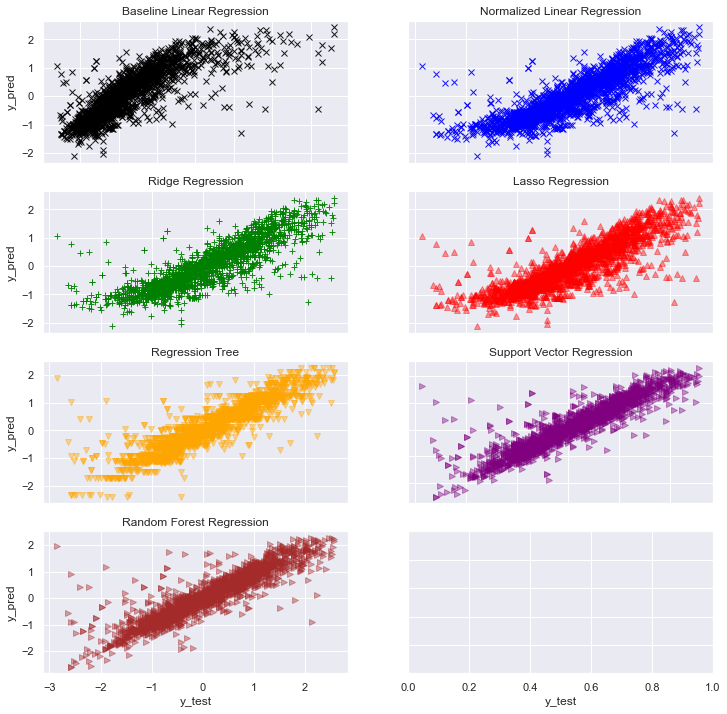

In [482]:
fig, axs = plt.subplots(4, 2, figsize=(12,12))

axs[0,0].plot(Y_test, ny2_pred_linreg10f2,"x",alpha=0.9,c="black",
         label='Baseline Linear Regression')
axs[0,0].set_title('Baseline Linear Regression')

axs[0,1].plot(Y2_test, ny2_pred_linreg10f2,"x",alpha=0.9,c="blue",
         label='Normalized Linear Regression')
axs[0,1].set_title('Normalized Linear Regression')

axs[1,0].plot(Y2_test, ny2_pred_ridgereg10f,"+",alpha=0.9,c="green",
         label='Ridge Regression')
axs[1,0].set_title('Ridge Regression')

axs[1,1].plot(Y2_test, ny2_pred_lassoreg10f,"^",alpha=0.4,c="red",
         label='Lasso Regression')
axs[1,1].set_title('Lasso Regression')

axs[2,0].plot(Y2_test, ny2_pred_regtree,"v",alpha=0.4,c="orange",
         label='Regression Tree')
axs[2,0].set_title('Regression Tree')

axs[2,1].plot(Y2_test, svr_pred,">",alpha=0.4,c="purple",
         label='Support Vector Regression')
axs[2,1].set_title('Support Vector Regression')

axs[3,0].plot(Y2_test, rf_pred,">",alpha=0.4,c="brown",
         label='Random Forest Regression')
axs[3,0].set_title('Random Forest Regression')

for ax in axs.flat:
    ax.set(xlabel='y_test', ylabel
           ='y_pred')

# Hide x labels and tick labels for top plots and y ticks for right plots.
for ax in axs.flat:
    ax.label_outer()

# ===================================
# Beginning of Part 2:
# ===================================
# Data Analysis on the Collinearity between House Prices and Stock Market Indexes
## Cleaning Zillow Dataset

In [483]:
# Load datasets.
home_vals = pd.read_csv(filepath + "ZillowZHVIwithRow.csv",
                        index_col=0)

# Read the csv files.
home_vals.head()

Date  New York, NY  Los Angeles-Long Beach-Anaheim, CA  Chicago, IL  \
Row                                                                           
0    1/31/96        107630                              187842       183929   
1    2/29/96        107657                              187403       184185   
2    3/31/96        107707                              187125       184205   
3    4/30/96        107834                              186592       184312   
4    5/31/96        107977                              186274       184286   

     Dallas-Fort Worth, TX  Philadelphia, PA  Houston, TX  Washington, DC  \
Row                                                                         
0                   164647            114406       121233          110773   
1                   164345            114471       121078          110849   
2                   163946            114634       120937          110858   
3                   163493            114962       120693          111007   
4                   162886            115314       120527          111148   

     Miami-Fort Lauderdale, FL  Atlanta, GA  Boston, MA  San Francisco, CA  \
Row                                                                          
0                       178034       109403      120291             168008   
1                       177811       109533      120519             168003   
2                       177681       109670      120740             168176   
3                       177407       109917      121229             168453   
4                       177288       110132      121711             168821   

     Detroit, MI  Riverside, CA  Phoenix, AZ  Seattle, WA  \
Row                                                         
0         246464         105560       121318       113745   
1         245634         105940       120822       114063   
2         245234         106307       120515       114425   
3         244494         107095       119854       115121   
4         244171         107902       119360       115802   

     Minneapolis-St Paul, MN  San Diego, CA  St. Louis, MO  Tampa, FL  \
Row                                                                     
0                     163085         118867         177310      96315   
1                     163052         118636         176966      96633   
2                     163050         118530         176777      96854   
3                     163058         118407         176380      97291   
4                     163119         118482         176197      97597   

     Baltimore, MD  Denver, CO  Pittsburgh, PA  Portland, OR  Charlotte, NC  \
Row                                                                           
0            86789      143443          144426         80016         143331   
1            86814      143600          144966         80012         143930   
2            86824      143656          145384         80003         144440   
3            86927      143865          146181         79989         145488   
4            87084      144040          146813         79965         146514   

     Sacramento, CA  San Antonio, TX  Orlando, FL  Cincinnati, OH  \
Row                                                                 
0            119711           146982       110691          106209   
1            119905           146458       110642          106295   
2            120119           146161       110592          106444   
3            120581           145556       110555          106674   
4            121036           145188       110463          106983   

     Cleveland, OH  Kansas City, MO  Las Vegas, NV  Columbus, OH  \
Row                                                                
0           112128           108702          96499        148755   
1           112229           108834          96699        148619   
2           112300           108967          96926        148709   
3           112501           109241          9735

In [484]:
home_vals.shape

(297, 915)

We'll be focusing only on the 4 most populous cities, plus Boulder.

In [485]:
# Keep the cities we want to analyze.
home_vals = home_vals[['Date','New York, NY','Los Angeles-Long Beach-Anaheim, CA',
                       'Chicago, IL', 'Dallas-Fort Worth, TX', 'Boulder, CO']]
home_vals.head()

Date  New York, NY  Los Angeles-Long Beach-Anaheim, CA  Chicago, IL  \
Row                                                                           
0    1/31/96        107630                              187842       183929   
1    2/29/96        107657                              187403       184185   
2    3/31/96        107707                              187125       184205   
3    4/30/96        107834                              186592       184312   
4    5/31/96        107977                              186274       184286   

     Dallas-Fort Worth, TX  Boulder, CO  
Row                                      
0                   164647          NaN  
1                   164345          NaN  
2                   163946          NaN  
3                   163493          NaN  
4                   162886          NaN

In [486]:
# Save the cleaned Zillow dataset.
home_vals.to_csv(filepath + "ZillowZHVIDataCleaned.csv")

## Cleaning Stock Dataset

In [4]:
# Load datasets.
stocks = pd.read_csv(filepath + "NYSEIndexHistoricalPricesWithRow.csv",
                     index_col=0)

# Read the csv files.
stocks.head()

Date  VIX Open    VIX High  VIX Low  VIX Close  Unnamed: 6  \
Row                                                                   
0    10/15/20     27.10       29.06    26.82      26.97         NaN   
1    10/14/20     25.72       27.23    25.53      26.40         NaN   
2    10/13/20     25.67       26.93    25.16      26.07         NaN   
3    10/12/20     25.65       25.65    24.14      25.07         NaN   
4     10/9/20     26.20       26.22    24.03      25.00         NaN   

     NAS Open   NAS High   NAS Low  NAS Close  Unnamed: 11  SP Open   SP High  \
Row                                                                             
0     11559.88  11740.68  11559.10   11713.87          NaN   3453.72  3489.08   
1     11889.07  11939.92  11714.35   11768.73          NaN   3515.47  3527.94   
2     11901.76  11946.98  11821.83   11863.90          NaN   3534.01  3534.01   
3     11732.33  11965.54  11704.13   11876.26          NaN   3500.02  3549.85   
4     11487.60  11581.23  11476.66   11579.94          NaN   3459.67  3482.34   

      SP Low  SP Close  Unnamed: 16  DOW Open     DOW High   DOW Low  \
Row                                                                    
0    3440.89   3483.34          NaN   28323.40    28535.85  28181.54   
1    3480.55   3488.67          NaN   28731.30    28792.56  28461.73   
2    3500.86   3511.93          NaN   28764.95    28808.84  28604.35   
3    3499.61   3534.22          NaN   28671.12    28957.90  28659.67   
4    3458.07   3477.13          NaN   28533.61    28676.29  28440.63   

     DOW Close  
Row             
0     28494.20  
1     28514.00  
2     28679.81  
3     28837.52  
4     28586.90

In [5]:
stocks.shape

(7759, 20)

In [6]:
#dropping the columns with NaN values, as well as High/Low columns because we're only interested in open/close
stocks.drop(stocks.columns[[1,2,4,6,7,9,11,12,14,16,17]],
            axis=1,inplace=True)
stocks.head()

Date  VIX Low  Unnamed: 6   NAS Low  Unnamed: 11   SP Low  \
Row                                                                  
0    10/15/20    26.82         NaN  11559.10          NaN  3440.89   
1    10/14/20    25.53         NaN  11714.35          NaN  3480.55   
2    10/13/20    25.16         NaN  11821.83          NaN  3500.86   
3    10/12/20    24.14         NaN  11704.13          NaN  3499.61   
4     10/9/20    24.03         NaN  11476.66          NaN  3458.07   

     Unnamed: 16   DOW Low  DOW Close  
Row                                    
0            NaN  28181.54   28494.20  
1            NaN  28461.73   28514.00  
2            NaN  28604.35   28679.81  
3            NaN  28659.67   28837.52  
4            NaN  28440.63   28586.90

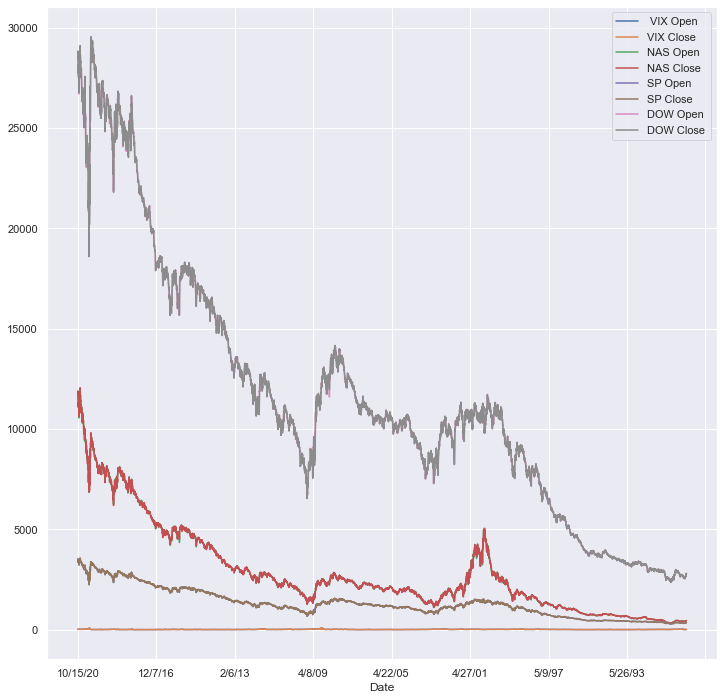

In [490]:
stocks.plot()
plt.show()

In [491]:
# Save the cleaned Stocks dataset.
stocks.to_csv(filepath + "StocksDataCleaned.csv")

## Merge Stocks and Zillow Datasets

In [492]:
# Merge both datasets together.
merged = pd.merge(left=home_vals, right=stocks,
                  left_on='Date', right_on='Date')
merged

Date  New York, NY  Los Angeles-Long Beach-Anaheim, CA  Chicago, IL  \
0    1/31/96        107630                              187842       183929   
1    2/29/96        107657                              187403       184185   
2    4/30/96        107834                              186592       184312   
3    5/31/96        107977                              186274       184286   
4    7/31/96        108315                              185806       184413   
..       ...           ...                                 ...          ...   
205  4/30/20        252042                              484104       689705   
206  6/30/20        254423                              487279       692332   
207  7/31/20        255872                              489670       696613   
208  8/31/20        257736                              492875       703740   
209  9/30/20        259906                              497090       711361   

     Dallas-Fort Worth, TX  Boulder, CO   VIX Open  VIX Close  NAS Open   \
0                   164647          NaN      12.53      12.53    1040.67   
1                   164345          NaN      17.04      17.04    1017.04   
2                   163493          NaN      15.83      15.83    1057.95   
3                   162886          NaN      16.07      16.07    1022.41   
4                   162077          NaN      19.46      19.46    1096.89   
..                     ...          ...        ...        ...        ...   
205                 247155     127272.0      30.99      34.15    8825.68   
206                 248421     128642.0      32.54      30.43    9771.72   
207                 249650     129253.0      24.79      24.46   10741.47   
208                 251298     129646.0      23.91      26.41   11718.81   
209                 253512     130309.0      26.69      26.37   11092.90   

     NAS Close  SP Open   SP Close  DOW Open   DOW Close  
0      1044.28    570.17    570.17    4683.81    4683.81  
1      1002.27    581.47    581.47    4740.67    4740.67  
2      1069.79    613.68    613.68    5139.52    5139.52  
3      1033.47    616.71    616.71    5181.43    5181.43  
4      1091.82    652.00    652.00    5629.77    5629.77  
..         ...       ...       ...        ...        ...  
205    8607.73   2909.96   2863.39   24357.17   24101.55  
206    9874.15   3018.59   3053.24   25152.45   25595.80  
207   10745.27   3270.45   3271.12   26409.33   26428.32  
208   11775.46   3509.73   3500.31   28643.66   28430.05  
209   11167.51   3341.21   3363.00   27514.64   27781.70  

[210 rows x 14 columns]

In [493]:
# Fill NaN/null values with mean data.
boulder = merged['Boulder, CO']
boulder_mean = boulder.mean()
boulder.fillna(boulder_mean, inplace=True)
merged.head()

Date  New York, NY  Los Angeles-Long Beach-Anaheim, CA  Chicago, IL  \
0  1/31/96        107630                              187842       183929   
1  2/29/96        107657                              187403       184185   
2  4/30/96        107834                              186592       184312   
3  5/31/96        107977                              186274       184286   
4  7/31/96        108315                              185806       184413   

   Dallas-Fort Worth, TX    Boulder, CO   VIX Open  VIX Close  NAS Open   \
0                 164647  119934.865672      12.53      12.53    1040.67   
1                 164345  119934.865672      17.04      17.04    1017.04   
2                 163493  119934.865672      15.83      15.83    1057.95   
3                 162886  119934.865672      16.07      16.07    1022.41   
4                 162077  119934.865672      19.46      19.46    1096.89   

   NAS Close  SP Open   SP Close  DOW Open   DOW Close  
0    1044.28    570.17    570.17    4683.81    4683.81  
1    1002.27    581.47    581.47    4740.67    4740.67  
2    1069.79    613.68    613.68    5139.52    5139.52  
3    1033.47    616.71    616.71    5181.43    5181.43  
4    1091.82    652.00    652.00    5629.77    5629.77

In [494]:
merged.drop('Date', axis=1, inplace=True)
merged.head()

New York, NY  Los Angeles-Long Beach-Anaheim, CA  Chicago, IL  \
0        107630                              187842       183929   
1        107657                              187403       184185   
2        107834                              186592       184312   
3        107977                              186274       184286   
4        108315                              185806       184413   

   Dallas-Fort Worth, TX    Boulder, CO   VIX Open  VIX Close  NAS Open   \
0                 164647  119934.865672      12.53      12.53    1040.67   
1                 164345  119934.865672      17.04      17.04    1017.04   
2                 163493  119934.865672      15.83      15.83    1057.95   
3                 162886  119934.865672      16.07      16.07    1022.41   
4                 162077  119934.865672      19.46      19.46    1096.89   

   NAS Close  SP Open   SP Close  DOW Open   DOW Close  
0    1044.28    570.17    570.17    4683.81    4683.81  
1    1002.27    581.47    581.47    4740.67    4740.67  
2    1069.79    613.68    613.68    5139.52    5139.52  
3    1033.47    616.71    616.71    5181.43    5181.43  
4    1091.82    652.00    652.00    5629.77    5629.77

## Data Scaling and Normalization
The wide range of values between the different indices will cause weight problems when doing our regression methods, so to work around this we normalized the data with a technique called MinMax Scaler that converts all numerica values into ranges between 0 and 1.

In [495]:
# Transform the data.
scaler = MinMaxScaler()
merged_scaled = scaler.fit_transform(merged)

In [496]:
cols = ('New York, NY','Los Angeles, CA','Chicago, IL',
        'Dallas-Fort Worth, TX','Boulder, Co',
        'VIX Open','VIX Close','NAS Open','NAS Close',
        'SP Open','SP Close','DOW Open','DOW Close')

In [497]:
zhvi_stocks = pd.DataFrame(data=merged_scaled, index=None, columns=cols)
zhvi_stocks

New York, NY  Los Angeles, CA  Chicago, IL  Dallas-Fort Worth, TX  \
0        0.000000         0.006691     0.001686               0.106593   
1        0.000177         0.005281     0.002171               0.104295   
2        0.001340         0.002676     0.002411               0.097810   
3        0.002279         0.001654     0.002362               0.093191   
4        0.004498         0.000151     0.002603               0.087034   
..            ...              ...          ...                    ...   
205      0.948357         0.958289     0.959010               0.734522   
206      0.963993         0.968487     0.963982               0.744157   
207      0.973509         0.976167     0.972085               0.753510   
208      0.985750         0.986461     0.985575               0.766052   
209      1.000000         1.000000     1.000000               0.782902   

     Boulder, Co  VIX Open  VIX Close  NAS Open  NAS Close   SP Open  \
0       0.415064  0.045997   0.047274  0.002208   0.003899  0.000000   
1       0.415064  0.131365   0.138000  0.000000   0.000000  0.003844   
2       0.415064  0.108461   0.113659  0.003823   0.006267  0.014802   
3       0.415064  0.113004   0.118487  0.000502   0.002896  0.015832   
4       0.415064  0.177172   0.186683  0.007461   0.008312  0.027837   
..           ...       ...        ...       ...        ...       ...   
205     0.703292  0.395419   0.482197  0.729659   0.705962  0.795966   
206     0.757110  0.424759   0.407363  0.818059   0.823515  0.832921   
207     0.781113  0.278062   0.287266  0.908675   0.904375  0.918600   
208     0.796551  0.261405   0.326494  1.000000   1.000000  1.000000   
209     0.822596  0.314026   0.325689  0.941513   0.943568  0.942672   

     SP Close  DOW Open  DOW Close  
0    0.000000  0.000000   0.000000  
1    0.003856  0.002356   0.002364  
2    0.014849  0.018880   0.018948  
3    0.015883  0.020617   0.020691  
4    0.027927  0.039192   0.039332  
..        ...       ...        ...  
205  0.782632  0.815080   0.807369  
206  0.847424  0.848029   0.869498  
207  0.921782  0.900102   0.904114  
208  1.000000  0.992672   0.987343  
209  0.953139  0.945896   0.960386  

[210 rows x 13 columns]

# Data Exporation  and Cleaning
Trying to predict home value in a given city using market indices. First, let's explore the data.

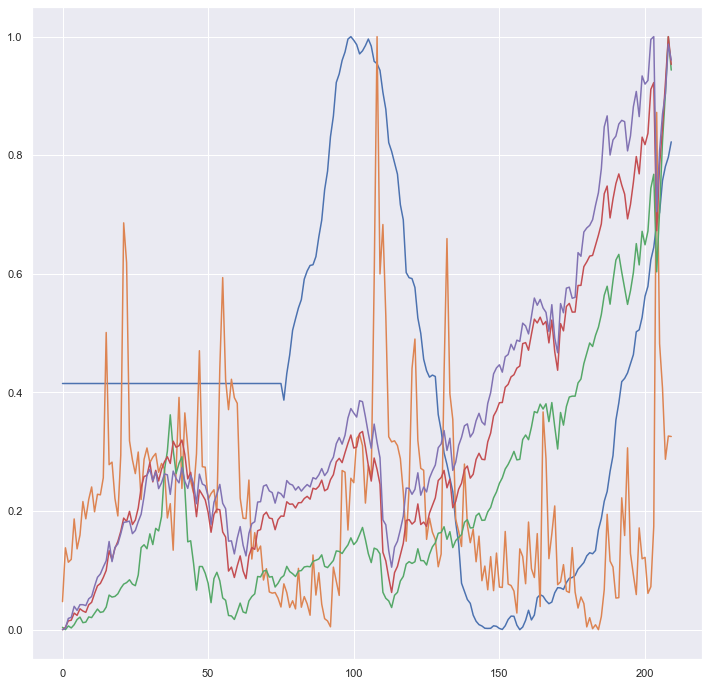

In [498]:
#Trying to predict home value in a given city using market indices.
# First, let's explore the data

xaxis = np.arange(0, len(zhvi_stocks['DOW Close']))

Boulder = zhvi_stocks['Boulder, Co']
NYC = zhvi_stocks['New York, NY']
LA = zhvi_stocks['Los Angeles, CA']
Chicago = zhvi_stocks['Chicago, IL']
DalFtWor = zhvi_stocks['Dallas-Fort Worth, TX']
VIX = zhvi_stocks['VIX Close']
NAS = zhvi_stocks['NAS Close']
SP = zhvi_stocks['SP Close']
DOW = zhvi_stocks['DOW Close']

plt.plot(xaxis, Boulder)
plt.plot(xaxis, VIX)
plt.plot(xaxis, NAS)
plt.plot(xaxis, SP)
plt.plot(xaxis, DOW)

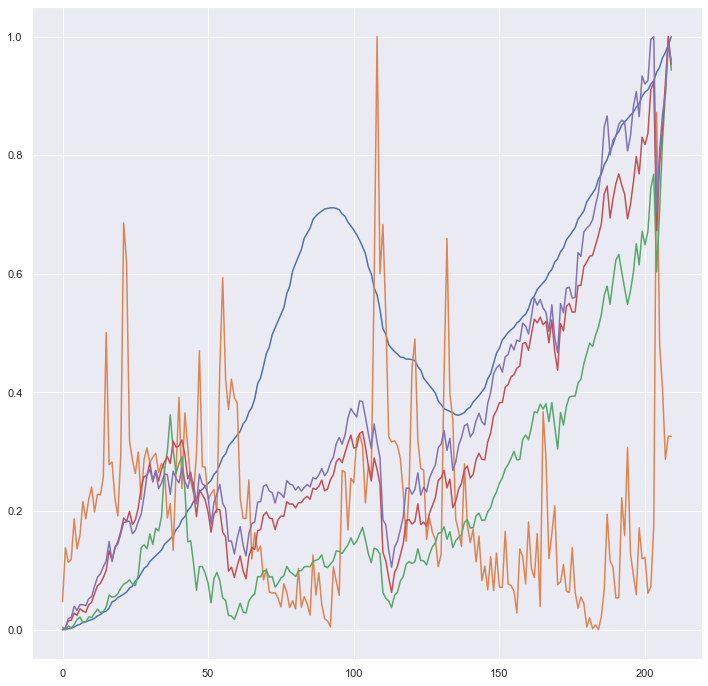

In [499]:
plt.plot(xaxis, NYC)
plt.plot(xaxis, VIX)
plt.plot(xaxis, NAS)
plt.plot(xaxis, SP)
plt.plot(xaxis, DOW)

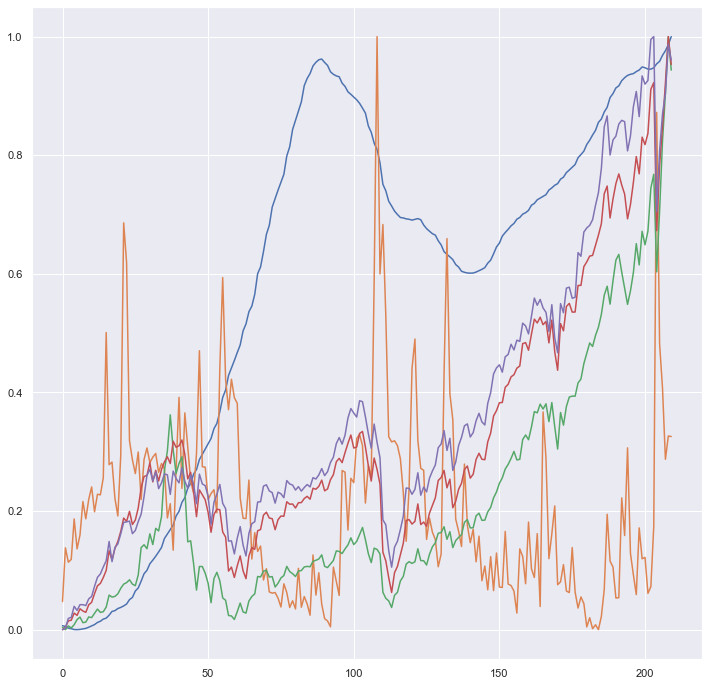

In [500]:
plt.plot(xaxis, LA)
plt.plot(xaxis, VIX)
plt.plot(xaxis, NAS)
plt.plot(xaxis, SP)
plt.plot(xaxis, DOW)

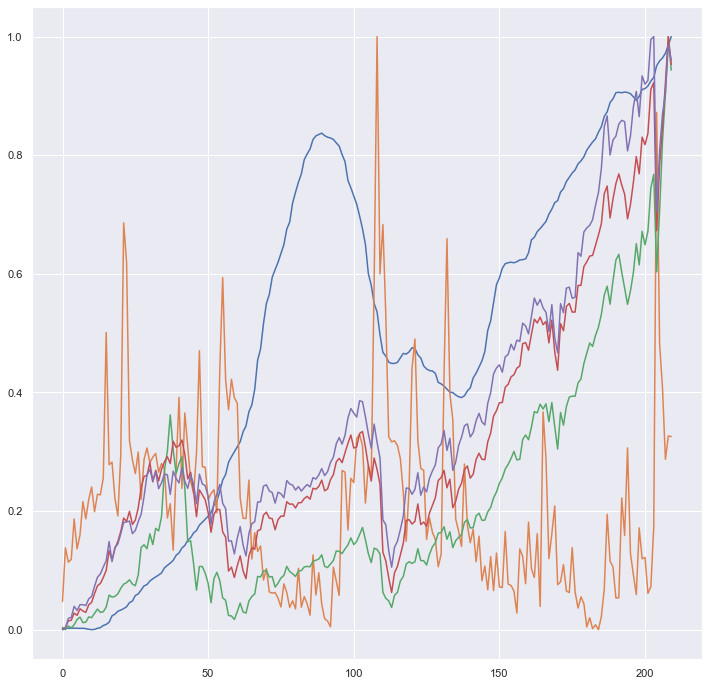

In [501]:
plt.plot(xaxis, Chicago)
plt.plot(xaxis, VIX)
plt.plot(xaxis, NAS)
plt.plot(xaxis, SP)
plt.plot(xaxis, DOW)

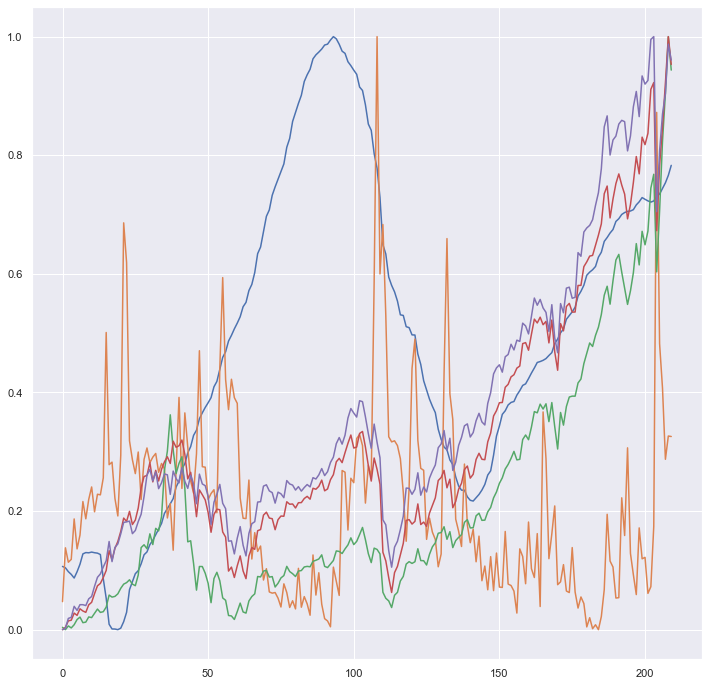

In [502]:
plt.plot(xaxis, DalFtWor)
plt.plot(xaxis, VIX)
plt.plot(xaxis, NAS)
plt.plot(xaxis, SP)
plt.plot(xaxis, DOW)

There seem to be a lot of lines trending similarly. Let's create a correlation matrix to see if we can drop some attributes.


In [503]:
zhvi_stocks.corr()

New York, NY  Los Angeles, CA  Chicago, IL  \
New York, NY               1.000000         0.957340     0.987667   
Los Angeles, CA            0.957340         1.000000     0.963886   
Chicago, IL                0.987667         0.963886     1.000000   
Dallas-Fort Worth, TX      0.825612         0.859862     0.821493   
Boulder, Co                0.166973         0.181735     0.091744   
VIX Open                  -0.236299        -0.239955    -0.322762   
VIX Close                 -0.244362        -0.246082    -0.331064   
NAS Open                   0.710331         0.517699     0.662534   
NAS Close                  0.709576         0.516990     0.661755   
SP Open                    0.769875         0.590270     0.732417   
SP Close                   0.769449         0.590198     0.732161   
DOW Open                   0.803315         0.641629     0.767349   
DOW Close                  0.803244         0.642005     0.767401   

                       Dallas-Fort Worth, TX  Boulder, Co  VIX Open  \
New York, NY                        0.825612     0.166973 -0.236299   
Los Angeles, CA                     0.859862     0.181735 -0.239955   
Chicago, IL                         0.821493     0.091744 -0.322762   
Dallas-Fort Worth, TX               1.000000     0.521738 -0.172127   
Boulder, Co                         0.521738     1.000000  0.367995   
VIX Open                           -0.172127     0.367995  1.000000   
VIX Close                          -0.184510     0.362565  0.992796   
NAS Open                            0.279250    -0.145103 -0.153563   
NAS Close                           0.278418    -0.145487 -0.155376   
SP Open                             0.353860    -0.158055 -0.192140   
SP Close                            0.352764    -0.159486 -0.194257   
DOW Open                            0.386495    -0.162637 -0.203764   
DOW Close                           0.385898    -0.163598 -0.206197   

                       VIX Close  NAS Open  NAS Close   SP Open  SP Close  \
New York, NY           -0.244362  0.710331   0.709576  0.769875  0.769449   
Los Angeles, CA        -0.246082  0.517699   0.516990  0.590270  0.590198   
Chicago, IL            -0.331064  0.662534   0.661755  0.732417  0.732161   
Dallas-Fort Worth, TX  -0.184510  0.279250   0.278418  0.353860  0.352764   
Boulder, Co             0.362565 -0.145103  -0.145487 -0.158055 -0.159486   
VIX Open                0.992796 -0.153563  -0.155376 -0.192140 -0.194257   
VIX Close               1.000000 -0.154932  -0.156943 -0.195498 -0.197858   
NAS Open               -0.154932  1.000000   0.999782  0.979450  0.979573   
NAS Close              -0.156943  0.999782   1.000000  0.979300  0.979659   
SP Open                -0.195498  0.979450   0.979300  1.000000  0.999827   
SP Close               -0.197858  0.979573   0.979659  0.999827  1.000000   
DOW Open               -0.207970  0.961669   0.961226  0.991043  0.990785   
DOW Close              -0.210654  0.961624   0.961499  0.991015  0.991115   

                       DOW Open  DOW Close  
New York, NY           0.803315   0.803244  
Los Angeles, CA        0.641629   0.642005  
Chicago, IL            0.767349   0.767401  
Dallas-Fort Worth, TX  0.386495   0.385898  
Boulder, Co           -0.162637  -0.163598  
VIX Open              -0.203764  -0.206197  
VIX Close             -0.207970  -0.210654  
NAS Open               0.961669   0.961624  
NAS Close              0.961226   0.961499  
SP Open                0.991043   0.991015  
SP Close               0.990785   0.991115  
DOW Open               1.000000   0.999733  
DOW Close              0.999733   1.000000

<AxesSubplot:>

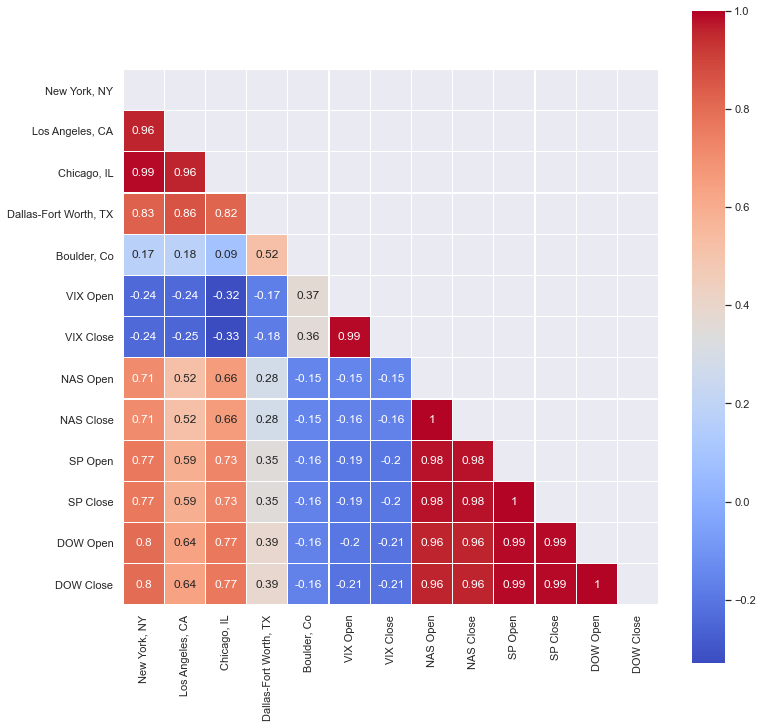

In [504]:
#https://seaborn.pydata.org/examples/many_pairwise_correlations.html
# Generate the correlation Matrix
corr=zhvi_stocks.corr()

# Generate the mask to remove redundant graphing of the upper triangle.
mask = np.triu(np.ones_like(corr, dtype=bool))

sns.set(rc={'figure.figsize': (12,12)})
sns.heatmap(zhvi_stocks.corr().round(2), mask=mask, cmap="coolwarm",
            square=True, linewidths=.25, annot=True)

From the correlation matrix we can see that the various stock indices are highly correlated as well as the open and close prices.

Let's remove those attributes as they are redundant. Open and close are 99%+ correlated, so we'll remove open and stick with close.

Since the NAS, SP, and DOW are also all highly correlated (96%+), we'll remove NAS and SP and only keep DOW.


In [505]:
# Remove redundant attributes.
zhvi_stocks.drop(['VIX Open', 'NAS Open', 'NAS Close', 'SP Open', 'SP Close', 'DOW Open'], axis = 1,inplace = True)
print(zhvi_stocks.head())

   New York, NY  Los Angeles, CA  Chicago, IL  Dallas-Fort Worth, TX  \
0      0.000000         0.006691     0.001686               0.106593   
1      0.000177         0.005281     0.002171               0.104295   
2      0.001340         0.002676     0.002411               0.097810   
3      0.002279         0.001654     0.002362               0.093191   
4      0.004498         0.000151     0.002603               0.087034   

   Boulder, Co  VIX Close  DOW Close  
0     0.415064   0.047274   0.000000  
1     0.415064   0.138000   0.002364  
2     0.415064   0.113659   0.018948  
3     0.415064   0.118487   0.020691  
4     0.415064   0.186683   0.039332  


Now that we've trimmed some of those columns, let's regenerate the correlation matrix to make sure there's nothing else to remove.

In [506]:
zhvi_stocks.corr()

New York, NY  Los Angeles, CA  Chicago, IL  \
New York, NY               1.000000         0.957340     0.987667   
Los Angeles, CA            0.957340         1.000000     0.963886   
Chicago, IL                0.987667         0.963886     1.000000   
Dallas-Fort Worth, TX      0.825612         0.859862     0.821493   
Boulder, Co                0.166973         0.181735     0.091744   
VIX Close                 -0.244362        -0.246082    -0.331064   
DOW Close                  0.803244         0.642005     0.767401   

                       Dallas-Fort Worth, TX  Boulder, Co  VIX Close  \
New York, NY                        0.825612     0.166973  -0.244362   
Los Angeles, CA                     0.859862     0.181735  -0.246082   
Chicago, IL                         0.821493     0.091744  -0.331064   
Dallas-Fort Worth, TX               1.000000     0.521738  -0.184510   
Boulder, Co                         0.521738     1.000000   0.362565   
VIX Close                          -0.184510     0.362565   1.000000   
DOW Close                           0.385898    -0.163598  -0.210654   

                       DOW Close  
New York, NY            0.803244  
Los Angeles, CA         0.642005  
Chicago, IL             0.767401  
Dallas-Fort Worth, TX   0.385898  
Boulder, Co            -0.163598  
VIX Close              -0.210654  
DOW Close               1.000000

<AxesSubplot:>

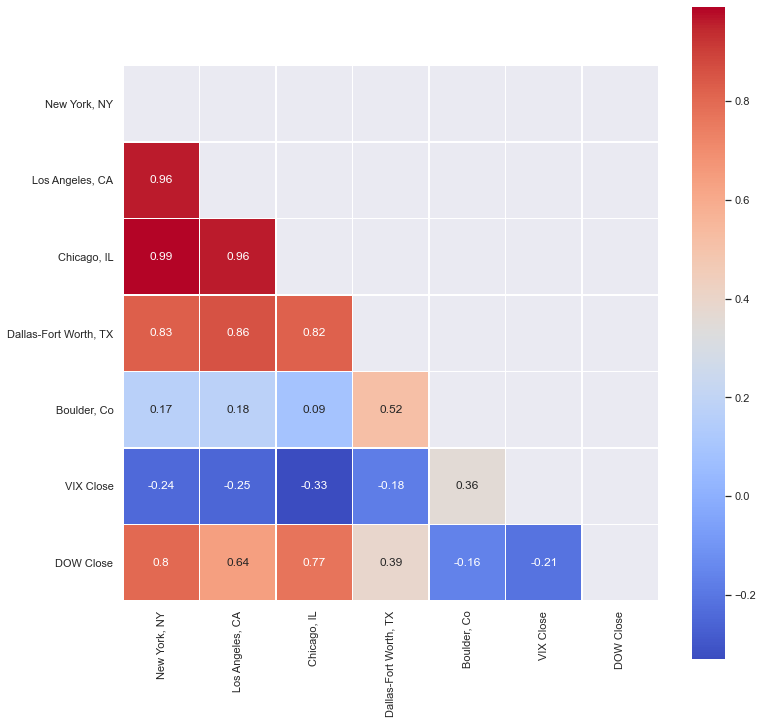

In [507]:
#https://seaborn.pydata.org/examples/many_pairwise_correlations.html
# Generate the correlation Matrix
corr=zhvi_stocks.corr()

# Generate the mask to remove redundant graphing of the upper triangle.
mask = np.triu(np.ones_like(corr, dtype=bool))

sns.set(rc={'figure.figsize': (12,12)})
sns.heatmap(zhvi_stocks.corr().round(2), mask=mask, cmap="coolwarm",
            square=True, linewidths=.25, annot=True)

No correlation between the VIX and any of the cities, but some of the cities seem to have some correlation with the DOW.
The more densely populated cities, such as NYC and Chicago, correlate more than the less densely populated cities such as Boulder.

The way the data was cleaned for Boulder may be causing some correlation problems (using mean for missing values).

## Regression Modeling
Now let's build a model. We'll use a dummy regression as a sample baseline, and then run the linear regression.

### DOW vs New York

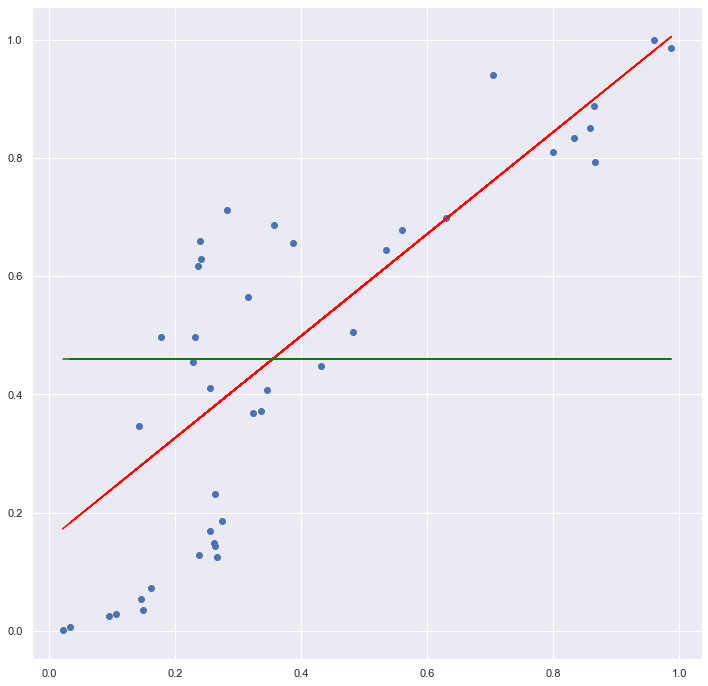

Dummy R Squared:  -6.854708423098543e-08
Dummy Mean Absolute Error:  0.2613101336045201
Dummy Mean Squared Error:  0.09176850445744238
Dummy Root Mean Squared Error:  0.3029331683019249 

R Squared:  0.6837176091498404
Mean Absolute Error:  0.14391469799157633
Mean Squared Error:  0.029024760004980738
Root Mean Squared Error:  0.1703665460264448


In [508]:
# Splitting the data into 80% train and 20% test
X = DOW.values.reshape(-1, 1)  # values converts it into a numpy array
Y = NYC.values.reshape(-1, 1)  # -1 means that calculate the dimension of rows, but have 1 column
X_train,X_test,Y_train,Y_test = train_test_split(X,Y,test_size=0.2)

#Generate the dummy regression.
dummy_regressorNYC = DummyRegressor(strategy="mean")
dummy_regressorNYC.fit(X_train, Y_train)
dummy_Y_predNYC = dummy_regressorNYC.predict(X_test)


# Generate the linear regression.
linear_regressorNYC = LinearRegression()  # create object for the class
linear_regressorNYC.fit(X_train, Y_train)  # perform linear regression
Y_predNYC = linear_regressorNYC.predict(X_test)  # make predictions

# Plot the results.
plt.scatter(X_test, Y_test)
plt.plot(X_test, Y_predNYC, color='red')
plt.plot(X_test, dummy_Y_predNYC, color='green')
plt.show()

# Display the evaluation metrics.
print("Dummy R Squared: ",r2_score(Y_test,dummy_Y_predNYC))
print("Dummy Mean Absolute Error: ",metrics.mean_absolute_error (Y_test, dummy_Y_predNYC))
print("Dummy Mean Squared Error: ",metrics.mean_squared_error(Y_test, dummy_Y_predNYC))
print("Dummy Root Mean Squared Error: ",np.sqrt(metrics.mean_squared_error(Y_test, dummy_Y_predNYC)), '\n')

print("R Squared: ",r2_score(Y_test,Y_predNYC))
print("Mean Absolute Error: ",metrics.mean_absolute_error (Y_test, Y_predNYC))
print("Mean Squared Error: ",metrics.mean_squared_error(Y_test, Y_predNYC))
print("Root Mean Squared Error: ",np.sqrt(metrics.mean_squared_error(Y_test, Y_predNYC)))

dummyNYC_scores={"Model":[],"r2":[],"mse":[],"rmse":[]}
NYC_scores={"Model":[],"r2":[],"mse":[],"rmse":[]}
dummyNYC_scores["Model"].append("NYC Baseline")
dummyNYC_scores["r2"].append(dummy_regressorNYC.score(X_train, Y_train))
dummyNYC_scores["mse"].append(metrics.mean_squared_error(Y_test, dummy_Y_predNYC))
dummyNYC_scores["rmse"].append(np.sqrt(metrics.mean_squared_error(Y_test, dummy_Y_predNYC)))                    
NYC_scores["Model"].append("NYC Linear Regression")
NYC_scores["r2"].append(r2_score(Y_test,Y_predNYC))
NYC_scores["mse"].append(metrics.mean_squared_error(Y_test, Y_predNYC))
NYC_scores["rmse"].append(np.sqrt(metrics.mean_squared_error(Y_test, Y_predNYC)))

### DOW vs Chicago

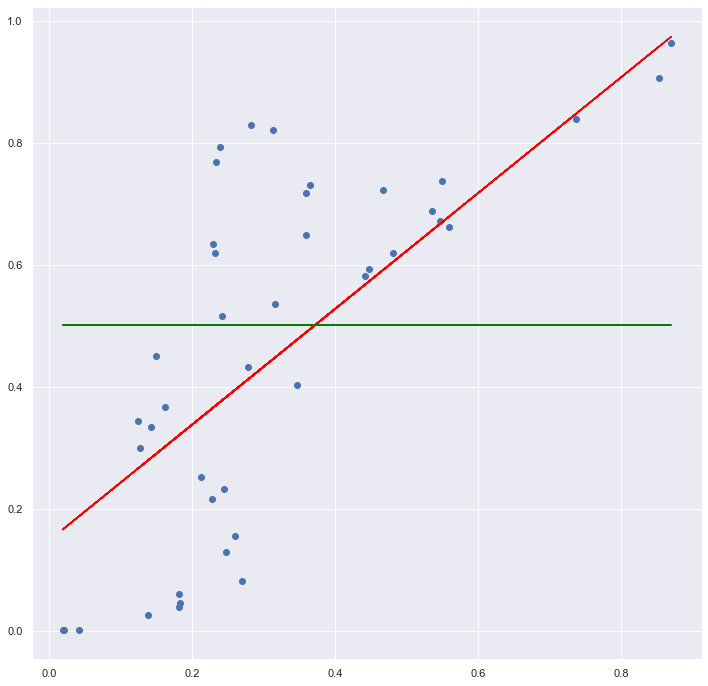

Dummy R Squared:  -0.016711931142164183
Dummy Mean Absolute Error:  0.2552801146440156
Dummy Mean Squared Error:  0.08576985167834864
Dummy Root Mean Squared Error:  0.2928649034595109 

R Squared:  0.5288707761848543
Mean Absolute Error:  0.15776207866310119
Mean Squared Error:  0.03974447669023205
Root Mean Squared Error:  0.199360168263954


In [509]:
# DOW and Chicago below
X = DOW.values.reshape(-1, 1)  # values converts it into a numpy array
Y = Chicago.values.reshape(-1, 1)  # -1 means that calculate the dimension of rows, but have 1 column
X_train,X_test,Y_train,Y_test = train_test_split(X,Y,test_size=0.2)

#Generate the dummy regression.
dummy_regressorCHI = DummyRegressor(strategy="mean")
dummy_regressorCHI.fit(X_train, Y_train)
dummy_Y_predCHI = dummy_regressorCHI.predict(X_test)

# Generate the linear regression.
linear_regressorCHI = LinearRegression()  # create object for the class
linear_regressorCHI.fit(X_train, Y_train)  # perform linear regression
Y_predCHI = linear_regressorCHI.predict(X_test)  # make predictions

# Plot the results.
plt.scatter(X_test, Y_test)
plt.plot(X_test, Y_predCHI, color='red')
plt.plot(X_test, dummy_Y_predCHI, color='green')
plt.show()

# Display the evaluation metrics.
print("Dummy R Squared: ",r2_score(Y_test,dummy_Y_predCHI))
print("Dummy Mean Absolute Error: ",metrics.mean_absolute_error (Y_test, dummy_Y_predCHI))
print("Dummy Mean Squared Error: ",metrics.mean_squared_error(Y_test, dummy_Y_predCHI))
print("Dummy Root Mean Squared Error: ",np.sqrt(metrics.mean_squared_error(Y_test, dummy_Y_predCHI)), '\n')

print("R Squared: ",r2_score(Y_test,Y_predCHI))
print("Mean Absolute Error: ",metrics.mean_absolute_error (Y_test, Y_predCHI))
print("Mean Squared Error: ",metrics.mean_squared_error(Y_test, Y_predCHI))
print("Root Mean Squared Error: ",np.sqrt(metrics.mean_squared_error(Y_test, Y_predCHI)))

dummyCHI_scores={"Model":[],"r2":[],"mse":[],"rmse":[]}
CHI_scores={"Model":[],"r2":[],"mse":[],"rmse":[]}
dummyCHI_scores["Model"].append("CHI Baseline")
dummyCHI_scores["r2"].append(dummy_regressorCHI.score(X_train, Y_train))
dummyCHI_scores["mse"].append(metrics.mean_squared_error(Y_test, dummy_Y_predCHI))
dummyCHI_scores["rmse"].append(np.sqrt(metrics.mean_squared_error(Y_test, dummy_Y_predCHI))) 
CHI_scores["Model"].append("CHI Linear Regression")
CHI_scores["r2"].append(r2_score(Y_test,Y_predCHI))
CHI_scores["mse"].append(metrics.mean_squared_error(Y_test, Y_predCHI))
CHI_scores["rmse"].append(np.sqrt(metrics.mean_squared_error(Y_test, Y_predCHI)))

### DOW vs Los Angeles

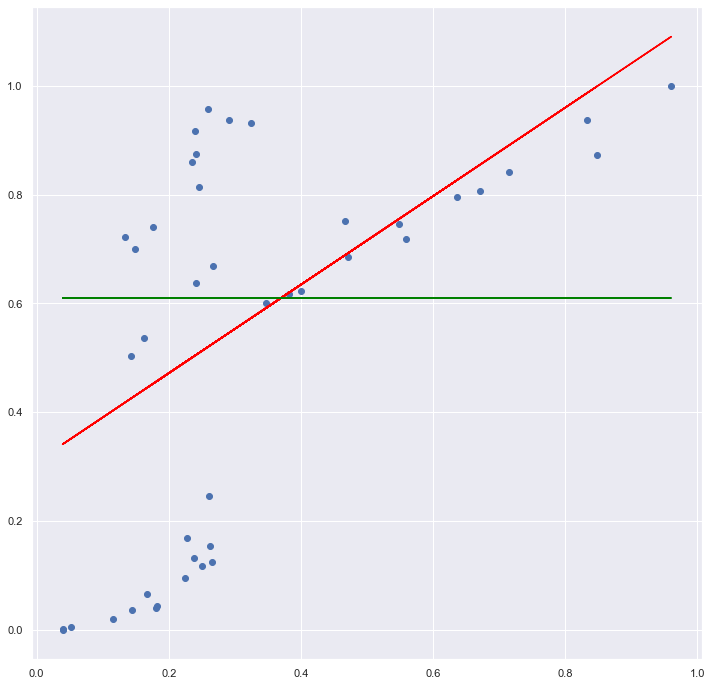

Dummy R Squared:  -0.059003127257006405
Dummy Mean Absolute Error:  0.3002595483333715
Dummy Mean Squared Error:  0.1286712819617928
Dummy Root Mean Squared Error:  0.3587077946766599 

R Squared:  0.33129545075171984
Mean Absolute Error:  0.2388062886230665
Mean Squared Error:  0.08124911946985919
Root Mean Squared Error:  0.2850423117185573


In [510]:
# DOW and LA below
X = DOW.values.reshape(-1, 1)  # values converts it into a numpy array
Y = LA.values.reshape(-1, 1)  # -1 means that calculate the dimension of rows, but have 1 column
X_train,X_test,Y_train,Y_test = train_test_split(X,Y,test_size=0.2)

#Generate the dummy regression.
dummy_regressorLA = DummyRegressor(strategy="mean")
dummy_regressorLA.fit(X_train, Y_train)
dummy_Y_predLA = dummy_regressorLA.predict(X_test)

# Generate the linear regression.
linear_regressorLA = LinearRegression()  # create object for the class
linear_regressorLA.fit(X_train, Y_train)  # perform linear regression
Y_predLA = linear_regressorLA.predict(X_test)  # make predictions

# Plot the results.
plt.scatter(X_test, Y_test)
plt.plot(X_test, Y_predLA, color='red')
plt.plot(X_test, dummy_Y_predLA, color='green')
plt.show()

# Display the evaluation metrics.
print("Dummy R Squared: ",r2_score(Y_test,dummy_Y_predLA))
print("Dummy Mean Absolute Error: ",metrics.mean_absolute_error (Y_test, dummy_Y_predLA))
print("Dummy Mean Squared Error: ",metrics.mean_squared_error(Y_test, dummy_Y_predLA))
print("Dummy Root Mean Squared Error: ",np.sqrt(metrics.mean_squared_error(Y_test, dummy_Y_predLA)), '\n')

print("R Squared: ",r2_score(Y_test,Y_predLA))
print("Mean Absolute Error: ",metrics.mean_absolute_error (Y_test, Y_predLA))
print("Mean Squared Error: ",metrics.mean_squared_error(Y_test, Y_predLA))
print("Root Mean Squared Error: ",np.sqrt(metrics.mean_squared_error(Y_test, Y_predLA)))

dummyLA_scores={"Model":[],"r2":[],"mse":[],"rmse":[]}
LA_scores={"Model":[],"r2":[],"mse":[],"rmse":[]}
dummyLA_scores["Model"].append("LA Baseline")
dummyLA_scores["r2"].append(dummy_regressorLA.score(X_train, Y_train))
dummyLA_scores["mse"].append(metrics.mean_squared_error(Y_test, dummy_Y_predLA))
dummyLA_scores["rmse"].append(np.sqrt(metrics.mean_squared_error(Y_test, dummy_Y_predLA)))  
LA_scores["Model"].append("LA Linear Regression")
LA_scores["r2"].append(r2_score(Y_test,Y_predLA))
LA_scores["mse"].append(metrics.mean_squared_error(Y_test, Y_predLA))
LA_scores["rmse"].append(np.sqrt(metrics.mean_squared_error(Y_test, Y_predLA)))

### DOW vs Boulder

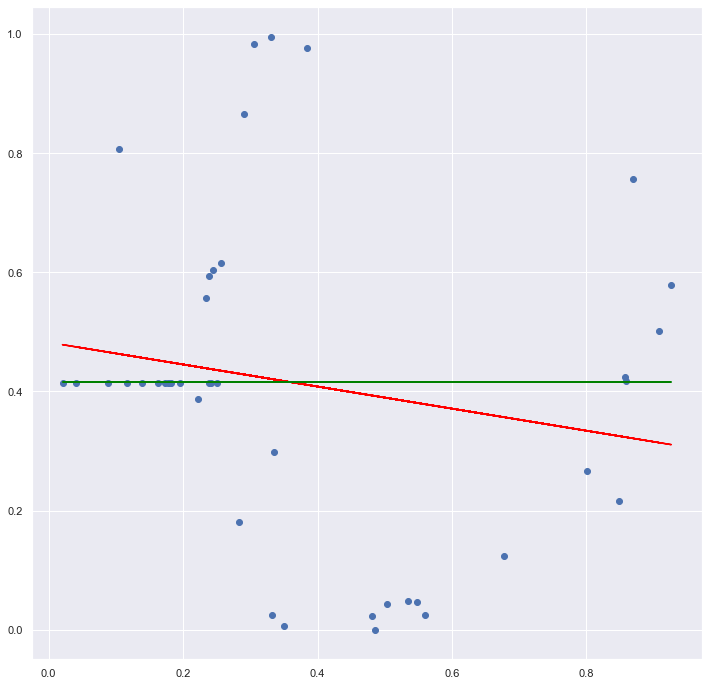

Dummy R Squared:  -0.0007776641697414544
Dummy Mean Absolute Error:  0.19068197964414557
Dummy Mean Squared Error:  0.07223771666978765
Dummy Root Mean Squared Error:  0.26877075114265625 

R Squared:  0.028869935223740595
Mean Absolute Error:  0.20223295149847725
Mean Squared Error:  0.07009770599448698
Root Mean Squared Error:  0.26475971369241014


In [511]:
# DOW and Boulder below
X = DOW.values.reshape(-1, 1)  # values converts it into a numpy array
Y = Boulder.values.reshape(-1, 1)  # -1 means that calculate the dimension of rows, but have 1 column
X_train,X_test,Y_train,Y_test = train_test_split(X,Y,test_size=0.2)

#Generate the dummy regression.
dummy_regressorBOU = DummyRegressor(strategy="mean")
dummy_regressorBOU.fit(X_train, Y_train)
dummy_Y_predBOU = dummy_regressorBOU.predict(X_test)

# Generate the linear regression.
linear_regressorBOU = LinearRegression()  # create object for the class
linear_regressorBOU.fit(X_train, Y_train)  # perform linear regression
Y_predBOU = linear_regressorBOU.predict(X_test)  # make predictions

# Plot the results.
plt.scatter(X_test, Y_test)
plt.plot(X_test, Y_predBOU, color='red')
plt.plot(X_test, dummy_Y_predBOU, color='green')
plt.show()

# Display the evaluation metrics.
print("Dummy R Squared: ",r2_score(Y_test,dummy_Y_predBOU))
print("Dummy Mean Absolute Error: ",metrics.mean_absolute_error (Y_test, dummy_Y_predBOU))
print("Dummy Mean Squared Error: ",metrics.mean_squared_error(Y_test, dummy_Y_predBOU))
print("Dummy Root Mean Squared Error: ",np.sqrt(metrics.mean_squared_error(Y_test, dummy_Y_predBOU)), '\n')

print("R Squared: ",r2_score(Y_test,Y_predBOU))
print("Mean Absolute Error: ",metrics.mean_absolute_error (Y_test, Y_predBOU))
print("Mean Squared Error: ",metrics.mean_squared_error(Y_test, Y_predBOU))
print("Root Mean Squared Error: ",np.sqrt(metrics.mean_squared_error(Y_test, Y_predBOU)))

dummyBOU_scores={"Model":[],"r2":[],"mse":[],"rmse":[]}
BOU_scores={"Model":[],"r2":[],"mse":[],"rmse":[]}
dummyBOU_scores["Model"].append("BOU Baseline")
dummyBOU_scores["r2"].append(dummy_regressorBOU.score(X_train, Y_train))
dummyBOU_scores["mse"].append(metrics.mean_squared_error(Y_test, dummy_Y_predBOU))
dummyBOU_scores["rmse"].append(np.sqrt(metrics.mean_squared_error(Y_test, dummy_Y_predBOU)))
BOU_scores["Model"].append("BOU Linear Regression")
BOU_scores["r2"].append(r2_score(Y_test,Y_predBOU))
BOU_scores["mse"].append(metrics.mean_squared_error(Y_test, Y_predBOU))
BOU_scores["rmse"].append(np.sqrt(metrics.mean_squared_error(Y_test, Y_predBOU)))

The correlation was low, so these bad results are no surprise.

### DOW vs Dallas-Fort Worth

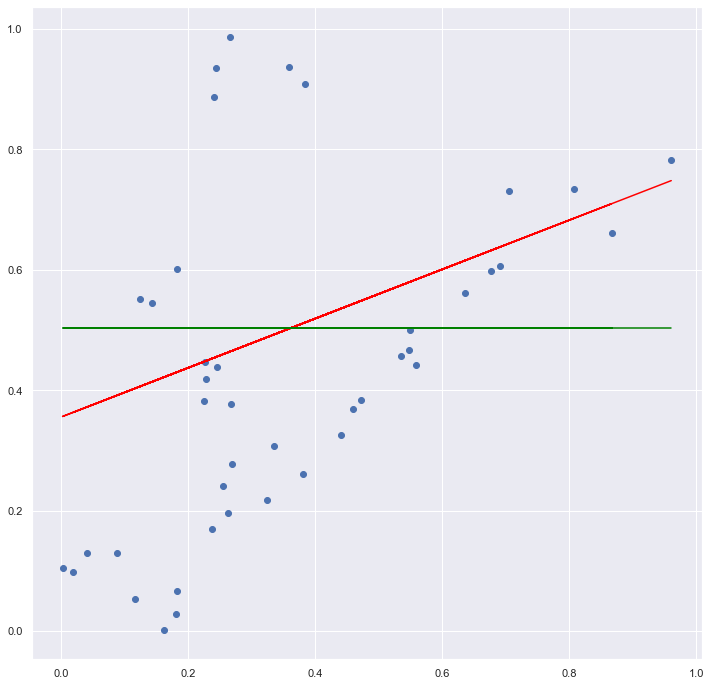

Dummy R Squared:  -0.06173148950278762
Dummy Mean Absolute Error:  0.23280972929366733
Dummy Mean Squared Error:  0.07757900549541703
Dummy Root Mean Squared Error:  0.27853008005495034 

R Squared:  0.16967198532205263
Mean Absolute Error:  0.20173626693004548
Mean Squared Error:  0.06067072725126145
Root Mean Squared Error:  0.24631428552006773


In [512]:
# DOW and DalFtWor below
X = DOW.values.reshape(-1, 1)  # values converts it into a numpy array
Y = DalFtWor.values.reshape(-1, 1)  # -1 means that calculate the dimension of rows, but have 1 column
X_train,X_test,Y_train,Y_test = train_test_split(X,Y,test_size=0.2)

#Generate the dummy regression.
dummy_regressorDFW = DummyRegressor(strategy="mean")
dummy_regressorDFW.fit(X_train, Y_train)
dummy_Y_predDFW = dummy_regressorDFW.predict(X_test)

# Generate the linear regression.
linear_regressorDFW = LinearRegression()  # create object for the class
linear_regressorDFW.fit(X_train, Y_train)  # perform linear regression
Y_predDFW = linear_regressorDFW.predict(X_test)  # make predictions

# Plot the results.
plt.scatter(X_test, Y_test)
plt.plot(X_test, Y_predDFW, color='red')
plt.plot(X_test, dummy_Y_predDFW, color='green')
plt.show()

# Display the evaluation metrics.
print("Dummy R Squared: ",r2_score(Y_test,dummy_Y_predDFW))
print("Dummy Mean Absolute Error: ",metrics.mean_absolute_error (Y_test, dummy_Y_predDFW))
print("Dummy Mean Squared Error: ",metrics.mean_squared_error(Y_test, dummy_Y_predDFW))
print("Dummy Root Mean Squared Error: ",np.sqrt(metrics.mean_squared_error(Y_test, dummy_Y_predDFW)), '\n')

print("R Squared: ",r2_score(Y_test,Y_predDFW))
print("Mean Absolute Error: ",metrics.mean_absolute_error (Y_test, Y_predDFW))
print("Mean Squared Error: ",metrics.mean_squared_error(Y_test, Y_predDFW))
print("Root Mean Squared Error: ",np.sqrt(metrics.mean_squared_error(Y_test, Y_predDFW)))

dummyDFW_scores={"Model":[],"r2":[],"mse":[],"rmse":[]}
DFW_scores={"Model":[],"r2":[],"mse":[],"rmse":[]}
dummyDFW_scores["Model"].append("DFW Baseline")
dummyDFW_scores["r2"].append(dummy_regressorDFW.score(X_train, Y_train))
dummyDFW_scores["mse"].append(metrics.mean_squared_error(Y_test, dummy_Y_predDFW))
dummyDFW_scores["rmse"].append(np.sqrt(metrics.mean_squared_error(Y_test, dummy_Y_predDFW)))
DFW_scores["Model"].append("DFW Linear Regression")
DFW_scores["r2"].append(r2_score(Y_test,Y_predDFW))
DFW_scores["mse"].append(metrics.mean_squared_error(Y_test, Y_predDFW))
DFW_scores["rmse"].append(np.sqrt(metrics.mean_squared_error(Y_test, Y_predDFW)))

The correlation was low, so these bad results are no surprise.

Better results for NYC and Chicago were expected given correlation at 70-80%.

In [513]:
metricsdf = pd.DataFrame([dummyNYC_scores, NYC_scores, dummyCHI_scores, CHI_scores, dummyLA_scores, LA_scores, dummyBOU_scores, BOU_scores, dummyDFW_scores, DFW_scores])
metricsdf['Model'] = metricsdf['Model'].str[0]
metricsdf['r2'] = metricsdf['r2'].str[0]
metricsdf['mse'] = metricsdf['mse'].str[0]
metricsdf['rmse'] = metricsdf['rmse'].str[0]
metricsdf = metricsdf.set_index("Model")
print(metricsdf)

                             r2       mse      rmse
Model                                              
NYC Baseline           0.000000  0.091769  0.302933
NYC Linear Regression  0.683718  0.029025  0.170367
CHI Baseline           0.000000  0.085770  0.292865
CHI Linear Regression  0.528871  0.039744  0.199360
LA Baseline            0.000000  0.128671  0.358708
LA Linear Regression   0.331295  0.081249  0.285042
BOU Baseline           0.000000  0.072238  0.268771
BOU Linear Regression  0.028870  0.070098  0.264760
DFW Baseline           0.000000  0.077579  0.278530
DFW Linear Regression  0.169672  0.060671  0.246314


 Could the inflated housing values leading up to the 2008 crash be to blame?

## Further Data Exploration and Cleaning
Removing period in the middle of the data - 1/31/2005 to 12/31/2009 due to housing bubble which was historically an outlier due to overly inflated home values.

In [514]:
# Removing possible outliers.
ZillowDataFiltered = zhvi_stocks.drop(zhvi_stocks.index[[np.arange(78, 121)]]) # Chose these indices by visual inspection of previous plots/data
print("Number of instances before filtering: ",len(zhvi_stocks))
print("Number of instances after filtering: ",len(ZillowDataFiltered))

Number of instances before filtering:  210
Number of instances after filtering:  167


C:\Users\joesh\anaconda3\lib\site-packages\pandas\core\indexes\base.py:4111: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  result = getitem(key)


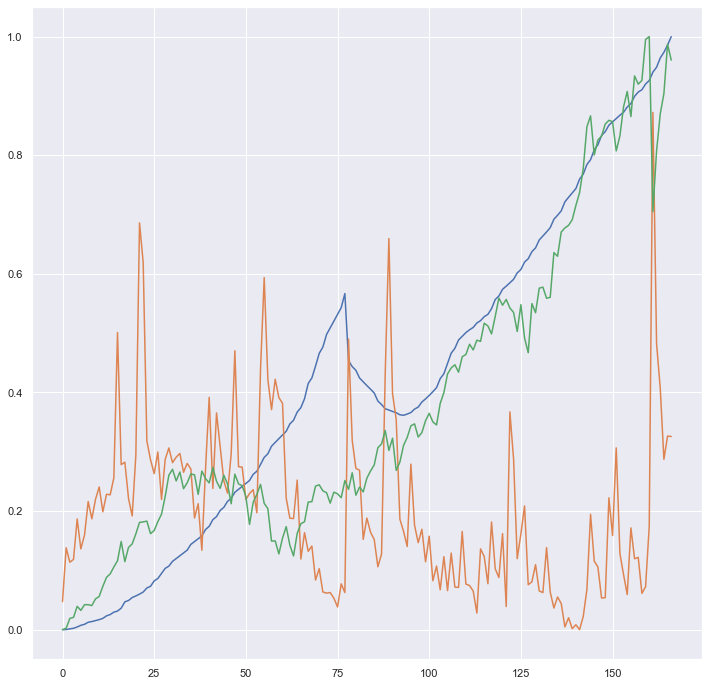

In [515]:
# Regenerating plot variables with filtered data
xaxis1 = np.arange(0, len(ZillowDataFiltered['DOW Close']))

Boulder1 = ZillowDataFiltered['Boulder, Co']
NYC1 = ZillowDataFiltered['New York, NY']
LA1 = ZillowDataFiltered['Los Angeles, CA']
Chicago1 = ZillowDataFiltered['Chicago, IL']
DalFtWor1 = ZillowDataFiltered['Dallas-Fort Worth, TX']

VIX1 = ZillowDataFiltered['VIX Close']
DOW1 = ZillowDataFiltered['DOW Close']

# Explore the filtered data for NYC.
plt.plot(xaxis1, NYC1)
plt.plot(xaxis1, VIX1)
plt.plot(xaxis1, DOW1)

Hmm, that seems to show some promise. Let's do it for the rest now.

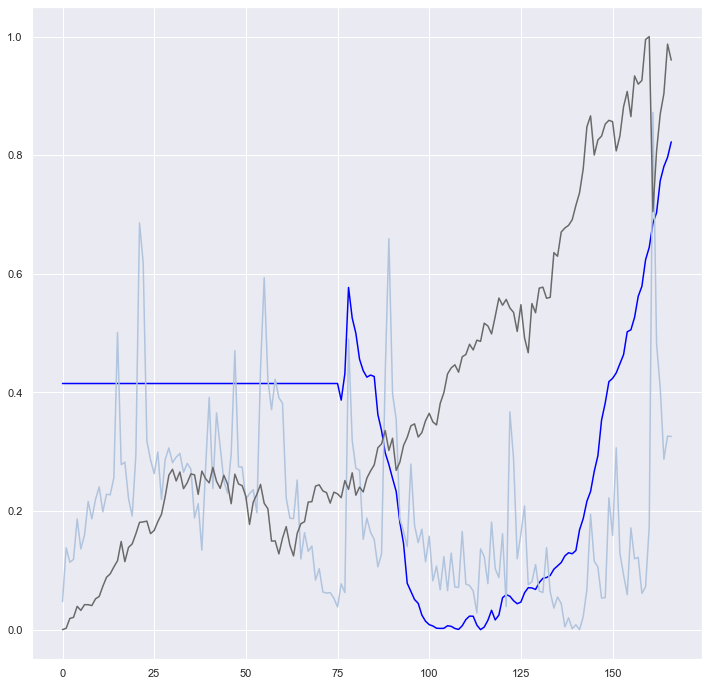

In [516]:
# Explore the filtered data for Boulder.
plt.plot(xaxis1, Boulder1, color="blue")
plt.plot(xaxis1, VIX1, color="lightsteelblue")
plt.plot(xaxis1, DOW1, color="dimgray")

The above doesn't look quite as good, but there wasn't much data available before 2008 for Boulder, and replacing missing data with the mean may be causing unexpected results.

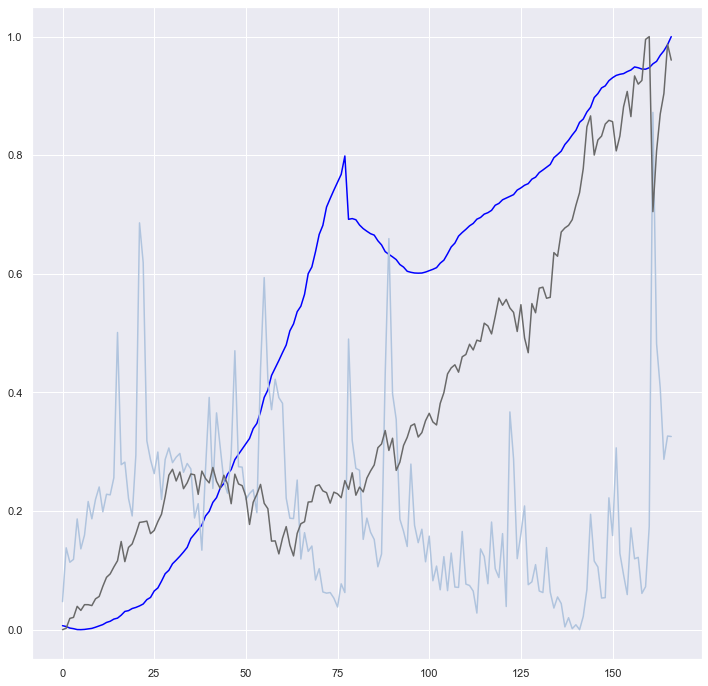

In [517]:
# Explore the filtered data for LA.
plt.plot(xaxis1, LA1, color="blue")
plt.plot(xaxis1, VIX1, color="lightsteelblue")
plt.plot(xaxis1, DOW1, color="dimgray")

LA home values above seem to have skyrocketed after 2008.

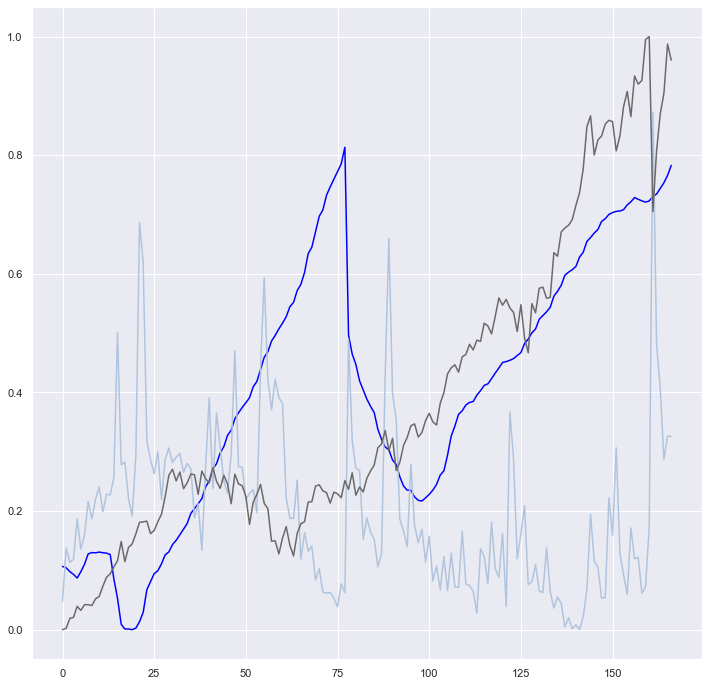

In [518]:
# Explore the filtered data for Dallas-Fort Worth.
plt.plot(xaxis1, DalFtWor1, color="blue")
plt.plot(xaxis1, VIX1, color="lightsteelblue")
plt.plot(xaxis1, DOW1, color="dimgray")

Dallas-Fort Worth home values seem to be pretty in line with stock values aside from the few years in the early 2000s leading to the housing market bubble.

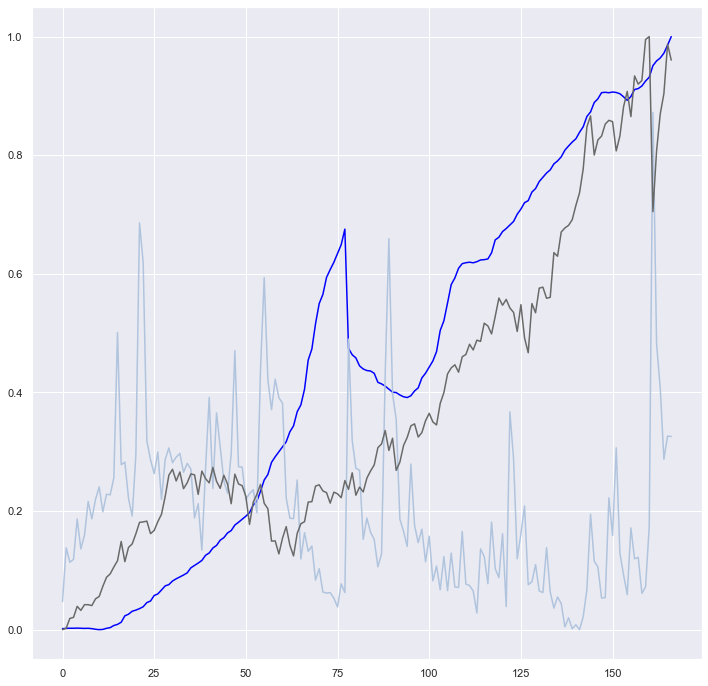

In [519]:
# Explore the filtered data for Chicago.
plt.plot(xaxis1, Chicago1, color="blue")
plt.plot(xaxis1, VIX1, color="lightsteelblue")
plt.plot(xaxis1, DOW1, color="dimgray")

Chicago home values also seem to have jumped in price since 2008, but not as much as LA.

Now let's do some more regression on the filtered data to see if its improved at all with some of the housing bubble removed.

### DOW vs New York

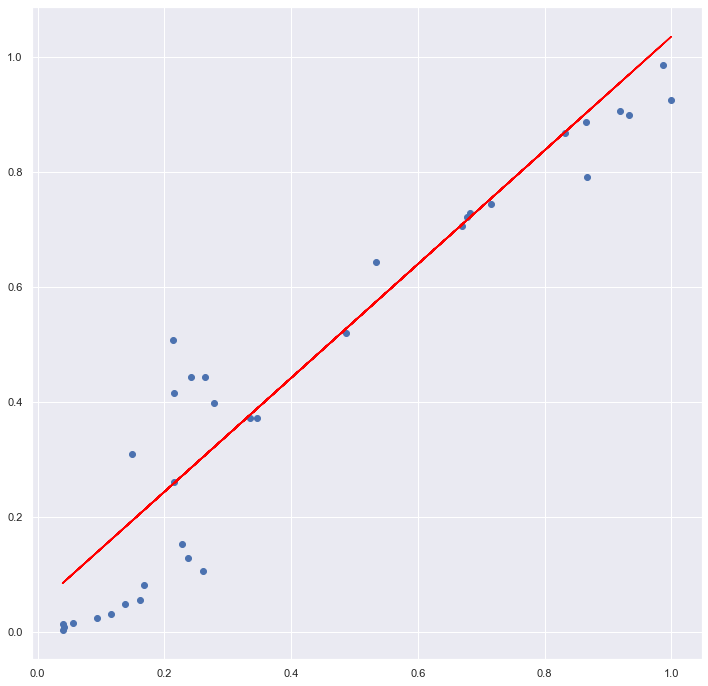

R Squared:  0.8978466531802871
Mean Absolute Error:  0.08417388276628116
Mean Squared Error:  0.011102791381031514
Root Mean Squared Error:  0.10536978400391411


In [520]:
#DOW and NYC
X = DOW1.values.reshape(-1, 1)  # values converts it into a numpy array
Y = NYC1.values.reshape(-1, 1)  # -1 means that calculate the dimension of rows, but have 1 column
X_train,X_test,Y_train,Y_test = train_test_split(X,Y,test_size=0.2)

# Generate the linear regression.
linear_regressor = LinearRegression()  # create object for the class
linear_regressor.fit(X_train, Y_train)  # perform linear regression
Y_pred = linear_regressor.predict(X_test)  # make predictions

# Plot the results.
plt.scatter(X_test, Y_test)
plt.plot(X_test, Y_pred, color='red')
plt.show()

# Display the evaluation metrics.
print("R Squared: ",r2_score(Y_test,Y_pred))
print("Mean Absolute Error: ",metrics.mean_absolute_error (Y_test, Y_pred))
print("Mean Squared Error: ",metrics.mean_squared_error(Y_test, Y_pred))
print("Root Mean Squared Error: ",np.sqrt(metrics.mean_squared_error(Y_test, Y_pred)))

### DOW vs Chicago

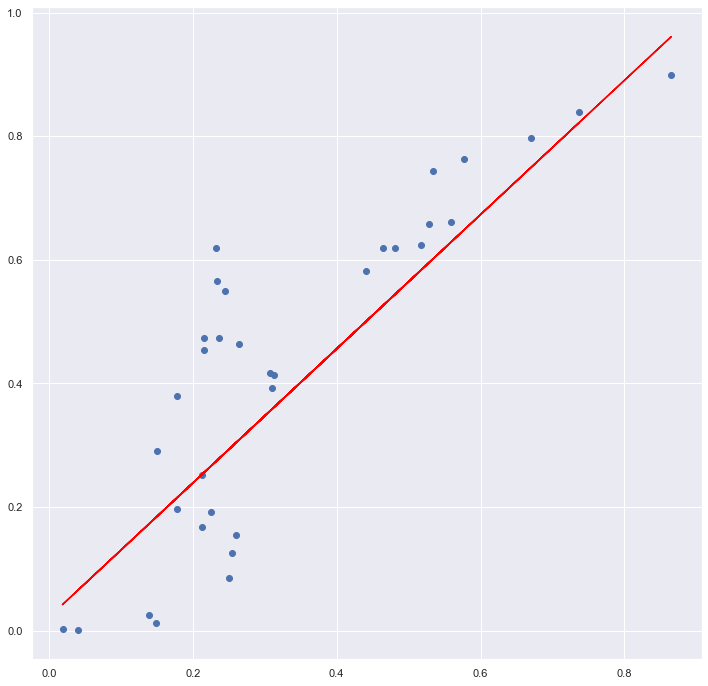

R Squared:  0.6915789257178466
Mean Absolute Error:  0.11709709175403667
Mean Squared Error:  0.020580535531751095
Root Mean Squared Error:  0.14345917723084534


In [521]:
#DOW and Chicago
X = DOW1.values.reshape(-1, 1)  # values converts it into a numpy array
Y = Chicago1.values.reshape(-1, 1)  # -1 means that calculate the dimension of rows, but have 1 column
X_train,X_test,Y_train,Y_test = train_test_split(X,Y,test_size=0.2)

# Generate the linear regression.
linear_regressor = LinearRegression()  # create object for the class
linear_regressor.fit(X_train, Y_train)  # perform linear regression
Y_pred = linear_regressor.predict(X_test)  # make predictions

# Plot the results.
plt.scatter(X_test, Y_test)
plt.plot(X_test, Y_pred, color='red')
plt.show()

# Display the evaluation metrics.
print("R Squared: ",r2_score(Y_test,Y_pred))
print("Mean Absolute Error: ",metrics.mean_absolute_error (Y_test, Y_pred))
print("Mean Squared Error: ",metrics.mean_squared_error(Y_test, Y_pred))
print("Root Mean Squared Error: ",np.sqrt(metrics.mean_squared_error(Y_test, Y_pred)))

### DOW vs Los Angeles

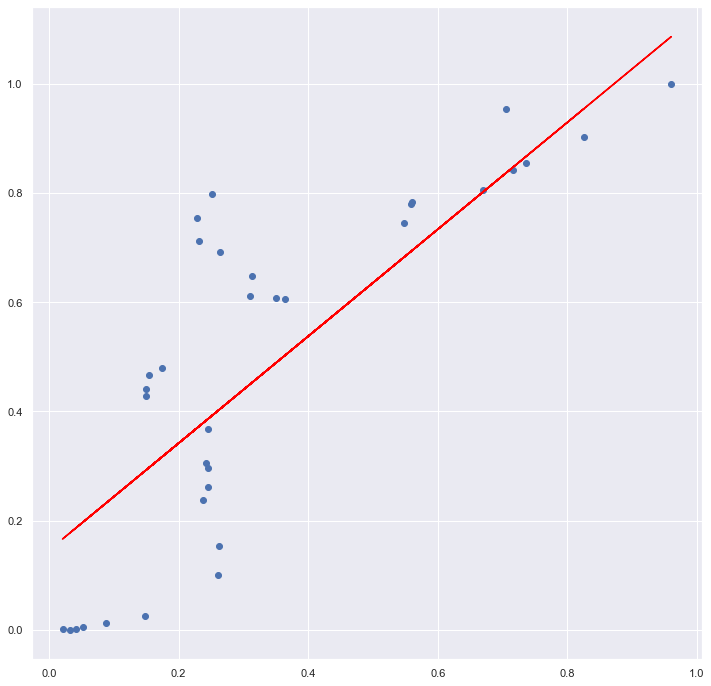

R Squared:  0.6527009242158206
Mean Absolute Error:  0.15716041274142978
Mean Squared Error:  0.035108977587895995
Root Mean Squared Error:  0.18737389782970304


In [522]:
# DOW and LA
X = DOW1.values.reshape(-1, 1)  # values converts it into a numpy array
Y = LA1.values.reshape(-1, 1)  # -1 means that calculate the dimension of rows, but have 1 column
X_train,X_test,Y_train,Y_test = train_test_split(X,Y,test_size=0.2)

# Generate the linear regression.
linear_regressor = LinearRegression()  # create object for the class
linear_regressor.fit(X_train, Y_train)  # perform linear regression
Y_pred = linear_regressor.predict(X_test)  # make predictions

# Plot the results.
plt.scatter(X_test, Y_test)
plt.plot(X_test, Y_pred, color='red')
plt.show()

# Display the evaluation metrics.
print("R Squared: ",r2_score(Y_test,Y_pred))
print("Mean Absolute Error: ",metrics.mean_absolute_error (Y_test, Y_pred))
print("Mean Squared Error: ",metrics.mean_squared_error(Y_test, Y_pred))
print("Root Mean Squared Error: ",np.sqrt(metrics.mean_squared_error(Y_test, Y_pred)))

### DOW vs Boulder

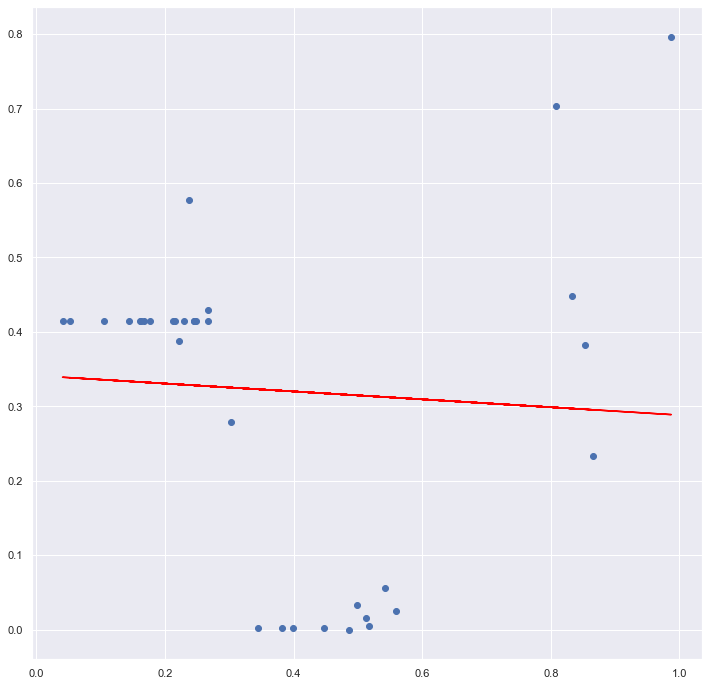

R Squared:  0.0018565611507842528
Mean Absolute Error:  0.17465520219507943
Mean Squared Error:  0.04572024287999771
Root Mean Squared Error:  0.21382292412180157


In [523]:
# DOW and Boulder
X = DOW1.values.reshape(-1, 1)  # values converts it into a numpy array
Y = Boulder1.values.reshape(-1, 1)  # -1 means that calculate the dimension of rows, but have 1 column
X_train,X_test,Y_train,Y_test = train_test_split(X,Y,test_size=0.2)

# Generate the linear regression.
linear_regressor = LinearRegression()  # create object for the class
linear_regressor.fit(X_train, Y_train)  # perform linear regression
Y_pred = linear_regressor.predict(X_test)  # make predictions

# Plot the results.
plt.scatter(X_test, Y_test)
plt.plot(X_test, Y_pred, color='red')
plt.show()

# Display the evaluation metrics.
print("R Squared: ",r2_score(Y_test,Y_pred))
print("Mean Absolute Error: ",metrics.mean_absolute_error (Y_test, Y_pred))
print("Mean Squared Error: ",metrics.mean_squared_error(Y_test, Y_pred))
print("Root Mean Squared Error: ",np.sqrt(metrics.mean_squared_error(Y_test, Y_pred)))

### DOW vs Dallas-Fort Worth

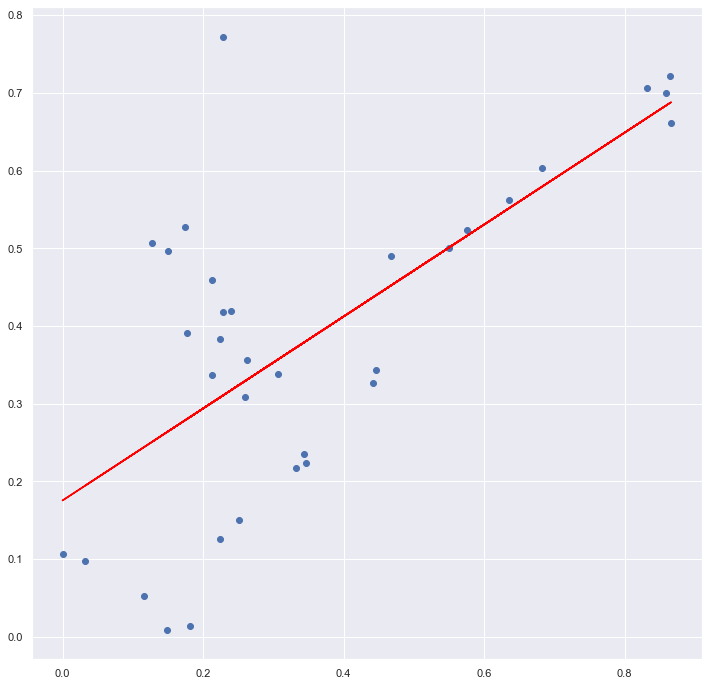

R Squared:  0.45469522849126365
Mean Absolute Error:  0.11605589328352975
Mean Squared Error:  0.023813435768557982
Root Mean Squared Error:  0.15431602563751434


In [524]:
#DOW and Dallas-Fort Worth
X = DOW1.values.reshape(-1, 1)  # values converts it into a numpy array
Y = DalFtWor1.values.reshape(-1, 1)  # -1 means that calculate the dimension of rows, but have 1 column
X_train,X_test,Y_train,Y_test = train_test_split(X,Y,test_size=0.2)

# Generate the linear regression.
linear_regressor = LinearRegression()  # create object for the class
linear_regressor.fit(X_train, Y_train)  # perform linear regression
Y_pred = linear_regressor.predict(X_test)  # make predictions

# Plot the results.
plt.scatter(X_test, Y_test)
plt.plot(X_test, Y_pred, color='red')
plt.show()

# Display the evaluation metrics.
print("R Squared: ",r2_score(Y_test,Y_pred))
print("Mean Absolute Error: ",metrics.mean_absolute_error (Y_test, Y_pred))
print("Mean Squared Error: ",metrics.mean_squared_error(Y_test, Y_pred))
print("Root Mean Squared Error: ",np.sqrt(metrics.mean_squared_error(Y_test, Y_pred)))

There does not seem to be sufficient reason to remove this time period, and we cannot technically prove it is an anomoly. But this was worth exploring given that we have knowledge of this time period being unlike any other time period we've seen in modern history. More data, from an earlier time period, would possibly help in this situation to identify if a period of over inflation is truly typical or not.

We may not be able to predict actual home value using stocks that well, but we clearly see a linear relationship between them in certain markets (only looked at 5 cities and 2 seemed to correlate the most).

If we can forecast the trend in stock prices, it can give us insight on how the home values will likely trend but not the magnitude of the change.


## Additional Exploratory Data Analyses
Different approach, Do VIX local maximums precede or follow shifts in the home values?
If so, this could be an indicator of if a home's value will likely change in the near future.

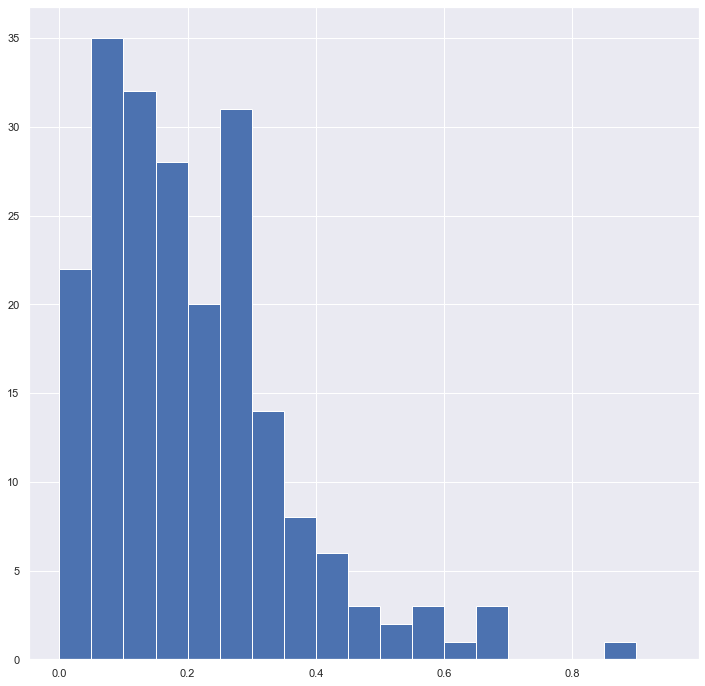

In [525]:
# Plot VIX dataset to examine the value ranges.
plt.hist(VIX, bins = np.arange(0,1,.05))
plt.show()

Above indicates that most of the VIX values are .5 or below. We will consider anything above 0.5 to be a "peak".

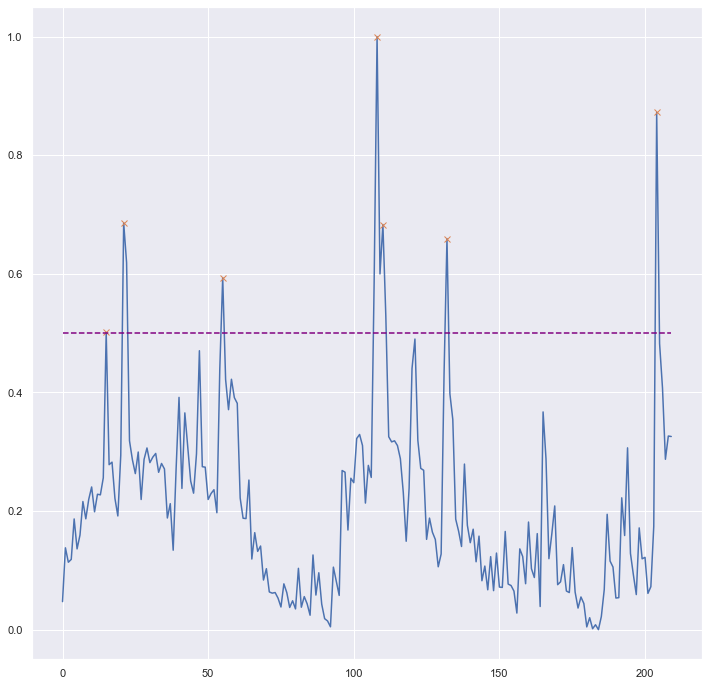

In [526]:
from scipy.signal import find_peaks
peaks, _ = find_peaks(VIX, height = 0.501) # Anything 0.501 or greater is considered a "peak"

plt.plot(VIX)
plt.plot(peaks, VIX.iloc[peaks], "x")
plt.plot(np.zeros_like(VIX) + 0.501, "--", color = "purple")
plt.show()

The above graph indicates that a rise in VIX cannot guarantee a drop in home values, there are 3 instances of a VIX peak corresponding to a drop in home value, but 4 peaks corresponding to a rise in values.

# Auto Regression for Model Forecasting

Autoregressive models are used for forecasting based on past behavior.
Code inspired by code from https://machinelearningmastery.com/autoregression-models-time-series-forecasting-python/


In [527]:
# Import dependencies
from statsmodels.tsa.ar_model import AutoReg
from math import sqrt, floor, ceil
from matplotlib import pyplot 

C:\Users\joesh\anaconda3\lib\site-packages\statsmodels\tsa\ar_model.py:248: FutureWarning: The parameter names will change after 0.12 is released. Set old_names to False to use the new names now. Set old_names to True to use the old names. 
  warnings.warn(


Coefficients: [-0.64019873  0.99649509 -0.02388337  0.01095299  0.02695765 -0.04269057
  0.03045665 -0.02354334  0.03699267 -0.00756306  0.01627527 -0.07549351
  0.10115842 -0.0246341  -0.02422609 -0.01085161  0.01123536  0.00274868
 -0.01355807  0.00306199 -0.00627318 -0.00153928 -0.00696627  0.03137767
  0.00808206 -0.06340826  0.02450101  0.0548628  -0.02777371 -0.00299555]
predicted=2805.199045, expected=28494.200000
predicted=2806.084666, expected=28514.000000
predicted=2804.277509, expected=28679.810000
predicted=2798.072160, expected=28837.520000
predicted=2800.232931, expected=28586.900000
predicted=2799.320863, expected=28425.510000
predicted=2793.693076, expected=28303.460000
predicted=2794.337052, expected=27772.760000
predicted=2788.453525, expected=28148.640000
predicted=2785.492695, expected=27682.810000
predicted=2786.796031, expected=27816.900000
predicted=2782.013712, expected=27781.700000
predicted=2777.448229, expected=27452.660000
predicted=2777.413165, expected=275

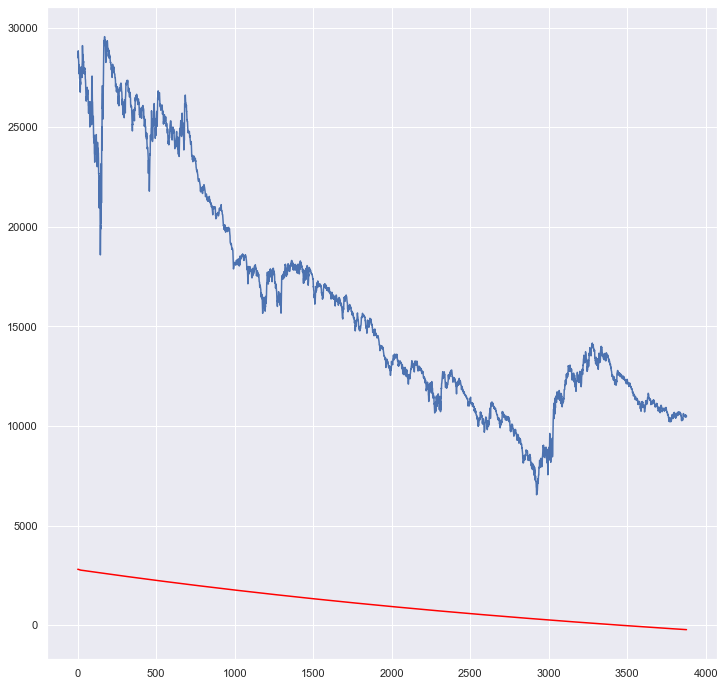

In [528]:
# load dataset
#Note: Using unmerged data as there are a lot more data points in the stock dataset than the stocks merged with Zillow dataset
stockData = stocks['DOW Close']
timeSeriesStocks = pd.Series(stockData.values)

# split dataset
X = timeSeriesStocks.values
TrainingPercentage = 0.50
train, test = X[ceil(TrainingPercentage*len(X)):], X[0:floor(TrainingPercentage*len(X))]

# train autoregression
model = AutoReg(train, lags=29)
model_fit = model.fit()
print('Coefficients: %s' % model_fit.params)

# make predictions
predictions = model_fit.predict(start=len(train), end=len(train)+len(test)-1, dynamic=False)
for i in range(len(predictions)):
	print('predicted=%f, expected=%f' % (predictions[i], test[i]))
rmse = sqrt(mean_squared_error(test, predictions))
print ('Test R^2: %.3f' % r2_score(test, predictions))
print('Test RMSE: %.3f' % rmse)
print('Test MSE: %.3f' % mean_squared_error(test, predictions))

# plot results
pyplot.plot(test)
pyplot.plot(predictions, color='red')
pyplot.show()

The autoregression does not seem to perform too well based on the prediction line as well as the MSE and RMSE. 

# Prophet for Model Forecasting
Let's see if we can leverage some existing tools to do some stock forecasting

To install prophet, open anaconda prompt and run conda install -c conda-forge fbprophet -y

Official Prophet documentation available at https://facebook.github.io/prophet/docs/quick_start.html#python-api.


In [529]:
# Importing and using Prophet module for forecasting.
import fbprophet
from fbprophet import Prophet

#Load dataset with date as date is required for prophet model
#Note: Using unmerged data as there are a lot more data points in the stock dataset than the stocks merged with Zillow dataset
stocks1 = pd.read_csv(filepath + "NYSEIndexHistoricalPricesWithRow.csv",
                     index_col='Row')

In [530]:
prophetDataFrame = stocks1[['Date','DOW Close']]
prophetDataFrame.columns = ['ds','y']
#prophetDataFrame.head()
model = Prophet()
model.fit(prophetDataFrame)

INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


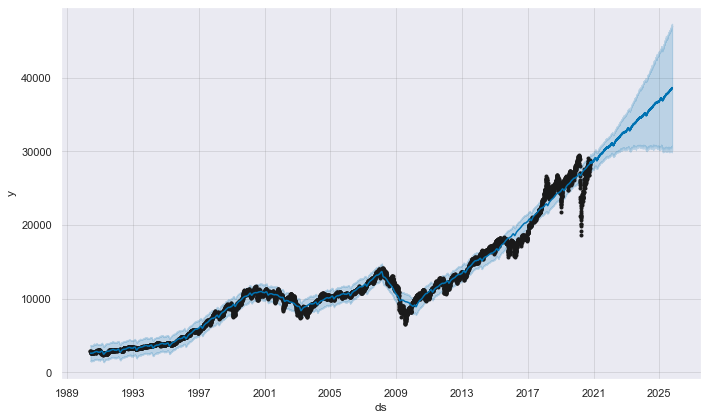

In [531]:
futureDataFrame = model.make_future_dataframe(periods=1825)
#print(futureDataFrame.tail())
forecastDataFrame = model.predict(futureDataFrame)
#print(forecastDataFrame[['ds','yhat','yhat_lower','yhat_upper']].tail())
figure1 = model.plot(forecastDataFrame)

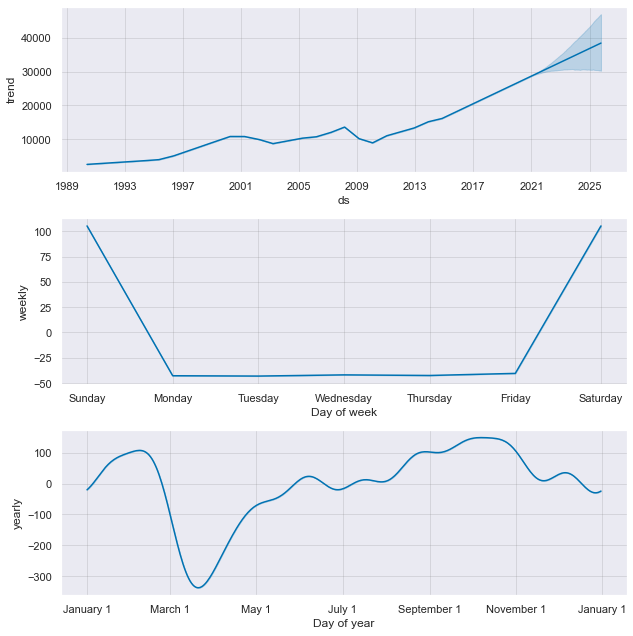

In [532]:
figure2 = model.plot_components(forecastDataFrame)

R^2: -2.750
RMSE: 12576.599
MSE: 158170841.307


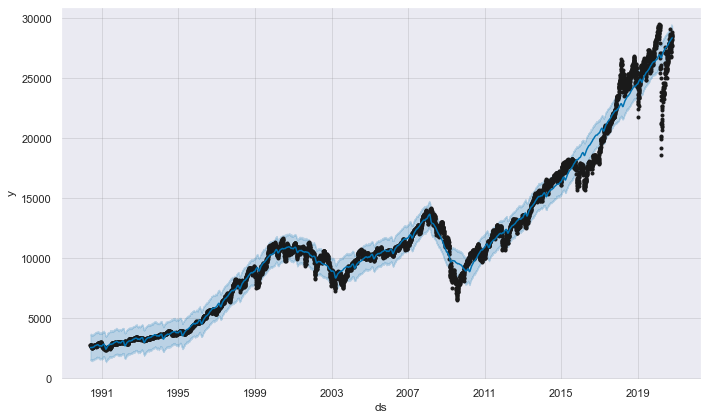

In [533]:
futureDataFrame2 = model.make_future_dataframe(periods=0)
forecastDataFrame2 = model.predict(futureDataFrame2)
figure1_2 = model.plot(forecastDataFrame2)
print('R^2: %.3f' % r2_score(prophetDataFrame.y, forecastDataFrame2.yhat))
print('RMSE: %.3f' % sqrt(mean_squared_error(prophetDataFrame.y, forecastDataFrame2.yhat)) )
print('MSE: %.3f' % mean_squared_error(prophetDataFrame.y, forecastDataFrame2.yhat))

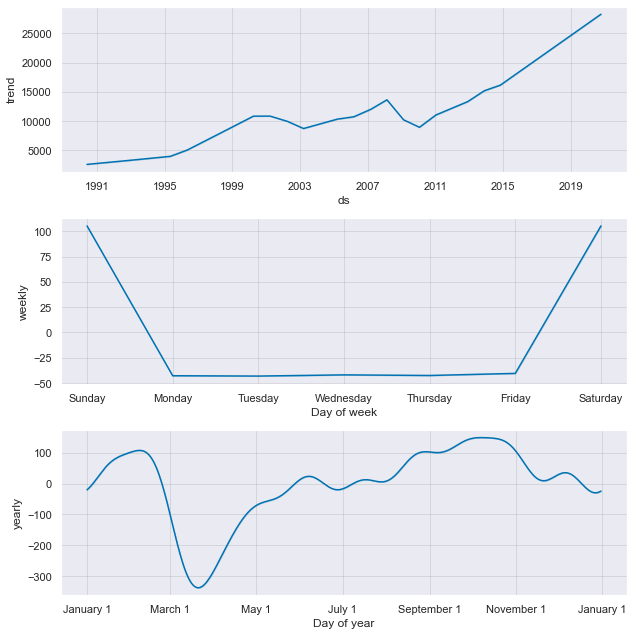

In [534]:
figure2_2 = model.plot_components(forecastDataFrame2)

Let's see how good this model is at predicting during the housing crisis.

In [535]:
prophetDataFrame2 = stocks1[['Date','DOW Close']]
prophetDataFrame2.head()

Date  DOW Close
Row                     
0    10/15/20   28494.20
1    10/14/20   28514.00
2    10/13/20   28679.81
3    10/12/20   28837.52
4     10/9/20   28586.90

In [536]:
# Dropping data after 6/6/06
dropDateIndex2006 = prophetDataFrame2.index[prophetDataFrame2['Date'] == '6/6/06']
prophetDataFrame2006 = prophetDataFrame2.drop(prophetDataFrame2.index[[np.arange(0,dropDateIndex2006[0])]])
prophetDataFrame2006.columns = ['ds','y']
prophetDataFrame2006.head()

C:\Users\joesh\anaconda3\lib\site-packages\pandas\core\indexes\base.py:4111: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  result = getitem(key)


ds         y
Row                    
3718   6/6/06  11011.90
3719   6/5/06  10959.31
3720   6/2/06  10882.15
3721   6/1/06  10880.15
3722  5/31/06  10847.41

In [537]:
# Now let's train this new model with only data leading up to 6/6/06
model2006 = Prophet()
model2006.fit(prophetDataFrame2006)

INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


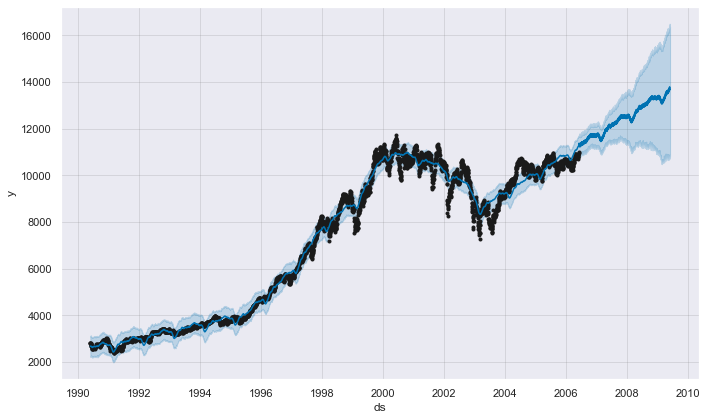

In [538]:
futureDataFrame2006 = model2006.make_future_dataframe(periods=1095)
forecastDataFrame2006 = model2006.predict(futureDataFrame2006)
figure2006 = model2006.plot(forecastDataFrame2006)

In [539]:
# Dropping data after 8/8/08
dropDateIndex2008 = prophetDataFrame2.index[prophetDataFrame2['Date'] == '8/8/08']
prophetDataFrame2008 = prophetDataFrame2.drop(prophetDataFrame2.index[[np.arange(0,dropDateIndex2008[0])]])
prophetDataFrame2008.columns = ['ds','y']
prophetDataFrame2008.head()

C:\Users\joesh\anaconda3\lib\site-packages\pandas\core\indexes\base.py:4111: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  result = getitem(key)


ds         y
Row                   
3170  8/8/08  11951.09
3171  8/7/08  12145.74
3172  8/6/08  12110.24
3173  8/5/08  12156.81
3174  8/4/08  11740.15

In [540]:
# Now let's train this new model with only data leading up to 8/8/08
model2008 = Prophet()
model2008.fit(prophetDataFrame2008)

INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


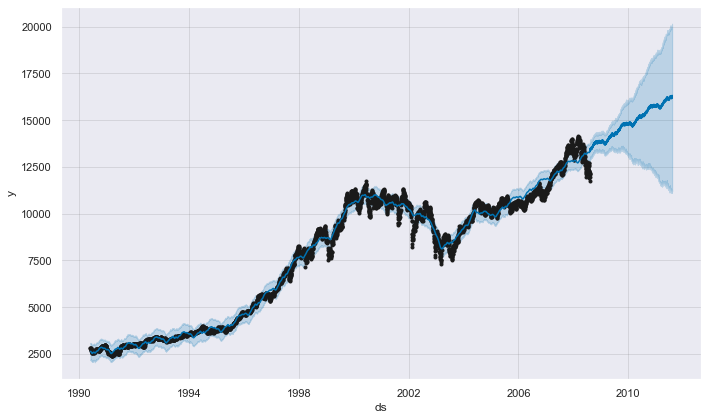

In [541]:
futureDataFrame2008 = model2008.make_future_dataframe(periods=1095)
forecastDataFrame2008 = model2008.predict(futureDataFrame2008)
figure2008 = model2008.plot(forecastDataFrame2008)

In [542]:
#Let's run the model on housing data in NYC to see if it looks similar to our stock prediction
#Note: There is much less of this data than the stock data
prophetDataFrameNYC = home_vals[['Date','New York, NY']]
prophetDataFrameNYC.columns = ['ds','y']
#prophetDataFrame.head()
modelNYC = Prophet()
modelNYC.fit(prophetDataFrameNYC)

INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


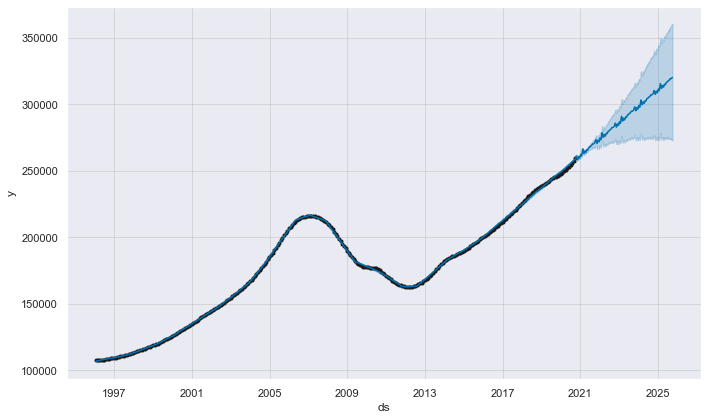

In [543]:
futureDataFrameNYC = modelNYC.make_future_dataframe(periods=1825)
forecastDataFrameNYC = modelNYC.predict(futureDataFrameNYC)
figureNYC = modelNYC.plot(forecastDataFrameNYC)

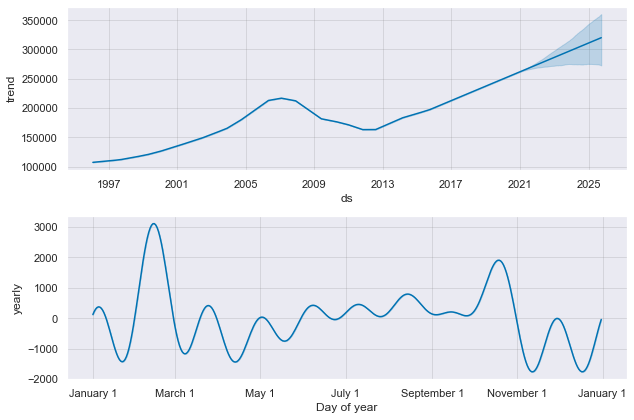

In [544]:
figureNYC2 = modelNYC.plot_components(forecastDataFrameNYC)

In [545]:
#Let's run the model on housing data in Chicago to see if it looks similar to our stock prediction
#Note: There is much less of this data than the stock data
prophetDataFrameCHI = home_vals[['Date','Chicago, IL']]
prophetDataFrameCHI.columns = ['ds','y']
#prophetDataFrame.head()
modelCHI = Prophet()
modelCHI.fit(prophetDataFrameCHI)

INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


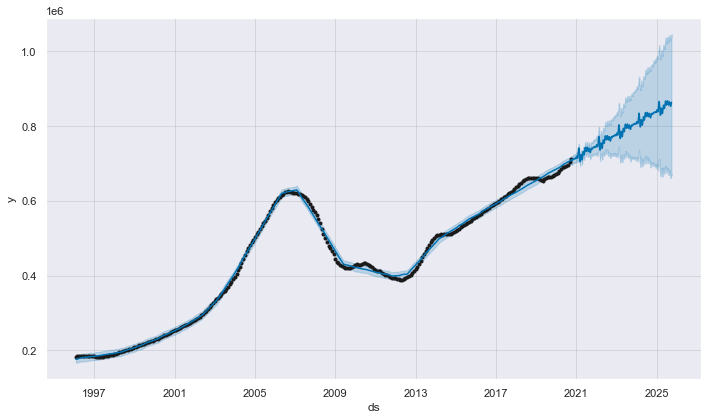

In [546]:
futureDataFrameCHI = modelCHI.make_future_dataframe(periods=1825)
forecastDataFrameCHI = modelCHI.predict(futureDataFrameCHI)
figureCHI = modelCHI.plot(forecastDataFrameCHI)

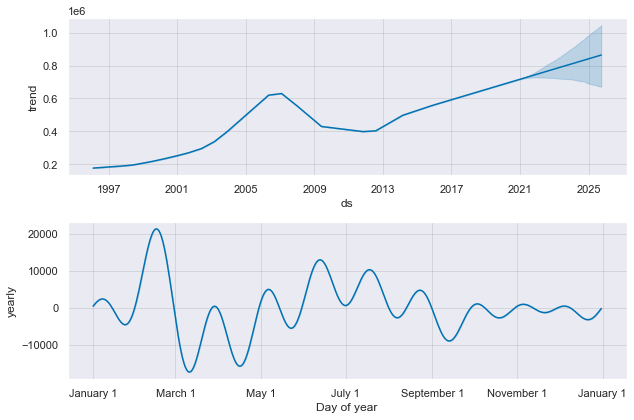

In [547]:
figureCHI2 = modelCHI.plot_components(forecastDataFrameCHI)

The NYC prophet model prediction seems to resemble the stock prediction closer than Chicago but NYC is slightly more correlated than Chicago. However, a better model for stock prediction and/or a model that also includes other macroeconomic features aside from just the DOW may be better at predicting the trend in home prices in the future. 